In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [4]:
o2 = pd.read_csv('o2Saturation.csv')

In [5]:
len(df)

303

In [7]:
len(o2)

3585

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
o2.head(2)

,98.6
0,98.6
1,98.6


In [10]:
o2.describe()

,98.6
count,3585.000000
mean,98.239275
std,0.726336
min,96.500000
25%,97.600000
50%,98.600000
75%,98.600000
max,99.600000


In [13]:
df['output'].unique()

array([1, 0], dtype=int64)

In [15]:
len(df[df['sex']==1])

207

In [16]:
len(df[df['sex']==0])

96

# I guess depending on the data 0 means Female and 1 means male. Because this dataset is from Bangladesh where number of males (in general) is much much greater than that of women. So, going by this trend I guess, this will hold true for heart patients as well.

In [20]:
df.corr()['output'].sort_values()[:-1]

exng       -0.436757
oldpeak    -0.430696
caa        -0.391724
thall      -0.344029
sex        -0.280937
age        -0.225439
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slp         0.345877
thalachh    0.421741
cp          0.433798
Name: output, dtype: float64

In [21]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [22]:
96/303

0.31683168316831684

# the dataset's target variable distribution is around 70%-30% (70% of all values being 1)

# EDA

<AxesSubplot:xlabel='output', ylabel='Count'>

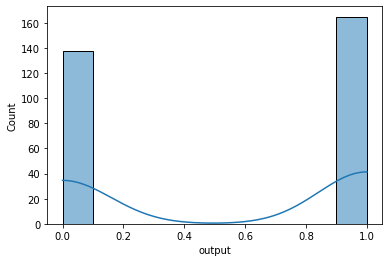

In [23]:
sns.histplot(data=df,x='output',kde=True)

<AxesSubplot:xlabel='cp', ylabel='count'>

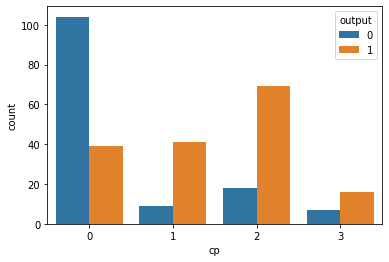

In [26]:
sns.countplot(data=df , x = 'cp', hue ='output')

# TEST TRAIN SPLIT

In [27]:
from sklearn.model_selection import train_test_split

In [29]:
X = df.drop('output',axis=1)
y = df['output']

In [33]:
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


# creating dummies

In [36]:
df['thall'].nunique()

4

In [40]:
X_dummies = pd.get_dummies(data=X , columns=['sex','cp','fbs','restecg','exng','slp','caa','thall'] , drop_first=True)

In [41]:
len(X_dummies.columns)

22

In [42]:
X_dummies.head(2)

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()

In [46]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# LET'S APPLY CLASSIFICATION MODELS AND ASSESS THEIR ACCURCACY/ F1 METRIC

# 1) LOGISTIC REGRESSION

In [48]:
from sklearn.linear_model import LogisticRegression

In [85]:
lr = LogisticRegression(fit_intercept=True,random_state=42)

In [86]:
lr.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [87]:
lr_pred = lr.predict(X_test)

In [88]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

In [89]:
print(classification_report(y_test,lr_pred))
print('\n')
print(confusion_matrix(y_test,lr_pred))
print('\n')
print(f1_score(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



[[33  8]
 [ 6 44]]


0.8627450980392156


In [91]:
from sklearn.model_selection import cross_val_score

In [433]:
lr_accuracies = cross_val_score(lr , X_test , y_test , cv = 41)
print(lr_accuracies.mean())

0.8252032520325202


# 2) KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier

In [144]:
knn = KNeighborsClassifier(n_neighbors=30)

In [145]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [146]:
knn_pred = knn.predict(X_test)

In [147]:
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[34  7]
 [ 5 45]]


              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.87      0.90      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91



In [441]:
Accuracy = []
for i in range(1,41):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    knn_accuracies = cross_val_score(knn , X_test , y_test , cv = 41)
    knn_accuracy_i = knn_accuracies.mean()
    Accuracy.append(knn_accuracy_i)

In [456]:
knn_df = pd.DataFrame({'Neighbours': np.arange(1,41) , 'Accuracy': Accuracy})

<AxesSubplot:xlabel='Neighbours', ylabel='Accuracy'>

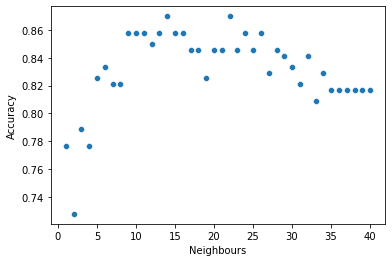

In [457]:
sns.scatterplot(data=knn_df , x = 'Neighbours',y='Accuracy')

In [458]:
knn_df[knn_df['Accuracy']==knn_df['Accuracy'].max()]

,Neighbours,Accuracy
13,14,0.869919
21,22,0.869919


# implementing the best knn model with k=7

In [446]:
knn = KNeighborsClassifier(14)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[34  7]
 [ 8 42]]


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



# CV Accuracy

In [447]:
knn_accuracies = cross_val_score(knn , X_test , y_test , cv = 41)
print(knn_accuracies.mean())

0.8699186991869918


# KNN WITH K==14 IS BETTER THAN LOGISTIC REGRESSION WITH A CV ACCURACY OF 86.99%

 # 3) SVC

In [155]:
from sklearn.svm import SVC

In [156]:
svc = SVC()

In [157]:
svc.fit(X_train,y_train)

SVC()

In [158]:
svc_pred = svc.predict(X_test)

In [159]:
print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[34  7]
 [11 39]]


              precision    recall  f1-score   support

           0       0.76      0.83      0.79        41
           1       0.85      0.78      0.81        50

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



# USING GRID SEARCH CV

In [160]:
from sklearn.model_selection import GridSearchCV

In [180]:
params = {'C': [10000,100000,1000000] , 'gamma': [0.000001 , (10**-7) , (10**-8)]}

In [181]:
grid = GridSearchCV(SVC() , param_grid = params , verbose= 3 , cv=10)

In [182]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV] C=10000, gamma=1e-06 ............................................
[CV] ................ C=10000, gamma=1e-06, score=0.864, total=   0.0s
[CV] C=10000, gamma=1e-06 ............................................
[CV] ................ C=10000, gamma=1e-06, score=0.864, total=   0.0s
[CV] C=10000, gamma=1e-06 ............................................
[CV] ................ C=10000, gamma=1e-06, score=0.810, total=   0.0s
[CV] C=10000, gamma=1e-06 ............................................
[CV] ................ C=10000, gamma=1e-06, score=0.857, total=   0.0s
[CV] C=10000, gamma=1e-06 ............................................
[CV] ................ C=10000, gamma=1e-06, score=0.714, total=   0.0s
[CV] C=10000, gamma=1e-06 ............................................
[CV] ................ C=10000, gamma=1e-06, score=0.762, total=   0.0s
[CV] C=10000, gamma=1e-06 ............................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............... C=100000, gamma=1e-08, score=0.810, total=   0.0s
[CV] C=100000, gamma=1e-08 ...........................................
[CV] ............... C=100000, gamma=1e-08, score=0.571, total=   0.0s
[CV] C=100000, gamma=1e-08 ...........................................
[CV] ............... C=100000, gamma=1e-08, score=0.810, total=   0.0s
[CV] C=100000, gamma=1e-08 ...........................................
[CV] ............... C=100000, gamma=1e-08, score=0.857, total=   0.0s
[CV] C=100000, gamma=1e-08 ...........................................
[CV] ............... C=100000, gamma=1e-08, score=0.905, total=   0.0s
[CV] C=100000, gamma=1e-08 ...........................................
[CV] ............... C=100000, gamma=1e-08, score=0.762, total=   0.0s
[CV] C=100000, gamma=1e-08 ...........................................
[CV] ............... C=100000, gamma=1e-08, score=0.762, total=   0.0s
[CV] C=1000000, gamma=1e-06 ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.2s finished


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [10000, 100000, 1000000],
                         'gamma': [1e-06, 1e-07, 1e-08]},
             verbose=3)

In [183]:
grid.best_params_

{'C': 1000000, 'gamma': 1e-07}

In [184]:
grid.best_score_

0.8391774891774892

In [213]:
svc = SVC(C = 1e06 , gamma= 1e-07)

In [214]:
svc.fit(X_train,y_train)

SVC(C=1000000.0, gamma=1e-07)

In [215]:
svc_pred = svc.predict(X_test)

In [216]:
print(confusion_matrix(y_test,svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[33  8]
 [ 5 45]]


              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.85      0.90      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



In [431]:
svc_accuracies = cross_val_score(svc , X_test , y_test , cv = 41)
print(svc_accuracies.mean())

0.8130081300813007


# CV ON SVC PERFORMED WORST AMONG LOGISTIC REGRESSION AND KNN

# 4) RANDOM FOREST

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [320]:
rf = RandomForestClassifier(n_estimators=500,random_state=0 , max_depth=5)

In [321]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=0)

In [322]:
rf_pred = rf.predict(X_test)

In [323]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

[[34  7]
 [ 7 43]]


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        41
           1       0.86      0.86      0.86        50

    accuracy                           0.85        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



In [430]:
rf_accuracies = cross_val_score(rf , X_test , y_test , cv = 41)
print(rf_accuracies.mean())

0.7926829268292683


# RANDOM FOREST ALMOST LIKE LOGISTIC REGRESSION (LOGISTIC REGRESSION 4 MORE CORRECT VALUES THAN RF)..TILL NOW KNN SEEMS TO BE THE BEST FIT

# 4) CATBOOST

In [325]:
from catboost import CatBoostClassifier

In [393]:
cb = CatBoostClassifier(iterations=1000 , random_state=0 , loss_function='Logloss' , depth=5)

In [394]:
cb.fit(X_train,y_train , eval_set=(X_test,y_test) , plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.021603
0:	learn: 0.6807264	test: 0.6833569	best: 0.6833569 (0)	total: 1.7ms	remaining: 1.7s
1:	learn: 0.6658049	test: 0.6696619	best: 0.6696619 (1)	total: 3.52ms	remaining: 1.75s
2:	learn: 0.6541939	test: 0.6615661	best: 0.6615661 (2)	total: 5.21ms	remaining: 1.73s
3:	learn: 0.6435296	test: 0.6533285	best: 0.6533285 (3)	total: 6.95ms	remaining: 1.73s
4:	learn: 0.6318912	test: 0.6425175	best: 0.6425175 (4)	total: 8.4ms	remaining: 1.67s
5:	learn: 0.6206761	test: 0.6336206	best: 0.6336206 (5)	total: 9.88ms	remaining: 1.64s
6:	learn: 0.6095679	test: 0.6247180	best: 0.6247180 (6)	total: 11.7ms	remaining: 1.66s
7:	learn: 0.5993304	test: 0.6165169	best: 0.6165169 (7)	total: 13.3ms	remaining: 1.64s
8:	learn: 0.5889798	test: 0.6081384	best: 0.6081384 (8)	total: 14.8ms	remaining: 1.63s
9:	learn: 0.5822339	test: 0.6031703	best: 0.6031703 (9)	total: 16.3ms	remaining: 1.61s
10:	learn: 0.5732617	test: 0.5957473	best: 0.5957473 (10)	total: 17.8ms	remaining: 1.6s
11:	learn: 0.56

212:	learn: 0.1646907	test: 0.3933307	best: 0.3919018 (205)	total: 288ms	remaining: 1.06s
213:	learn: 0.1638631	test: 0.3932965	best: 0.3919018 (205)	total: 290ms	remaining: 1.06s
214:	learn: 0.1635807	test: 0.3936209	best: 0.3919018 (205)	total: 291ms	remaining: 1.06s
215:	learn: 0.1626168	test: 0.3931487	best: 0.3919018 (205)	total: 292ms	remaining: 1.06s
216:	learn: 0.1620986	test: 0.3931400	best: 0.3919018 (205)	total: 294ms	remaining: 1.06s
217:	learn: 0.1611402	test: 0.3931212	best: 0.3919018 (205)	total: 295ms	remaining: 1.06s
218:	learn: 0.1603870	test: 0.3920664	best: 0.3919018 (205)	total: 296ms	remaining: 1.06s
219:	learn: 0.1597950	test: 0.3925612	best: 0.3919018 (205)	total: 297ms	remaining: 1.05s
220:	learn: 0.1591172	test: 0.3929900	best: 0.3919018 (205)	total: 299ms	remaining: 1.05s
221:	learn: 0.1584297	test: 0.3926745	best: 0.3919018 (205)	total: 300ms	remaining: 1.05s
222:	learn: 0.1575012	test: 0.3929689	best: 0.3919018 (205)	total: 301ms	remaining: 1.05s
223:	learn

339:	learn: 0.1012194	test: 0.4065701	best: 0.3909299 (233)	total: 440ms	remaining: 854ms
340:	learn: 0.1008527	test: 0.4066160	best: 0.3909299 (233)	total: 441ms	remaining: 853ms
341:	learn: 0.1006036	test: 0.4065712	best: 0.3909299 (233)	total: 443ms	remaining: 852ms
342:	learn: 0.0998651	test: 0.4058743	best: 0.3909299 (233)	total: 444ms	remaining: 850ms
343:	learn: 0.0993646	test: 0.4056613	best: 0.3909299 (233)	total: 445ms	remaining: 849ms
344:	learn: 0.0989193	test: 0.4057477	best: 0.3909299 (233)	total: 447ms	remaining: 848ms
345:	learn: 0.0987837	test: 0.4058137	best: 0.3909299 (233)	total: 448ms	remaining: 847ms
346:	learn: 0.0987492	test: 0.4058641	best: 0.3909299 (233)	total: 449ms	remaining: 846ms
347:	learn: 0.0983299	test: 0.4064470	best: 0.3909299 (233)	total: 451ms	remaining: 845ms
348:	learn: 0.0980205	test: 0.4064184	best: 0.3909299 (233)	total: 452ms	remaining: 843ms
349:	learn: 0.0976477	test: 0.4065378	best: 0.3909299 (233)	total: 454ms	remaining: 842ms
350:	learn

460:	learn: 0.0651073	test: 0.4223047	best: 0.3909299 (233)	total: 589ms	remaining: 689ms
461:	learn: 0.0649072	test: 0.4219883	best: 0.3909299 (233)	total: 591ms	remaining: 688ms
462:	learn: 0.0647456	test: 0.4222066	best: 0.3909299 (233)	total: 592ms	remaining: 687ms
463:	learn: 0.0643934	test: 0.4229792	best: 0.3909299 (233)	total: 593ms	remaining: 685ms
464:	learn: 0.0641193	test: 0.4230186	best: 0.3909299 (233)	total: 595ms	remaining: 684ms
465:	learn: 0.0638589	test: 0.4229343	best: 0.3909299 (233)	total: 596ms	remaining: 683ms
466:	learn: 0.0635186	test: 0.4232273	best: 0.3909299 (233)	total: 597ms	remaining: 682ms
467:	learn: 0.0633629	test: 0.4234493	best: 0.3909299 (233)	total: 599ms	remaining: 681ms
468:	learn: 0.0630961	test: 0.4237229	best: 0.3909299 (233)	total: 600ms	remaining: 679ms
469:	learn: 0.0628464	test: 0.4239736	best: 0.3909299 (233)	total: 601ms	remaining: 678ms
470:	learn: 0.0625334	test: 0.4243201	best: 0.3909299 (233)	total: 603ms	remaining: 677ms
471:	learn

586:	learn: 0.0432868	test: 0.4478223	best: 0.3909299 (233)	total: 743ms	remaining: 523ms
587:	learn: 0.0431296	test: 0.4481006	best: 0.3909299 (233)	total: 744ms	remaining: 522ms
588:	learn: 0.0430319	test: 0.4479778	best: 0.3909299 (233)	total: 746ms	remaining: 520ms
589:	learn: 0.0429497	test: 0.4482523	best: 0.3909299 (233)	total: 747ms	remaining: 519ms
590:	learn: 0.0428766	test: 0.4484936	best: 0.3909299 (233)	total: 748ms	remaining: 518ms
591:	learn: 0.0427550	test: 0.4488077	best: 0.3909299 (233)	total: 749ms	remaining: 516ms
592:	learn: 0.0426183	test: 0.4490210	best: 0.3909299 (233)	total: 751ms	remaining: 515ms
593:	learn: 0.0424918	test: 0.4493770	best: 0.3909299 (233)	total: 753ms	remaining: 514ms
594:	learn: 0.0423499	test: 0.4503163	best: 0.3909299 (233)	total: 754ms	remaining: 513ms
595:	learn: 0.0422104	test: 0.4505649	best: 0.3909299 (233)	total: 755ms	remaining: 512ms
596:	learn: 0.0420646	test: 0.4509113	best: 0.3909299 (233)	total: 757ms	remaining: 511ms
597:	learn

720:	learn: 0.0316174	test: 0.4699690	best: 0.3909299 (233)	total: 1.02s	remaining: 395ms
721:	learn: 0.0315429	test: 0.4702466	best: 0.3909299 (233)	total: 1.02s	remaining: 394ms
722:	learn: 0.0314448	test: 0.4705351	best: 0.3909299 (233)	total: 1.02s	remaining: 393ms
723:	learn: 0.0313766	test: 0.4710149	best: 0.3909299 (233)	total: 1.03s	remaining: 391ms
724:	learn: 0.0312671	test: 0.4711875	best: 0.3909299 (233)	total: 1.03s	remaining: 390ms
725:	learn: 0.0312526	test: 0.4712264	best: 0.3909299 (233)	total: 1.03s	remaining: 389ms
726:	learn: 0.0311586	test: 0.4719859	best: 0.3909299 (233)	total: 1.03s	remaining: 388ms
727:	learn: 0.0311032	test: 0.4724019	best: 0.3909299 (233)	total: 1.03s	remaining: 387ms
728:	learn: 0.0310205	test: 0.4725425	best: 0.3909299 (233)	total: 1.04s	remaining: 385ms
729:	learn: 0.0309143	test: 0.4722562	best: 0.3909299 (233)	total: 1.04s	remaining: 384ms
730:	learn: 0.0308234	test: 0.4725280	best: 0.3909299 (233)	total: 1.04s	remaining: 383ms
731:	learn

903:	learn: 0.0217190	test: 0.4974686	best: 0.3909299 (233)	total: 1.3s	remaining: 138ms
904:	learn: 0.0216839	test: 0.4973655	best: 0.3909299 (233)	total: 1.3s	remaining: 136ms
905:	learn: 0.0216496	test: 0.4974372	best: 0.3909299 (233)	total: 1.3s	remaining: 135ms
906:	learn: 0.0216080	test: 0.4977472	best: 0.3909299 (233)	total: 1.3s	remaining: 134ms
907:	learn: 0.0215499	test: 0.4978730	best: 0.3909299 (233)	total: 1.3s	remaining: 132ms
908:	learn: 0.0214720	test: 0.4981069	best: 0.3909299 (233)	total: 1.3s	remaining: 131ms
909:	learn: 0.0214334	test: 0.4983245	best: 0.3909299 (233)	total: 1.31s	remaining: 129ms
910:	learn: 0.0214334	test: 0.4983256	best: 0.3909299 (233)	total: 1.31s	remaining: 128ms
911:	learn: 0.0213766	test: 0.4984677	best: 0.3909299 (233)	total: 1.31s	remaining: 126ms
912:	learn: 0.0213160	test: 0.4986465	best: 0.3909299 (233)	total: 1.31s	remaining: 125ms
913:	learn: 0.0212809	test: 0.4989968	best: 0.3909299 (233)	total: 1.31s	remaining: 123ms
914:	learn: 0.02

999:	learn: 0.0183842	test: 0.5120876	best: 0.3909299 (233)	total: 1.45s	remaining: 0us

bestTest = 0.3909298559
bestIteration = 233

Shrink model to first 234 iterations.


In [395]:
cb_pred = cb.predict(X_test)

In [396]:
print(confusion_matrix(y_test,cb_pred))
print('\n')
print(classification_report(y_test,cb_pred))

[[34  7]
 [ 8 42]]


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [426]:
cb_accuracies = cross_val_score(cb , X_test , y_test , cv = 40)
print(cb_accuracies.mean())

Learning rate set to 0.003649
0:	learn: 0.6904551	total: 1.89ms	remaining: 1.89s
1:	learn: 0.6885129	total: 3.98ms	remaining: 1.99s
2:	learn: 0.6864717	total: 5.81ms	remaining: 1.93s
3:	learn: 0.6847678	total: 7.46ms	remaining: 1.86s
4:	learn: 0.6824683	total: 9.35ms	remaining: 1.86s
5:	learn: 0.6796844	total: 11.2ms	remaining: 1.85s
6:	learn: 0.6772996	total: 13.3ms	remaining: 1.89s
7:	learn: 0.6751770	total: 15.1ms	remaining: 1.87s
8:	learn: 0.6725107	total: 16.8ms	remaining: 1.85s
9:	learn: 0.6702375	total: 18.6ms	remaining: 1.85s
10:	learn: 0.6676995	total: 20.5ms	remaining: 1.84s
11:	learn: 0.6656637	total: 22.3ms	remaining: 1.83s
12:	learn: 0.6624453	total: 24.2ms	remaining: 1.84s
13:	learn: 0.6605680	total: 26.1ms	remaining: 1.84s
14:	learn: 0.6582983	total: 28ms	remaining: 1.84s
15:	learn: 0.6562427	total: 29.9ms	remaining: 1.84s
16:	learn: 0.6531537	total: 31.5ms	remaining: 1.82s
17:	learn: 0.6508321	total: 33.5ms	remaining: 1.82s
18:	learn: 0.6486234	total: 35.7ms	remaining: 

171:	learn: 0.4158910	total: 294ms	remaining: 1.41s
172:	learn: 0.4152796	total: 295ms	remaining: 1.41s
173:	learn: 0.4139781	total: 297ms	remaining: 1.41s
174:	learn: 0.4130536	total: 299ms	remaining: 1.41s
175:	learn: 0.4123072	total: 300ms	remaining: 1.41s
176:	learn: 0.4113608	total: 302ms	remaining: 1.4s
177:	learn: 0.4105251	total: 304ms	remaining: 1.4s
178:	learn: 0.4096230	total: 305ms	remaining: 1.4s
179:	learn: 0.4086925	total: 307ms	remaining: 1.4s
180:	learn: 0.4078699	total: 308ms	remaining: 1.4s
181:	learn: 0.4071051	total: 310ms	remaining: 1.39s
182:	learn: 0.4062813	total: 312ms	remaining: 1.39s
183:	learn: 0.4054142	total: 313ms	remaining: 1.39s
184:	learn: 0.4046031	total: 315ms	remaining: 1.39s
185:	learn: 0.4037234	total: 317ms	remaining: 1.39s
186:	learn: 0.4028578	total: 319ms	remaining: 1.39s
187:	learn: 0.4018777	total: 321ms	remaining: 1.39s
188:	learn: 0.4009199	total: 323ms	remaining: 1.38s
189:	learn: 0.4001740	total: 324ms	remaining: 1.38s
190:	learn: 0.399

362:	learn: 0.2814410	total: 597ms	remaining: 1.05s
363:	learn: 0.2809104	total: 599ms	remaining: 1.04s
364:	learn: 0.2804746	total: 600ms	remaining: 1.04s
365:	learn: 0.2800539	total: 602ms	remaining: 1.04s
366:	learn: 0.2795030	total: 604ms	remaining: 1.04s
367:	learn: 0.2788629	total: 606ms	remaining: 1.04s
368:	learn: 0.2784763	total: 607ms	remaining: 1.04s
369:	learn: 0.2779955	total: 609ms	remaining: 1.04s
370:	learn: 0.2775029	total: 611ms	remaining: 1.03s
371:	learn: 0.2772545	total: 612ms	remaining: 1.03s
372:	learn: 0.2768090	total: 614ms	remaining: 1.03s
373:	learn: 0.2762411	total: 615ms	remaining: 1.03s
374:	learn: 0.2756693	total: 617ms	remaining: 1.03s
375:	learn: 0.2754212	total: 618ms	remaining: 1.03s
376:	learn: 0.2747651	total: 620ms	remaining: 1.02s
377:	learn: 0.2741981	total: 622ms	remaining: 1.02s
378:	learn: 0.2737227	total: 623ms	remaining: 1.02s
379:	learn: 0.2731832	total: 625ms	remaining: 1.02s
380:	learn: 0.2726551	total: 627ms	remaining: 1.02s
381:	learn: 

545:	learn: 0.2110087	total: 897ms	remaining: 746ms
546:	learn: 0.2107244	total: 899ms	remaining: 745ms
547:	learn: 0.2102754	total: 901ms	remaining: 743ms
548:	learn: 0.2099259	total: 902ms	remaining: 741ms
549:	learn: 0.2094516	total: 904ms	remaining: 740ms
550:	learn: 0.2092607	total: 906ms	remaining: 738ms
551:	learn: 0.2090188	total: 907ms	remaining: 736ms
552:	learn: 0.2084529	total: 909ms	remaining: 735ms
553:	learn: 0.2081025	total: 911ms	remaining: 733ms
554:	learn: 0.2078247	total: 912ms	remaining: 732ms
555:	learn: 0.2074157	total: 914ms	remaining: 730ms
556:	learn: 0.2071219	total: 916ms	remaining: 729ms
557:	learn: 0.2067222	total: 918ms	remaining: 727ms
558:	learn: 0.2064319	total: 919ms	remaining: 725ms
559:	learn: 0.2061451	total: 921ms	remaining: 724ms
560:	learn: 0.2058184	total: 923ms	remaining: 722ms
561:	learn: 0.2055884	total: 925ms	remaining: 721ms
562:	learn: 0.2050860	total: 927ms	remaining: 720ms
563:	learn: 0.2047432	total: 929ms	remaining: 718ms
564:	learn: 

714:	learn: 0.1669396	total: 1.2s	remaining: 477ms
715:	learn: 0.1666143	total: 1.2s	remaining: 476ms
716:	learn: 0.1664035	total: 1.2s	remaining: 474ms
717:	learn: 0.1662060	total: 1.2s	remaining: 472ms
718:	learn: 0.1659351	total: 1.2s	remaining: 471ms
719:	learn: 0.1657495	total: 1.21s	remaining: 469ms
720:	learn: 0.1655317	total: 1.21s	remaining: 468ms
721:	learn: 0.1653559	total: 1.21s	remaining: 466ms
722:	learn: 0.1651695	total: 1.21s	remaining: 464ms
723:	learn: 0.1649503	total: 1.21s	remaining: 463ms
724:	learn: 0.1647542	total: 1.22s	remaining: 461ms
725:	learn: 0.1645257	total: 1.22s	remaining: 460ms
726:	learn: 0.1642521	total: 1.22s	remaining: 458ms
727:	learn: 0.1640854	total: 1.22s	remaining: 456ms
728:	learn: 0.1639690	total: 1.22s	remaining: 455ms
729:	learn: 0.1637723	total: 1.23s	remaining: 453ms
730:	learn: 0.1635122	total: 1.23s	remaining: 452ms
731:	learn: 0.1632891	total: 1.23s	remaining: 450ms
732:	learn: 0.1630964	total: 1.23s	remaining: 448ms
733:	learn: 0.162

884:	learn: 0.1357749	total: 1.5s	remaining: 194ms
885:	learn: 0.1356750	total: 1.5s	remaining: 193ms
886:	learn: 0.1354499	total: 1.5s	remaining: 191ms
887:	learn: 0.1351779	total: 1.5s	remaining: 189ms
888:	learn: 0.1350367	total: 1.5s	remaining: 188ms
889:	learn: 0.1349310	total: 1.5s	remaining: 186ms
890:	learn: 0.1348065	total: 1.51s	remaining: 184ms
891:	learn: 0.1346118	total: 1.51s	remaining: 183ms
892:	learn: 0.1344818	total: 1.51s	remaining: 181ms
893:	learn: 0.1342637	total: 1.51s	remaining: 179ms
894:	learn: 0.1340401	total: 1.51s	remaining: 178ms
895:	learn: 0.1338931	total: 1.51s	remaining: 176ms
896:	learn: 0.1338271	total: 1.52s	remaining: 174ms
897:	learn: 0.1335703	total: 1.52s	remaining: 172ms
898:	learn: 0.1334655	total: 1.52s	remaining: 171ms
899:	learn: 0.1333261	total: 1.52s	remaining: 169ms
900:	learn: 0.1332385	total: 1.52s	remaining: 167ms
901:	learn: 0.1331703	total: 1.52s	remaining: 166ms
902:	learn: 0.1329328	total: 1.53s	remaining: 164ms
903:	learn: 0.1328

120:	learn: 0.4815463	total: 230ms	remaining: 1.67s
121:	learn: 0.4805078	total: 232ms	remaining: 1.67s
122:	learn: 0.4788773	total: 233ms	remaining: 1.66s
123:	learn: 0.4772021	total: 235ms	remaining: 1.66s
124:	learn: 0.4763356	total: 237ms	remaining: 1.66s
125:	learn: 0.4753461	total: 238ms	remaining: 1.65s
126:	learn: 0.4739016	total: 240ms	remaining: 1.65s
127:	learn: 0.4727051	total: 241ms	remaining: 1.64s
128:	learn: 0.4714188	total: 243ms	remaining: 1.64s
129:	learn: 0.4699964	total: 245ms	remaining: 1.64s
130:	learn: 0.4692324	total: 246ms	remaining: 1.64s
131:	learn: 0.4681411	total: 248ms	remaining: 1.63s
132:	learn: 0.4668220	total: 250ms	remaining: 1.63s
133:	learn: 0.4655982	total: 252ms	remaining: 1.63s
134:	learn: 0.4644840	total: 253ms	remaining: 1.62s
135:	learn: 0.4635236	total: 255ms	remaining: 1.62s
136:	learn: 0.4624060	total: 257ms	remaining: 1.61s
137:	learn: 0.4614496	total: 258ms	remaining: 1.61s
138:	learn: 0.4600069	total: 260ms	remaining: 1.61s
139:	learn: 

309:	learn: 0.3200254	total: 531ms	remaining: 1.18s
310:	learn: 0.3192241	total: 533ms	remaining: 1.18s
311:	learn: 0.3188285	total: 535ms	remaining: 1.18s
312:	learn: 0.3183182	total: 538ms	remaining: 1.18s
313:	learn: 0.3179694	total: 539ms	remaining: 1.18s
314:	learn: 0.3173206	total: 541ms	remaining: 1.18s
315:	learn: 0.3166072	total: 543ms	remaining: 1.17s
316:	learn: 0.3159378	total: 544ms	remaining: 1.17s
317:	learn: 0.3153642	total: 546ms	remaining: 1.17s
318:	learn: 0.3146422	total: 548ms	remaining: 1.17s
319:	learn: 0.3140175	total: 549ms	remaining: 1.17s
320:	learn: 0.3135422	total: 551ms	remaining: 1.17s
321:	learn: 0.3128285	total: 553ms	remaining: 1.16s
322:	learn: 0.3123653	total: 554ms	remaining: 1.16s
323:	learn: 0.3116403	total: 556ms	remaining: 1.16s
324:	learn: 0.3112532	total: 558ms	remaining: 1.16s
325:	learn: 0.3105872	total: 560ms	remaining: 1.16s
326:	learn: 0.3098798	total: 561ms	remaining: 1.16s
327:	learn: 0.3092237	total: 563ms	remaining: 1.15s
328:	learn: 

501:	learn: 0.2330665	total: 834ms	remaining: 827ms
502:	learn: 0.2324907	total: 836ms	remaining: 826ms
503:	learn: 0.2323540	total: 837ms	remaining: 824ms
504:	learn: 0.2320366	total: 839ms	remaining: 822ms
505:	learn: 0.2316053	total: 841ms	remaining: 821ms
506:	learn: 0.2312640	total: 842ms	remaining: 819ms
507:	learn: 0.2309760	total: 844ms	remaining: 817ms
508:	learn: 0.2304415	total: 846ms	remaining: 816ms
509:	learn: 0.2302773	total: 847ms	remaining: 814ms
510:	learn: 0.2298925	total: 849ms	remaining: 812ms
511:	learn: 0.2293351	total: 850ms	remaining: 811ms
512:	learn: 0.2289609	total: 852ms	remaining: 809ms
513:	learn: 0.2286621	total: 854ms	remaining: 807ms
514:	learn: 0.2284528	total: 855ms	remaining: 806ms
515:	learn: 0.2281802	total: 857ms	remaining: 804ms
516:	learn: 0.2279988	total: 859ms	remaining: 803ms
517:	learn: 0.2274271	total: 861ms	remaining: 801ms
518:	learn: 0.2272997	total: 863ms	remaining: 800ms
519:	learn: 0.2269121	total: 865ms	remaining: 798ms
520:	learn: 

697:	learn: 0.1798932	total: 1.14s	remaining: 491ms
698:	learn: 0.1795841	total: 1.14s	remaining: 490ms
699:	learn: 0.1795218	total: 1.14s	remaining: 488ms
700:	learn: 0.1793376	total: 1.14s	remaining: 487ms
701:	learn: 0.1789143	total: 1.14s	remaining: 485ms
702:	learn: 0.1786319	total: 1.14s	remaining: 484ms
703:	learn: 0.1783659	total: 1.15s	remaining: 482ms
704:	learn: 0.1779865	total: 1.15s	remaining: 480ms
705:	learn: 0.1776986	total: 1.15s	remaining: 479ms
706:	learn: 0.1775892	total: 1.15s	remaining: 477ms
707:	learn: 0.1773922	total: 1.15s	remaining: 475ms
708:	learn: 0.1772449	total: 1.15s	remaining: 474ms
709:	learn: 0.1770973	total: 1.16s	remaining: 472ms
710:	learn: 0.1768399	total: 1.16s	remaining: 471ms
711:	learn: 0.1764879	total: 1.16s	remaining: 469ms
712:	learn: 0.1760683	total: 1.16s	remaining: 467ms
713:	learn: 0.1758742	total: 1.16s	remaining: 466ms
714:	learn: 0.1757078	total: 1.16s	remaining: 464ms
715:	learn: 0.1755316	total: 1.17s	remaining: 463ms
716:	learn: 

874:	learn: 0.1446121	total: 1.44s	remaining: 206ms
875:	learn: 0.1444122	total: 1.44s	remaining: 204ms
876:	learn: 0.1442636	total: 1.45s	remaining: 203ms
877:	learn: 0.1441482	total: 1.45s	remaining: 201ms
878:	learn: 0.1440064	total: 1.45s	remaining: 200ms
879:	learn: 0.1437946	total: 1.45s	remaining: 198ms
880:	learn: 0.1435585	total: 1.45s	remaining: 196ms
881:	learn: 0.1434017	total: 1.45s	remaining: 195ms
882:	learn: 0.1432568	total: 1.46s	remaining: 193ms
883:	learn: 0.1431852	total: 1.46s	remaining: 191ms
884:	learn: 0.1430530	total: 1.46s	remaining: 190ms
885:	learn: 0.1428706	total: 1.46s	remaining: 188ms
886:	learn: 0.1427493	total: 1.46s	remaining: 186ms
887:	learn: 0.1426145	total: 1.46s	remaining: 185ms
888:	learn: 0.1424905	total: 1.47s	remaining: 183ms
889:	learn: 0.1422144	total: 1.47s	remaining: 181ms
890:	learn: 0.1420691	total: 1.47s	remaining: 180ms
891:	learn: 0.1419517	total: 1.47s	remaining: 178ms
892:	learn: 0.1418551	total: 1.47s	remaining: 176ms
893:	learn: 

95:	learn: 0.5198649	total: 164ms	remaining: 1.55s
96:	learn: 0.5185447	total: 166ms	remaining: 1.55s
97:	learn: 0.5169778	total: 168ms	remaining: 1.55s
98:	learn: 0.5154155	total: 170ms	remaining: 1.54s
99:	learn: 0.5136142	total: 171ms	remaining: 1.54s
100:	learn: 0.5124572	total: 173ms	remaining: 1.54s
101:	learn: 0.5109928	total: 174ms	remaining: 1.53s
102:	learn: 0.5095424	total: 176ms	remaining: 1.53s
103:	learn: 0.5081784	total: 178ms	remaining: 1.53s
104:	learn: 0.5066572	total: 179ms	remaining: 1.53s
105:	learn: 0.5050119	total: 181ms	remaining: 1.52s
106:	learn: 0.5038345	total: 182ms	remaining: 1.52s
107:	learn: 0.5028534	total: 184ms	remaining: 1.52s
108:	learn: 0.5010490	total: 186ms	remaining: 1.52s
109:	learn: 0.4997534	total: 187ms	remaining: 1.51s
110:	learn: 0.4985662	total: 189ms	remaining: 1.51s
111:	learn: 0.4973072	total: 191ms	remaining: 1.51s
112:	learn: 0.4959318	total: 192ms	remaining: 1.51s
113:	learn: 0.4943232	total: 194ms	remaining: 1.51s
114:	learn: 0.493

289:	learn: 0.3387021	total: 469ms	remaining: 1.15s
290:	learn: 0.3382590	total: 471ms	remaining: 1.15s
291:	learn: 0.3376860	total: 472ms	remaining: 1.15s
292:	learn: 0.3370094	total: 474ms	remaining: 1.14s
293:	learn: 0.3363881	total: 476ms	remaining: 1.14s
294:	learn: 0.3358218	total: 477ms	remaining: 1.14s
295:	learn: 0.3352386	total: 479ms	remaining: 1.14s
296:	learn: 0.3347068	total: 481ms	remaining: 1.14s
297:	learn: 0.3340693	total: 482ms	remaining: 1.14s
298:	learn: 0.3335842	total: 484ms	remaining: 1.13s
299:	learn: 0.3330712	total: 485ms	remaining: 1.13s
300:	learn: 0.3326767	total: 487ms	remaining: 1.13s
301:	learn: 0.3317753	total: 489ms	remaining: 1.13s
302:	learn: 0.3311147	total: 490ms	remaining: 1.13s
303:	learn: 0.3306750	total: 492ms	remaining: 1.13s
304:	learn: 0.3301877	total: 494ms	remaining: 1.12s
305:	learn: 0.3296755	total: 495ms	remaining: 1.12s
306:	learn: 0.3288815	total: 497ms	remaining: 1.12s
307:	learn: 0.3285500	total: 499ms	remaining: 1.12s
308:	learn: 

486:	learn: 0.2433621	total: 773ms	remaining: 814ms
487:	learn: 0.2431095	total: 775ms	remaining: 813ms
488:	learn: 0.2427753	total: 777ms	remaining: 812ms
489:	learn: 0.2424749	total: 778ms	remaining: 810ms
490:	learn: 0.2421791	total: 780ms	remaining: 809ms
491:	learn: 0.2416742	total: 782ms	remaining: 808ms
492:	learn: 0.2412652	total: 784ms	remaining: 806ms
493:	learn: 0.2408695	total: 786ms	remaining: 805ms
494:	learn: 0.2405558	total: 788ms	remaining: 804ms
495:	learn: 0.2401370	total: 789ms	remaining: 802ms
496:	learn: 0.2397570	total: 791ms	remaining: 801ms
497:	learn: 0.2395475	total: 793ms	remaining: 799ms
498:	learn: 0.2391603	total: 795ms	remaining: 798ms
499:	learn: 0.2387091	total: 796ms	remaining: 796ms
500:	learn: 0.2384069	total: 798ms	remaining: 795ms
501:	learn: 0.2381394	total: 799ms	remaining: 793ms
502:	learn: 0.2376698	total: 801ms	remaining: 792ms
503:	learn: 0.2374538	total: 803ms	remaining: 790ms
504:	learn: 0.2372441	total: 805ms	remaining: 789ms
505:	learn: 

684:	learn: 0.1854933	total: 1.08s	remaining: 495ms
685:	learn: 0.1853195	total: 1.08s	remaining: 493ms
686:	learn: 0.1851149	total: 1.08s	remaining: 492ms
687:	learn: 0.1849289	total: 1.08s	remaining: 490ms
688:	learn: 0.1847104	total: 1.08s	remaining: 489ms
689:	learn: 0.1845632	total: 1.08s	remaining: 487ms
690:	learn: 0.1843199	total: 1.08s	remaining: 486ms
691:	learn: 0.1841230	total: 1.09s	remaining: 484ms
692:	learn: 0.1838323	total: 1.09s	remaining: 482ms
693:	learn: 0.1836599	total: 1.09s	remaining: 481ms
694:	learn: 0.1833593	total: 1.09s	remaining: 479ms
695:	learn: 0.1830011	total: 1.09s	remaining: 478ms
696:	learn: 0.1827702	total: 1.09s	remaining: 476ms
697:	learn: 0.1826095	total: 1.1s	remaining: 475ms
698:	learn: 0.1824200	total: 1.1s	remaining: 473ms
699:	learn: 0.1822509	total: 1.1s	remaining: 472ms
700:	learn: 0.1820421	total: 1.1s	remaining: 470ms
701:	learn: 0.1817353	total: 1.1s	remaining: 469ms
702:	learn: 0.1814877	total: 1.1s	remaining: 467ms
703:	learn: 0.1812

884:	learn: 0.1461810	total: 1.38s	remaining: 180ms
885:	learn: 0.1460710	total: 1.38s	remaining: 178ms
886:	learn: 0.1459468	total: 1.39s	remaining: 177ms
887:	learn: 0.1458533	total: 1.39s	remaining: 175ms
888:	learn: 0.1456325	total: 1.39s	remaining: 173ms
889:	learn: 0.1453959	total: 1.39s	remaining: 172ms
890:	learn: 0.1452007	total: 1.39s	remaining: 170ms
891:	learn: 0.1449692	total: 1.39s	remaining: 169ms
892:	learn: 0.1447521	total: 1.4s	remaining: 167ms
893:	learn: 0.1445731	total: 1.4s	remaining: 166ms
894:	learn: 0.1444061	total: 1.4s	remaining: 164ms
895:	learn: 0.1442625	total: 1.4s	remaining: 163ms
896:	learn: 0.1440482	total: 1.4s	remaining: 161ms
897:	learn: 0.1439641	total: 1.4s	remaining: 160ms
898:	learn: 0.1437536	total: 1.41s	remaining: 158ms
899:	learn: 0.1434992	total: 1.41s	remaining: 156ms
900:	learn: 0.1433496	total: 1.41s	remaining: 155ms
901:	learn: 0.1431509	total: 1.41s	remaining: 153ms
902:	learn: 0.1429869	total: 1.41s	remaining: 152ms
903:	learn: 0.1428

49:	learn: 0.5788470	total: 89.3ms	remaining: 1.7s
50:	learn: 0.5762909	total: 91.4ms	remaining: 1.7s
51:	learn: 0.5744752	total: 93.3ms	remaining: 1.7s
52:	learn: 0.5722841	total: 95.3ms	remaining: 1.7s
53:	learn: 0.5700115	total: 97.3ms	remaining: 1.7s
54:	learn: 0.5676637	total: 98.9ms	remaining: 1.7s
55:	learn: 0.5655335	total: 101ms	remaining: 1.7s
56:	learn: 0.5633331	total: 103ms	remaining: 1.7s
57:	learn: 0.5616958	total: 105ms	remaining: 1.7s
58:	learn: 0.5594210	total: 107ms	remaining: 1.7s
59:	learn: 0.5574918	total: 108ms	remaining: 1.7s
60:	learn: 0.5554498	total: 110ms	remaining: 1.7s
61:	learn: 0.5544838	total: 112ms	remaining: 1.7s
62:	learn: 0.5527452	total: 114ms	remaining: 1.7s
63:	learn: 0.5512940	total: 116ms	remaining: 1.7s
64:	learn: 0.5500305	total: 118ms	remaining: 1.7s
65:	learn: 0.5483268	total: 120ms	remaining: 1.7s
66:	learn: 0.5464074	total: 122ms	remaining: 1.7s
67:	learn: 0.5448762	total: 124ms	remaining: 1.7s
68:	learn: 0.5434155	total: 126ms	remaining:

243:	learn: 0.3416000	total: 419ms	remaining: 1.3s
244:	learn: 0.3408423	total: 421ms	remaining: 1.3s
245:	learn: 0.3398005	total: 423ms	remaining: 1.29s
246:	learn: 0.3389552	total: 425ms	remaining: 1.29s
247:	learn: 0.3384093	total: 426ms	remaining: 1.29s
248:	learn: 0.3376704	total: 428ms	remaining: 1.29s
249:	learn: 0.3369736	total: 430ms	remaining: 1.29s
250:	learn: 0.3359976	total: 431ms	remaining: 1.29s
251:	learn: 0.3353031	total: 433ms	remaining: 1.29s
252:	learn: 0.3347029	total: 435ms	remaining: 1.28s
253:	learn: 0.3339165	total: 437ms	remaining: 1.28s
254:	learn: 0.3332057	total: 439ms	remaining: 1.28s
255:	learn: 0.3324268	total: 440ms	remaining: 1.28s
256:	learn: 0.3318019	total: 442ms	remaining: 1.28s
257:	learn: 0.3307145	total: 444ms	remaining: 1.28s
258:	learn: 0.3300718	total: 446ms	remaining: 1.27s
259:	learn: 0.3294177	total: 448ms	remaining: 1.27s
260:	learn: 0.3289000	total: 450ms	remaining: 1.27s
261:	learn: 0.3281621	total: 451ms	remaining: 1.27s
262:	learn: 0.

442:	learn: 0.2345035	total: 727ms	remaining: 914ms
443:	learn: 0.2338579	total: 729ms	remaining: 912ms
444:	learn: 0.2335313	total: 730ms	remaining: 911ms
445:	learn: 0.2331312	total: 732ms	remaining: 909ms
446:	learn: 0.2326512	total: 733ms	remaining: 907ms
447:	learn: 0.2324039	total: 735ms	remaining: 905ms
448:	learn: 0.2319045	total: 736ms	remaining: 904ms
449:	learn: 0.2313483	total: 738ms	remaining: 902ms
450:	learn: 0.2309541	total: 740ms	remaining: 900ms
451:	learn: 0.2305397	total: 741ms	remaining: 899ms
452:	learn: 0.2300594	total: 743ms	remaining: 897ms
453:	learn: 0.2296342	total: 745ms	remaining: 896ms
454:	learn: 0.2291676	total: 747ms	remaining: 895ms
455:	learn: 0.2287406	total: 749ms	remaining: 893ms
456:	learn: 0.2283368	total: 751ms	remaining: 892ms
457:	learn: 0.2279949	total: 752ms	remaining: 890ms
458:	learn: 0.2276869	total: 754ms	remaining: 889ms
459:	learn: 0.2272479	total: 756ms	remaining: 887ms
460:	learn: 0.2267868	total: 758ms	remaining: 886ms
461:	learn: 

633:	learn: 0.1751842	total: 1.03s	remaining: 594ms
634:	learn: 0.1748742	total: 1.03s	remaining: 592ms
635:	learn: 0.1746677	total: 1.03s	remaining: 591ms
636:	learn: 0.1745248	total: 1.03s	remaining: 589ms
637:	learn: 0.1742259	total: 1.03s	remaining: 587ms
638:	learn: 0.1738364	total: 1.04s	remaining: 586ms
639:	learn: 0.1736297	total: 1.04s	remaining: 584ms
640:	learn: 0.1734462	total: 1.04s	remaining: 582ms
641:	learn: 0.1733045	total: 1.04s	remaining: 581ms
642:	learn: 0.1730048	total: 1.04s	remaining: 579ms
643:	learn: 0.1728811	total: 1.04s	remaining: 577ms
644:	learn: 0.1726874	total: 1.05s	remaining: 576ms
645:	learn: 0.1723472	total: 1.05s	remaining: 574ms
646:	learn: 0.1721834	total: 1.05s	remaining: 573ms
647:	learn: 0.1717776	total: 1.05s	remaining: 571ms
648:	learn: 0.1715044	total: 1.05s	remaining: 569ms
649:	learn: 0.1713962	total: 1.05s	remaining: 568ms
650:	learn: 0.1711896	total: 1.06s	remaining: 566ms
651:	learn: 0.1709931	total: 1.06s	remaining: 565ms
652:	learn: 

881:	learn: 0.1278115	total: 1.47s	remaining: 197ms
882:	learn: 0.1276643	total: 1.48s	remaining: 195ms
883:	learn: 0.1275370	total: 1.48s	remaining: 194ms
884:	learn: 0.1273227	total: 1.48s	remaining: 192ms
885:	learn: 0.1272171	total: 1.48s	remaining: 190ms
886:	learn: 0.1270796	total: 1.48s	remaining: 189ms
887:	learn: 0.1269136	total: 1.48s	remaining: 187ms
888:	learn: 0.1267360	total: 1.49s	remaining: 185ms
889:	learn: 0.1265675	total: 1.49s	remaining: 184ms
890:	learn: 0.1264091	total: 1.49s	remaining: 182ms
891:	learn: 0.1262864	total: 1.49s	remaining: 180ms
892:	learn: 0.1261234	total: 1.49s	remaining: 179ms
893:	learn: 0.1260341	total: 1.49s	remaining: 177ms
894:	learn: 0.1258486	total: 1.49s	remaining: 175ms
895:	learn: 0.1257552	total: 1.5s	remaining: 174ms
896:	learn: 0.1255347	total: 1.5s	remaining: 172ms
897:	learn: 0.1254284	total: 1.5s	remaining: 170ms
898:	learn: 0.1252460	total: 1.5s	remaining: 169ms
899:	learn: 0.1250899	total: 1.5s	remaining: 167ms
900:	learn: 0.124

46:	learn: 0.6000883	total: 82.8ms	remaining: 1.68s
47:	learn: 0.5978341	total: 84.6ms	remaining: 1.68s
48:	learn: 0.5967457	total: 86.5ms	remaining: 1.68s
49:	learn: 0.5948934	total: 88.4ms	remaining: 1.68s
50:	learn: 0.5929419	total: 90.2ms	remaining: 1.68s
51:	learn: 0.5906393	total: 92ms	remaining: 1.68s
52:	learn: 0.5890464	total: 94.1ms	remaining: 1.68s
53:	learn: 0.5876539	total: 96.4ms	remaining: 1.69s
54:	learn: 0.5860151	total: 98.2ms	remaining: 1.69s
55:	learn: 0.5844035	total: 100ms	remaining: 1.69s
56:	learn: 0.5827292	total: 102ms	remaining: 1.68s
57:	learn: 0.5802197	total: 104ms	remaining: 1.69s
58:	learn: 0.5785383	total: 105ms	remaining: 1.68s
59:	learn: 0.5772557	total: 107ms	remaining: 1.68s
60:	learn: 0.5757333	total: 109ms	remaining: 1.68s
61:	learn: 0.5740996	total: 111ms	remaining: 1.69s
62:	learn: 0.5724482	total: 114ms	remaining: 1.69s
63:	learn: 0.5709155	total: 116ms	remaining: 1.7s
64:	learn: 0.5695273	total: 118ms	remaining: 1.7s
65:	learn: 0.5676499	total

233:	learn: 0.3773860	total: 393ms	remaining: 1.29s
234:	learn: 0.3767725	total: 395ms	remaining: 1.29s
235:	learn: 0.3762592	total: 397ms	remaining: 1.28s
236:	learn: 0.3757395	total: 399ms	remaining: 1.28s
237:	learn: 0.3750396	total: 400ms	remaining: 1.28s
238:	learn: 0.3743508	total: 402ms	remaining: 1.28s
239:	learn: 0.3737792	total: 404ms	remaining: 1.28s
240:	learn: 0.3728338	total: 405ms	remaining: 1.28s
241:	learn: 0.3719703	total: 407ms	remaining: 1.27s
242:	learn: 0.3715422	total: 409ms	remaining: 1.27s
243:	learn: 0.3710279	total: 410ms	remaining: 1.27s
244:	learn: 0.3702763	total: 412ms	remaining: 1.27s
245:	learn: 0.3693355	total: 414ms	remaining: 1.27s
246:	learn: 0.3687967	total: 415ms	remaining: 1.26s
247:	learn: 0.3681659	total: 417ms	remaining: 1.26s
248:	learn: 0.3673639	total: 419ms	remaining: 1.26s
249:	learn: 0.3662873	total: 420ms	remaining: 1.26s
250:	learn: 0.3660684	total: 422ms	remaining: 1.26s
251:	learn: 0.3654060	total: 423ms	remaining: 1.26s
252:	learn: 

427:	learn: 0.2688967	total: 699ms	remaining: 934ms
428:	learn: 0.2687000	total: 700ms	remaining: 932ms
429:	learn: 0.2680790	total: 702ms	remaining: 930ms
430:	learn: 0.2676645	total: 703ms	remaining: 929ms
431:	learn: 0.2672882	total: 705ms	remaining: 927ms
432:	learn: 0.2669461	total: 706ms	remaining: 925ms
433:	learn: 0.2668367	total: 708ms	remaining: 923ms
434:	learn: 0.2662050	total: 710ms	remaining: 922ms
435:	learn: 0.2657033	total: 711ms	remaining: 920ms
436:	learn: 0.2650991	total: 713ms	remaining: 918ms
437:	learn: 0.2645998	total: 714ms	remaining: 917ms
438:	learn: 0.2640798	total: 716ms	remaining: 915ms
439:	learn: 0.2637605	total: 718ms	remaining: 913ms
440:	learn: 0.2633703	total: 719ms	remaining: 912ms
441:	learn: 0.2632648	total: 720ms	remaining: 909ms
442:	learn: 0.2628751	total: 722ms	remaining: 908ms
443:	learn: 0.2623637	total: 724ms	remaining: 906ms
444:	learn: 0.2619545	total: 726ms	remaining: 905ms
445:	learn: 0.2615331	total: 728ms	remaining: 904ms
446:	learn: 

615:	learn: 0.2049802	total: 1s	remaining: 625ms
616:	learn: 0.2047346	total: 1s	remaining: 623ms
617:	learn: 0.2044674	total: 1.01s	remaining: 622ms
618:	learn: 0.2042001	total: 1.01s	remaining: 620ms
619:	learn: 0.2038630	total: 1.01s	remaining: 619ms
620:	learn: 0.2034866	total: 1.01s	remaining: 617ms
621:	learn: 0.2033193	total: 1.01s	remaining: 615ms
622:	learn: 0.2030239	total: 1.01s	remaining: 614ms
623:	learn: 0.2027595	total: 1.02s	remaining: 612ms
624:	learn: 0.2025654	total: 1.02s	remaining: 611ms
625:	learn: 0.2022310	total: 1.02s	remaining: 609ms
626:	learn: 0.2018581	total: 1.02s	remaining: 608ms
627:	learn: 0.2016344	total: 1.02s	remaining: 606ms
628:	learn: 0.2012516	total: 1.02s	remaining: 605ms
629:	learn: 0.2008083	total: 1.03s	remaining: 603ms
630:	learn: 0.2004496	total: 1.03s	remaining: 602ms
631:	learn: 0.2001778	total: 1.03s	remaining: 600ms
632:	learn: 0.1999087	total: 1.03s	remaining: 599ms
633:	learn: 0.1997061	total: 1.03s	remaining: 597ms
634:	learn: 0.1994

791:	learn: 0.1629635	total: 1.3s	remaining: 342ms
792:	learn: 0.1627747	total: 1.3s	remaining: 340ms
793:	learn: 0.1624414	total: 1.31s	remaining: 339ms
794:	learn: 0.1622546	total: 1.31s	remaining: 337ms
795:	learn: 0.1621035	total: 1.31s	remaining: 336ms
796:	learn: 0.1617844	total: 1.31s	remaining: 334ms
797:	learn: 0.1616036	total: 1.31s	remaining: 332ms
798:	learn: 0.1613786	total: 1.31s	remaining: 331ms
799:	learn: 0.1612136	total: 1.32s	remaining: 329ms
800:	learn: 0.1609583	total: 1.32s	remaining: 327ms
801:	learn: 0.1607206	total: 1.32s	remaining: 326ms
802:	learn: 0.1606196	total: 1.32s	remaining: 324ms
803:	learn: 0.1605513	total: 1.32s	remaining: 323ms
804:	learn: 0.1602408	total: 1.32s	remaining: 321ms
805:	learn: 0.1600105	total: 1.33s	remaining: 319ms
806:	learn: 0.1597548	total: 1.33s	remaining: 318ms
807:	learn: 0.1595754	total: 1.33s	remaining: 316ms
808:	learn: 0.1593448	total: 1.33s	remaining: 314ms
809:	learn: 0.1592087	total: 1.33s	remaining: 313ms
810:	learn: 0.

12:	learn: 0.6668233	total: 21.4ms	remaining: 1.63s
13:	learn: 0.6648163	total: 23.6ms	remaining: 1.66s
14:	learn: 0.6627350	total: 25.2ms	remaining: 1.66s
15:	learn: 0.6605653	total: 27.1ms	remaining: 1.67s
16:	learn: 0.6584263	total: 28.8ms	remaining: 1.67s
17:	learn: 0.6561101	total: 30.8ms	remaining: 1.68s
18:	learn: 0.6533910	total: 32.5ms	remaining: 1.68s
19:	learn: 0.6506559	total: 34.2ms	remaining: 1.68s
20:	learn: 0.6482563	total: 35.9ms	remaining: 1.68s
21:	learn: 0.6462288	total: 38ms	remaining: 1.69s
22:	learn: 0.6440209	total: 40ms	remaining: 1.7s
23:	learn: 0.6410376	total: 41.8ms	remaining: 1.7s
24:	learn: 0.6390209	total: 43.7ms	remaining: 1.7s
25:	learn: 0.6370708	total: 45.5ms	remaining: 1.7s
26:	learn: 0.6349606	total: 47.3ms	remaining: 1.71s
27:	learn: 0.6326087	total: 49ms	remaining: 1.7s
28:	learn: 0.6307416	total: 50.9ms	remaining: 1.7s
29:	learn: 0.6286449	total: 52.9ms	remaining: 1.71s
30:	learn: 0.6261392	total: 55ms	remaining: 1.72s
31:	learn: 0.6240005	total

268:	learn: 0.3551743	total: 488ms	remaining: 1.33s
269:	learn: 0.3545188	total: 490ms	remaining: 1.32s
270:	learn: 0.3536632	total: 492ms	remaining: 1.32s
271:	learn: 0.3529221	total: 494ms	remaining: 1.32s
272:	learn: 0.3522749	total: 496ms	remaining: 1.32s
273:	learn: 0.3512996	total: 497ms	remaining: 1.32s
274:	learn: 0.3506129	total: 499ms	remaining: 1.31s
275:	learn: 0.3501146	total: 500ms	remaining: 1.31s
276:	learn: 0.3495713	total: 502ms	remaining: 1.31s
277:	learn: 0.3488342	total: 504ms	remaining: 1.31s
278:	learn: 0.3480559	total: 505ms	remaining: 1.3s
279:	learn: 0.3471968	total: 507ms	remaining: 1.3s
280:	learn: 0.3468313	total: 509ms	remaining: 1.3s
281:	learn: 0.3461995	total: 510ms	remaining: 1.3s
282:	learn: 0.3456368	total: 512ms	remaining: 1.3s
283:	learn: 0.3448815	total: 513ms	remaining: 1.29s
284:	learn: 0.3440568	total: 515ms	remaining: 1.29s
285:	learn: 0.3434808	total: 517ms	remaining: 1.29s
286:	learn: 0.3427667	total: 519ms	remaining: 1.29s
287:	learn: 0.342

457:	learn: 0.2573761	total: 790ms	remaining: 935ms
458:	learn: 0.2568867	total: 792ms	remaining: 933ms
459:	learn: 0.2563993	total: 794ms	remaining: 932ms
460:	learn: 0.2562117	total: 795ms	remaining: 930ms
461:	learn: 0.2557657	total: 797ms	remaining: 928ms
462:	learn: 0.2553794	total: 799ms	remaining: 926ms
463:	learn: 0.2552165	total: 800ms	remaining: 924ms
464:	learn: 0.2549407	total: 802ms	remaining: 922ms
465:	learn: 0.2545042	total: 803ms	remaining: 921ms
466:	learn: 0.2540549	total: 805ms	remaining: 919ms
467:	learn: 0.2535880	total: 806ms	remaining: 917ms
468:	learn: 0.2532732	total: 808ms	remaining: 915ms
469:	learn: 0.2529352	total: 810ms	remaining: 913ms
470:	learn: 0.2522593	total: 811ms	remaining: 911ms
471:	learn: 0.2518407	total: 813ms	remaining: 909ms
472:	learn: 0.2513184	total: 815ms	remaining: 908ms
473:	learn: 0.2510014	total: 817ms	remaining: 906ms
474:	learn: 0.2507030	total: 819ms	remaining: 905ms
475:	learn: 0.2502781	total: 820ms	remaining: 903ms
476:	learn: 

655:	learn: 0.1930992	total: 1.09s	remaining: 574ms
656:	learn: 0.1929854	total: 1.1s	remaining: 572ms
657:	learn: 0.1927743	total: 1.1s	remaining: 571ms
658:	learn: 0.1925328	total: 1.1s	remaining: 569ms
659:	learn: 0.1922092	total: 1.1s	remaining: 567ms
660:	learn: 0.1918918	total: 1.1s	remaining: 566ms
661:	learn: 0.1916736	total: 1.1s	remaining: 564ms
662:	learn: 0.1914208	total: 1.11s	remaining: 562ms
663:	learn: 0.1912670	total: 1.11s	remaining: 561ms
664:	learn: 0.1912390	total: 1.11s	remaining: 559ms
665:	learn: 0.1909731	total: 1.11s	remaining: 557ms
666:	learn: 0.1907385	total: 1.11s	remaining: 555ms
667:	learn: 0.1904767	total: 1.11s	remaining: 553ms
668:	learn: 0.1903677	total: 1.11s	remaining: 552ms
669:	learn: 0.1900742	total: 1.12s	remaining: 550ms
670:	learn: 0.1899794	total: 1.12s	remaining: 548ms
671:	learn: 0.1897768	total: 1.12s	remaining: 547ms
672:	learn: 0.1895335	total: 1.12s	remaining: 545ms
673:	learn: 0.1892324	total: 1.12s	remaining: 543ms
674:	learn: 0.1888

842:	learn: 0.1517571	total: 1.4s	remaining: 261ms
843:	learn: 0.1515701	total: 1.4s	remaining: 259ms
844:	learn: 0.1514122	total: 1.4s	remaining: 258ms
845:	learn: 0.1511942	total: 1.41s	remaining: 256ms
846:	learn: 0.1510863	total: 1.41s	remaining: 254ms
847:	learn: 0.1509575	total: 1.41s	remaining: 253ms
848:	learn: 0.1508413	total: 1.41s	remaining: 251ms
849:	learn: 0.1506030	total: 1.41s	remaining: 249ms
850:	learn: 0.1504074	total: 1.41s	remaining: 248ms
851:	learn: 0.1501487	total: 1.42s	remaining: 246ms
852:	learn: 0.1499239	total: 1.42s	remaining: 244ms
853:	learn: 0.1497120	total: 1.42s	remaining: 243ms
854:	learn: 0.1496237	total: 1.42s	remaining: 241ms
855:	learn: 0.1495074	total: 1.42s	remaining: 239ms
856:	learn: 0.1492607	total: 1.42s	remaining: 238ms
857:	learn: 0.1490199	total: 1.43s	remaining: 236ms
858:	learn: 0.1489038	total: 1.43s	remaining: 234ms
859:	learn: 0.1487125	total: 1.43s	remaining: 233ms
860:	learn: 0.1484703	total: 1.43s	remaining: 231ms
861:	learn: 0.1

58:	learn: 0.5710747	total: 94.8ms	remaining: 1.51s
59:	learn: 0.5699594	total: 96.5ms	remaining: 1.51s
60:	learn: 0.5683066	total: 98.3ms	remaining: 1.51s
61:	learn: 0.5665776	total: 99.8ms	remaining: 1.51s
62:	learn: 0.5651165	total: 101ms	remaining: 1.51s
63:	learn: 0.5635917	total: 103ms	remaining: 1.51s
64:	learn: 0.5622756	total: 105ms	remaining: 1.51s
65:	learn: 0.5610419	total: 106ms	remaining: 1.5s
66:	learn: 0.5588372	total: 108ms	remaining: 1.5s
67:	learn: 0.5573415	total: 109ms	remaining: 1.5s
68:	learn: 0.5558916	total: 111ms	remaining: 1.49s
69:	learn: 0.5540013	total: 112ms	remaining: 1.49s
70:	learn: 0.5522339	total: 114ms	remaining: 1.49s
71:	learn: 0.5503119	total: 115ms	remaining: 1.49s
72:	learn: 0.5484547	total: 117ms	remaining: 1.49s
73:	learn: 0.5463921	total: 119ms	remaining: 1.48s
74:	learn: 0.5446701	total: 120ms	remaining: 1.48s
75:	learn: 0.5430421	total: 122ms	remaining: 1.48s
76:	learn: 0.5415795	total: 124ms	remaining: 1.49s
77:	learn: 0.5396090	total: 12

245:	learn: 0.3548463	total: 395ms	remaining: 1.21s
246:	learn: 0.3541350	total: 397ms	remaining: 1.21s
247:	learn: 0.3533579	total: 399ms	remaining: 1.21s
248:	learn: 0.3525353	total: 401ms	remaining: 1.21s
249:	learn: 0.3522672	total: 402ms	remaining: 1.2s
250:	learn: 0.3515741	total: 403ms	remaining: 1.2s
251:	learn: 0.3509704	total: 405ms	remaining: 1.2s
252:	learn: 0.3504281	total: 406ms	remaining: 1.2s
253:	learn: 0.3498283	total: 408ms	remaining: 1.2s
254:	learn: 0.3492883	total: 409ms	remaining: 1.2s
255:	learn: 0.3482513	total: 411ms	remaining: 1.19s
256:	learn: 0.3476915	total: 412ms	remaining: 1.19s
257:	learn: 0.3470645	total: 414ms	remaining: 1.19s
258:	learn: 0.3463226	total: 416ms	remaining: 1.19s
259:	learn: 0.3456688	total: 417ms	remaining: 1.19s
260:	learn: 0.3448355	total: 419ms	remaining: 1.19s
261:	learn: 0.3439236	total: 421ms	remaining: 1.18s
262:	learn: 0.3431904	total: 422ms	remaining: 1.18s
263:	learn: 0.3422602	total: 424ms	remaining: 1.18s
264:	learn: 0.3413

440:	learn: 0.2482937	total: 695ms	remaining: 881ms
441:	learn: 0.2479028	total: 697ms	remaining: 880ms
442:	learn: 0.2475883	total: 698ms	remaining: 878ms
443:	learn: 0.2470764	total: 700ms	remaining: 877ms
444:	learn: 0.2467157	total: 702ms	remaining: 875ms
445:	learn: 0.2465280	total: 704ms	remaining: 874ms
446:	learn: 0.2460564	total: 705ms	remaining: 872ms
447:	learn: 0.2457067	total: 707ms	remaining: 871ms
448:	learn: 0.2451369	total: 708ms	remaining: 869ms
449:	learn: 0.2447439	total: 710ms	remaining: 868ms
450:	learn: 0.2444452	total: 712ms	remaining: 867ms
451:	learn: 0.2441952	total: 714ms	remaining: 865ms
452:	learn: 0.2439431	total: 715ms	remaining: 864ms
453:	learn: 0.2437874	total: 716ms	remaining: 862ms
454:	learn: 0.2433135	total: 718ms	remaining: 860ms
455:	learn: 0.2429642	total: 720ms	remaining: 859ms
456:	learn: 0.2426133	total: 722ms	remaining: 858ms
457:	learn: 0.2422786	total: 723ms	remaining: 856ms
458:	learn: 0.2419680	total: 725ms	remaining: 854ms
459:	learn: 

627:	learn: 0.1887141	total: 1s	remaining: 593ms
628:	learn: 0.1884001	total: 1s	remaining: 591ms
629:	learn: 0.1881525	total: 1s	remaining: 590ms
630:	learn: 0.1878124	total: 1s	remaining: 588ms
631:	learn: 0.1874956	total: 1.01s	remaining: 586ms
632:	learn: 0.1872457	total: 1.01s	remaining: 585ms
633:	learn: 0.1867638	total: 1.01s	remaining: 583ms
634:	learn: 0.1865085	total: 1.01s	remaining: 581ms
635:	learn: 0.1861556	total: 1.01s	remaining: 580ms
636:	learn: 0.1858661	total: 1.01s	remaining: 578ms
637:	learn: 0.1856293	total: 1.02s	remaining: 577ms
638:	learn: 0.1853998	total: 1.02s	remaining: 575ms
639:	learn: 0.1850390	total: 1.02s	remaining: 573ms
640:	learn: 0.1848263	total: 1.02s	remaining: 572ms
641:	learn: 0.1844202	total: 1.02s	remaining: 570ms
642:	learn: 0.1842475	total: 1.02s	remaining: 569ms
643:	learn: 0.1838978	total: 1.02s	remaining: 567ms
644:	learn: 0.1836649	total: 1.03s	remaining: 566ms
645:	learn: 0.1834780	total: 1.03s	remaining: 564ms
646:	learn: 0.1833240	to

824:	learn: 0.1463813	total: 1.3s	remaining: 277ms
825:	learn: 0.1461564	total: 1.3s	remaining: 275ms
826:	learn: 0.1460465	total: 1.31s	remaining: 273ms
827:	learn: 0.1457708	total: 1.31s	remaining: 272ms
828:	learn: 0.1456558	total: 1.31s	remaining: 270ms
829:	learn: 0.1455641	total: 1.31s	remaining: 269ms
830:	learn: 0.1454160	total: 1.31s	remaining: 267ms
831:	learn: 0.1452456	total: 1.31s	remaining: 266ms
832:	learn: 0.1449952	total: 1.32s	remaining: 264ms
833:	learn: 0.1448751	total: 1.32s	remaining: 262ms
834:	learn: 0.1446268	total: 1.32s	remaining: 261ms
835:	learn: 0.1444143	total: 1.32s	remaining: 259ms
836:	learn: 0.1442901	total: 1.32s	remaining: 258ms
837:	learn: 0.1440958	total: 1.32s	remaining: 256ms
838:	learn: 0.1439571	total: 1.33s	remaining: 255ms
839:	learn: 0.1437477	total: 1.33s	remaining: 253ms
840:	learn: 0.1435934	total: 1.33s	remaining: 251ms
841:	learn: 0.1434425	total: 1.33s	remaining: 250ms
842:	learn: 0.1433059	total: 1.33s	remaining: 248ms
843:	learn: 0.

0:	learn: 0.6909269	total: 2.09ms	remaining: 2.08s
1:	learn: 0.6889824	total: 4.09ms	remaining: 2.04s
2:	learn: 0.6871350	total: 5.86ms	remaining: 1.95s
3:	learn: 0.6849822	total: 7.82ms	remaining: 1.95s
4:	learn: 0.6827798	total: 9.71ms	remaining: 1.93s
5:	learn: 0.6803236	total: 11.6ms	remaining: 1.92s
6:	learn: 0.6782835	total: 13.5ms	remaining: 1.92s
7:	learn: 0.6762336	total: 15.6ms	remaining: 1.93s
8:	learn: 0.6734669	total: 17.6ms	remaining: 1.94s
9:	learn: 0.6711263	total: 19.8ms	remaining: 1.96s
10:	learn: 0.6686657	total: 21.8ms	remaining: 1.96s
11:	learn: 0.6666868	total: 23.8ms	remaining: 1.96s
12:	learn: 0.6636653	total: 26.5ms	remaining: 2.01s
13:	learn: 0.6618614	total: 28.7ms	remaining: 2.02s
14:	learn: 0.6594328	total: 30.8ms	remaining: 2.02s
15:	learn: 0.6569988	total: 32.7ms	remaining: 2.01s
16:	learn: 0.6549136	total: 35ms	remaining: 2.02s
17:	learn: 0.6528335	total: 36.9ms	remaining: 2.01s
18:	learn: 0.6507466	total: 39ms	remaining: 2.01s
19:	learn: 0.6489966	total

178:	learn: 0.4185064	total: 303ms	remaining: 1.39s
179:	learn: 0.4177794	total: 305ms	remaining: 1.39s
180:	learn: 0.4171185	total: 307ms	remaining: 1.39s
181:	learn: 0.4162397	total: 308ms	remaining: 1.39s
182:	learn: 0.4155126	total: 310ms	remaining: 1.38s
183:	learn: 0.4146954	total: 312ms	remaining: 1.38s
184:	learn: 0.4136996	total: 314ms	remaining: 1.38s
185:	learn: 0.4129684	total: 315ms	remaining: 1.38s
186:	learn: 0.4122204	total: 317ms	remaining: 1.38s
187:	learn: 0.4110615	total: 319ms	remaining: 1.38s
188:	learn: 0.4097046	total: 320ms	remaining: 1.37s
189:	learn: 0.4089547	total: 322ms	remaining: 1.37s
190:	learn: 0.4080827	total: 324ms	remaining: 1.37s
191:	learn: 0.4071269	total: 325ms	remaining: 1.37s
192:	learn: 0.4058808	total: 327ms	remaining: 1.37s
193:	learn: 0.4049838	total: 329ms	remaining: 1.37s
194:	learn: 0.4038894	total: 331ms	remaining: 1.36s
195:	learn: 0.4028916	total: 333ms	remaining: 1.36s
196:	learn: 0.4016737	total: 334ms	remaining: 1.36s
197:	learn: 

360:	learn: 0.2955470	total: 600ms	remaining: 1.06s
361:	learn: 0.2951559	total: 601ms	remaining: 1.06s
362:	learn: 0.2944375	total: 603ms	remaining: 1.06s
363:	learn: 0.2939765	total: 605ms	remaining: 1.06s
364:	learn: 0.2934571	total: 607ms	remaining: 1.05s
365:	learn: 0.2928642	total: 608ms	remaining: 1.05s
366:	learn: 0.2924292	total: 610ms	remaining: 1.05s
367:	learn: 0.2917437	total: 611ms	remaining: 1.05s
368:	learn: 0.2911596	total: 613ms	remaining: 1.05s
369:	learn: 0.2905352	total: 615ms	remaining: 1.05s
370:	learn: 0.2901597	total: 616ms	remaining: 1.04s
371:	learn: 0.2896987	total: 618ms	remaining: 1.04s
372:	learn: 0.2893287	total: 620ms	remaining: 1.04s
373:	learn: 0.2886557	total: 622ms	remaining: 1.04s
374:	learn: 0.2880877	total: 623ms	remaining: 1.04s
375:	learn: 0.2875182	total: 625ms	remaining: 1.04s
376:	learn: 0.2869357	total: 627ms	remaining: 1.04s
377:	learn: 0.2864073	total: 629ms	remaining: 1.03s
378:	learn: 0.2857284	total: 630ms	remaining: 1.03s
379:	learn: 

541:	learn: 0.2218181	total: 899ms	remaining: 759ms
542:	learn: 0.2215535	total: 901ms	remaining: 758ms
543:	learn: 0.2213360	total: 903ms	remaining: 757ms
544:	learn: 0.2211480	total: 904ms	remaining: 755ms
545:	learn: 0.2210324	total: 906ms	remaining: 753ms
546:	learn: 0.2205842	total: 908ms	remaining: 752ms
547:	learn: 0.2202740	total: 910ms	remaining: 750ms
548:	learn: 0.2199285	total: 912ms	remaining: 749ms
549:	learn: 0.2196397	total: 913ms	remaining: 747ms
550:	learn: 0.2192738	total: 915ms	remaining: 746ms
551:	learn: 0.2190544	total: 917ms	remaining: 744ms
552:	learn: 0.2188107	total: 919ms	remaining: 743ms
553:	learn: 0.2185487	total: 920ms	remaining: 741ms
554:	learn: 0.2182080	total: 922ms	remaining: 739ms
555:	learn: 0.2178568	total: 924ms	remaining: 738ms
556:	learn: 0.2174628	total: 926ms	remaining: 737ms
557:	learn: 0.2171970	total: 928ms	remaining: 735ms
558:	learn: 0.2167321	total: 930ms	remaining: 734ms
559:	learn: 0.2165481	total: 932ms	remaining: 732ms
560:	learn: 

761:	learn: 0.1654263	total: 1.34s	remaining: 419ms
762:	learn: 0.1651477	total: 1.34s	remaining: 418ms
763:	learn: 0.1648803	total: 1.35s	remaining: 416ms
764:	learn: 0.1646167	total: 1.35s	remaining: 414ms
765:	learn: 0.1644553	total: 1.35s	remaining: 412ms
766:	learn: 0.1643744	total: 1.35s	remaining: 411ms
767:	learn: 0.1641687	total: 1.35s	remaining: 409ms
768:	learn: 0.1639633	total: 1.35s	remaining: 407ms
769:	learn: 0.1637317	total: 1.36s	remaining: 405ms
770:	learn: 0.1635085	total: 1.36s	remaining: 404ms
771:	learn: 0.1634517	total: 1.36s	remaining: 402ms
772:	learn: 0.1633570	total: 1.36s	remaining: 400ms
773:	learn: 0.1631698	total: 1.36s	remaining: 398ms
774:	learn: 0.1629763	total: 1.36s	remaining: 397ms
775:	learn: 0.1627400	total: 1.37s	remaining: 395ms
776:	learn: 0.1625383	total: 1.37s	remaining: 393ms
777:	learn: 0.1624088	total: 1.37s	remaining: 391ms
778:	learn: 0.1622405	total: 1.37s	remaining: 389ms
779:	learn: 0.1619666	total: 1.37s	remaining: 388ms
780:	learn: 

958:	learn: 0.1304791	total: 1.65s	remaining: 70.5ms
959:	learn: 0.1302752	total: 1.65s	remaining: 68.8ms
960:	learn: 0.1301001	total: 1.65s	remaining: 67ms
961:	learn: 0.1300257	total: 1.65s	remaining: 65.3ms
962:	learn: 0.1299295	total: 1.65s	remaining: 63.6ms
963:	learn: 0.1297714	total: 1.66s	remaining: 61.9ms
964:	learn: 0.1296495	total: 1.66s	remaining: 60.2ms
965:	learn: 0.1295171	total: 1.66s	remaining: 58.4ms
966:	learn: 0.1293780	total: 1.66s	remaining: 56.7ms
967:	learn: 0.1291803	total: 1.66s	remaining: 55ms
968:	learn: 0.1290389	total: 1.66s	remaining: 53.3ms
969:	learn: 0.1288915	total: 1.67s	remaining: 51.5ms
970:	learn: 0.1287408	total: 1.67s	remaining: 49.8ms
971:	learn: 0.1286137	total: 1.67s	remaining: 48.1ms
972:	learn: 0.1284165	total: 1.67s	remaining: 46.4ms
973:	learn: 0.1284049	total: 1.67s	remaining: 44.6ms
974:	learn: 0.1281716	total: 1.67s	remaining: 42.9ms
975:	learn: 0.1280197	total: 1.68s	remaining: 41.2ms
976:	learn: 0.1278787	total: 1.68s	remaining: 39.5

119:	learn: 0.4810713	total: 216ms	remaining: 1.58s
120:	learn: 0.4799616	total: 218ms	remaining: 1.58s
121:	learn: 0.4787826	total: 220ms	remaining: 1.58s
122:	learn: 0.4771203	total: 222ms	remaining: 1.58s
123:	learn: 0.4754040	total: 224ms	remaining: 1.58s
124:	learn: 0.4741483	total: 225ms	remaining: 1.58s
125:	learn: 0.4732018	total: 227ms	remaining: 1.57s
126:	learn: 0.4717525	total: 229ms	remaining: 1.57s
127:	learn: 0.4703924	total: 231ms	remaining: 1.57s
128:	learn: 0.4691037	total: 233ms	remaining: 1.57s
129:	learn: 0.4678127	total: 234ms	remaining: 1.57s
130:	learn: 0.4668964	total: 236ms	remaining: 1.57s
131:	learn: 0.4653826	total: 238ms	remaining: 1.56s
132:	learn: 0.4639105	total: 240ms	remaining: 1.56s
133:	learn: 0.4626242	total: 242ms	remaining: 1.56s
134:	learn: 0.4615234	total: 244ms	remaining: 1.56s
135:	learn: 0.4606362	total: 246ms	remaining: 1.56s
136:	learn: 0.4595395	total: 248ms	remaining: 1.56s
137:	learn: 0.4585520	total: 250ms	remaining: 1.56s
138:	learn: 

310:	learn: 0.3187457	total: 531ms	remaining: 1.18s
311:	learn: 0.3182425	total: 533ms	remaining: 1.17s
312:	learn: 0.3178712	total: 534ms	remaining: 1.17s
313:	learn: 0.3172319	total: 536ms	remaining: 1.17s
314:	learn: 0.3165817	total: 538ms	remaining: 1.17s
315:	learn: 0.3159579	total: 539ms	remaining: 1.17s
316:	learn: 0.3154421	total: 541ms	remaining: 1.17s
317:	learn: 0.3146353	total: 542ms	remaining: 1.16s
318:	learn: 0.3139867	total: 544ms	remaining: 1.16s
319:	learn: 0.3134239	total: 546ms	remaining: 1.16s
320:	learn: 0.3128753	total: 547ms	remaining: 1.16s
321:	learn: 0.3123958	total: 549ms	remaining: 1.16s
322:	learn: 0.3117469	total: 551ms	remaining: 1.15s
323:	learn: 0.3113448	total: 566ms	remaining: 1.18s
324:	learn: 0.3107733	total: 568ms	remaining: 1.18s
325:	learn: 0.3100496	total: 570ms	remaining: 1.18s
326:	learn: 0.3092291	total: 572ms	remaining: 1.18s
327:	learn: 0.3086529	total: 573ms	remaining: 1.17s
328:	learn: 0.3079957	total: 575ms	remaining: 1.17s
329:	learn: 

495:	learn: 0.2333739	total: 839ms	remaining: 852ms
496:	learn: 0.2330087	total: 840ms	remaining: 850ms
497:	learn: 0.2326493	total: 842ms	remaining: 849ms
498:	learn: 0.2320855	total: 844ms	remaining: 848ms
499:	learn: 0.2317530	total: 846ms	remaining: 846ms
500:	learn: 0.2314373	total: 848ms	remaining: 844ms
501:	learn: 0.2309233	total: 849ms	remaining: 842ms
502:	learn: 0.2307904	total: 851ms	remaining: 841ms
503:	learn: 0.2305770	total: 853ms	remaining: 839ms
504:	learn: 0.2302252	total: 855ms	remaining: 838ms
505:	learn: 0.2298974	total: 857ms	remaining: 836ms
506:	learn: 0.2295759	total: 858ms	remaining: 835ms
507:	learn: 0.2291552	total: 860ms	remaining: 833ms
508:	learn: 0.2288363	total: 862ms	remaining: 831ms
509:	learn: 0.2284554	total: 864ms	remaining: 830ms
510:	learn: 0.2280402	total: 866ms	remaining: 829ms
511:	learn: 0.2276825	total: 868ms	remaining: 827ms
512:	learn: 0.2274177	total: 870ms	remaining: 826ms
513:	learn: 0.2270439	total: 872ms	remaining: 824ms
514:	learn: 

685:	learn: 0.1775676	total: 1.14s	remaining: 523ms
686:	learn: 0.1773021	total: 1.14s	remaining: 521ms
687:	learn: 0.1770955	total: 1.15s	remaining: 520ms
688:	learn: 0.1768164	total: 1.15s	remaining: 518ms
689:	learn: 0.1766420	total: 1.15s	remaining: 517ms
690:	learn: 0.1764568	total: 1.15s	remaining: 515ms
691:	learn: 0.1761299	total: 1.15s	remaining: 513ms
692:	learn: 0.1759155	total: 1.16s	remaining: 512ms
693:	learn: 0.1756174	total: 1.16s	remaining: 510ms
694:	learn: 0.1753931	total: 1.16s	remaining: 509ms
695:	learn: 0.1751965	total: 1.16s	remaining: 507ms
696:	learn: 0.1748871	total: 1.16s	remaining: 505ms
697:	learn: 0.1746156	total: 1.16s	remaining: 503ms
698:	learn: 0.1743827	total: 1.17s	remaining: 502ms
699:	learn: 0.1740877	total: 1.17s	remaining: 500ms
700:	learn: 0.1738394	total: 1.17s	remaining: 498ms
701:	learn: 0.1736780	total: 1.17s	remaining: 497ms
702:	learn: 0.1734309	total: 1.17s	remaining: 495ms
703:	learn: 0.1732621	total: 1.17s	remaining: 494ms
704:	learn: 

878:	learn: 0.1384323	total: 1.45s	remaining: 199ms
879:	learn: 0.1382708	total: 1.45s	remaining: 198ms
880:	learn: 0.1380761	total: 1.45s	remaining: 196ms
881:	learn: 0.1378394	total: 1.45s	remaining: 194ms
882:	learn: 0.1376309	total: 1.46s	remaining: 193ms
883:	learn: 0.1375355	total: 1.46s	remaining: 191ms
884:	learn: 0.1374394	total: 1.46s	remaining: 190ms
885:	learn: 0.1371814	total: 1.46s	remaining: 188ms
886:	learn: 0.1369840	total: 1.46s	remaining: 186ms
887:	learn: 0.1368349	total: 1.46s	remaining: 185ms
888:	learn: 0.1366814	total: 1.47s	remaining: 183ms
889:	learn: 0.1364960	total: 1.47s	remaining: 181ms
890:	learn: 0.1363144	total: 1.47s	remaining: 180ms
891:	learn: 0.1361348	total: 1.47s	remaining: 178ms
892:	learn: 0.1359218	total: 1.47s	remaining: 176ms
893:	learn: 0.1357629	total: 1.47s	remaining: 175ms
894:	learn: 0.1355863	total: 1.48s	remaining: 173ms
895:	learn: 0.1354153	total: 1.48s	remaining: 171ms
896:	learn: 0.1353128	total: 1.48s	remaining: 170ms
897:	learn: 

46:	learn: 0.5867104	total: 81ms	remaining: 1.64s
47:	learn: 0.5842815	total: 82.9ms	remaining: 1.64s
48:	learn: 0.5833048	total: 84.7ms	remaining: 1.64s
49:	learn: 0.5808510	total: 86.6ms	remaining: 1.65s
50:	learn: 0.5789368	total: 88.4ms	remaining: 1.65s
51:	learn: 0.5767073	total: 90.2ms	remaining: 1.64s
52:	learn: 0.5753486	total: 92ms	remaining: 1.64s
53:	learn: 0.5736201	total: 93.8ms	remaining: 1.64s
54:	learn: 0.5716275	total: 95.6ms	remaining: 1.64s
55:	learn: 0.5700558	total: 97.4ms	remaining: 1.64s
56:	learn: 0.5681735	total: 99.1ms	remaining: 1.64s
57:	learn: 0.5658606	total: 101ms	remaining: 1.64s
58:	learn: 0.5642155	total: 102ms	remaining: 1.63s
59:	learn: 0.5624757	total: 104ms	remaining: 1.63s
60:	learn: 0.5608217	total: 106ms	remaining: 1.63s
61:	learn: 0.5588069	total: 108ms	remaining: 1.63s
62:	learn: 0.5574189	total: 110ms	remaining: 1.63s
63:	learn: 0.5558082	total: 112ms	remaining: 1.63s
64:	learn: 0.5545504	total: 113ms	remaining: 1.63s
65:	learn: 0.5528061	tot

241:	learn: 0.3457099	total: 408ms	remaining: 1.28s
242:	learn: 0.3453463	total: 410ms	remaining: 1.28s
243:	learn: 0.3444877	total: 411ms	remaining: 1.27s
244:	learn: 0.3434874	total: 413ms	remaining: 1.27s
245:	learn: 0.3427708	total: 415ms	remaining: 1.27s
246:	learn: 0.3421463	total: 417ms	remaining: 1.27s
247:	learn: 0.3414136	total: 418ms	remaining: 1.27s
248:	learn: 0.3406344	total: 420ms	remaining: 1.27s
249:	learn: 0.3396395	total: 422ms	remaining: 1.26s
250:	learn: 0.3389303	total: 423ms	remaining: 1.26s
251:	learn: 0.3383669	total: 425ms	remaining: 1.26s
252:	learn: 0.3375424	total: 427ms	remaining: 1.26s
253:	learn: 0.3368038	total: 429ms	remaining: 1.26s
254:	learn: 0.3361387	total: 430ms	remaining: 1.26s
255:	learn: 0.3355218	total: 432ms	remaining: 1.25s
256:	learn: 0.3348883	total: 434ms	remaining: 1.25s
257:	learn: 0.3341498	total: 435ms	remaining: 1.25s
258:	learn: 0.3334276	total: 437ms	remaining: 1.25s
259:	learn: 0.3329004	total: 449ms	remaining: 1.28s
260:	learn: 

434:	learn: 0.2421303	total: 735ms	remaining: 955ms
435:	learn: 0.2418395	total: 737ms	remaining: 953ms
436:	learn: 0.2415770	total: 739ms	remaining: 952ms
437:	learn: 0.2411449	total: 741ms	remaining: 951ms
438:	learn: 0.2406586	total: 743ms	remaining: 949ms
439:	learn: 0.2403074	total: 744ms	remaining: 947ms
440:	learn: 0.2398932	total: 746ms	remaining: 946ms
441:	learn: 0.2395924	total: 748ms	remaining: 944ms
442:	learn: 0.2390526	total: 749ms	remaining: 942ms
443:	learn: 0.2387042	total: 751ms	remaining: 941ms
444:	learn: 0.2382865	total: 753ms	remaining: 939ms
445:	learn: 0.2377508	total: 755ms	remaining: 938ms
446:	learn: 0.2373326	total: 757ms	remaining: 936ms
447:	learn: 0.2368643	total: 758ms	remaining: 934ms
448:	learn: 0.2364634	total: 760ms	remaining: 933ms
449:	learn: 0.2359802	total: 762ms	remaining: 931ms
450:	learn: 0.2356180	total: 763ms	remaining: 929ms
451:	learn: 0.2351653	total: 765ms	remaining: 928ms
452:	learn: 0.2347009	total: 767ms	remaining: 926ms
453:	learn: 

628:	learn: 0.1807289	total: 1.06s	remaining: 626ms
629:	learn: 0.1805027	total: 1.06s	remaining: 624ms
630:	learn: 0.1803063	total: 1.06s	remaining: 622ms
631:	learn: 0.1799400	total: 1.06s	remaining: 621ms
632:	learn: 0.1796383	total: 1.07s	remaining: 619ms
633:	learn: 0.1793585	total: 1.07s	remaining: 617ms
634:	learn: 0.1792848	total: 1.07s	remaining: 616ms
635:	learn: 0.1791393	total: 1.07s	remaining: 614ms
636:	learn: 0.1788103	total: 1.07s	remaining: 612ms
637:	learn: 0.1785662	total: 1.07s	remaining: 610ms
638:	learn: 0.1784566	total: 1.08s	remaining: 608ms
639:	learn: 0.1782308	total: 1.08s	remaining: 607ms
640:	learn: 0.1780701	total: 1.08s	remaining: 605ms
641:	learn: 0.1777730	total: 1.08s	remaining: 603ms
642:	learn: 0.1776156	total: 1.08s	remaining: 602ms
643:	learn: 0.1772682	total: 1.08s	remaining: 600ms
644:	learn: 0.1769764	total: 1.09s	remaining: 598ms
645:	learn: 0.1767912	total: 1.09s	remaining: 597ms
646:	learn: 0.1765151	total: 1.09s	remaining: 595ms
647:	learn: 

825:	learn: 0.1398746	total: 1.39s	remaining: 292ms
826:	learn: 0.1396419	total: 1.39s	remaining: 291ms
827:	learn: 0.1394866	total: 1.39s	remaining: 289ms
828:	learn: 0.1393432	total: 1.39s	remaining: 287ms
829:	learn: 0.1391285	total: 1.4s	remaining: 286ms
830:	learn: 0.1389711	total: 1.4s	remaining: 284ms
831:	learn: 0.1388672	total: 1.4s	remaining: 282ms
832:	learn: 0.1387085	total: 1.4s	remaining: 281ms
833:	learn: 0.1385642	total: 1.4s	remaining: 279ms
834:	learn: 0.1383027	total: 1.4s	remaining: 277ms
835:	learn: 0.1382034	total: 1.41s	remaining: 276ms
836:	learn: 0.1379727	total: 1.41s	remaining: 274ms
837:	learn: 0.1377776	total: 1.41s	remaining: 272ms
838:	learn: 0.1375847	total: 1.41s	remaining: 271ms
839:	learn: 0.1374523	total: 1.41s	remaining: 269ms
840:	learn: 0.1372569	total: 1.41s	remaining: 267ms
841:	learn: 0.1371828	total: 1.42s	remaining: 266ms
842:	learn: 0.1370484	total: 1.42s	remaining: 264ms
843:	learn: 0.1368500	total: 1.42s	remaining: 262ms
844:	learn: 0.1367

Learning rate set to 0.003649
0:	learn: 0.6903437	total: 3.26ms	remaining: 3.26s
1:	learn: 0.6882035	total: 6.35ms	remaining: 3.17s
2:	learn: 0.6863032	total: 9.12ms	remaining: 3.03s
3:	learn: 0.6838968	total: 12.4ms	remaining: 3.1s
4:	learn: 0.6814196	total: 15.9ms	remaining: 3.17s
5:	learn: 0.6792231	total: 19.4ms	remaining: 3.21s
6:	learn: 0.6770056	total: 22.3ms	remaining: 3.16s
7:	learn: 0.6750100	total: 27.5ms	remaining: 3.41s
8:	learn: 0.6719655	total: 31.4ms	remaining: 3.46s
9:	learn: 0.6696558	total: 35.7ms	remaining: 3.53s
10:	learn: 0.6669570	total: 39.2ms	remaining: 3.52s
11:	learn: 0.6650018	total: 43.7ms	remaining: 3.6s
12:	learn: 0.6627530	total: 46.5ms	remaining: 3.53s
13:	learn: 0.6610008	total: 50.3ms	remaining: 3.54s
14:	learn: 0.6587250	total: 56.2ms	remaining: 3.69s
15:	learn: 0.6562402	total: 59.1ms	remaining: 3.64s
16:	learn: 0.6536283	total: 67.1ms	remaining: 3.88s
17:	learn: 0.6519112	total: 71.8ms	remaining: 3.92s
18:	learn: 0.6489478	total: 74.9ms	remaining: 

222:	learn: 0.3722612	total: 436ms	remaining: 1.52s
223:	learn: 0.3711146	total: 438ms	remaining: 1.52s
224:	learn: 0.3702088	total: 440ms	remaining: 1.51s
225:	learn: 0.3696265	total: 441ms	remaining: 1.51s
226:	learn: 0.3687934	total: 443ms	remaining: 1.51s
227:	learn: 0.3680242	total: 445ms	remaining: 1.5s
228:	learn: 0.3673702	total: 446ms	remaining: 1.5s
229:	learn: 0.3663117	total: 448ms	remaining: 1.5s
230:	learn: 0.3652095	total: 449ms	remaining: 1.5s
231:	learn: 0.3646507	total: 451ms	remaining: 1.49s
232:	learn: 0.3637748	total: 452ms	remaining: 1.49s
233:	learn: 0.3625443	total: 454ms	remaining: 1.49s
234:	learn: 0.3615912	total: 456ms	remaining: 1.48s
235:	learn: 0.3611393	total: 457ms	remaining: 1.48s
236:	learn: 0.3601787	total: 459ms	remaining: 1.48s
237:	learn: 0.3596031	total: 461ms	remaining: 1.47s
238:	learn: 0.3583885	total: 462ms	remaining: 1.47s
239:	learn: 0.3578971	total: 463ms	remaining: 1.47s
240:	learn: 0.3567939	total: 465ms	remaining: 1.46s
241:	learn: 0.35

418:	learn: 0.2552246	total: 740ms	remaining: 1.02s
419:	learn: 0.2547338	total: 742ms	remaining: 1.02s
420:	learn: 0.2544118	total: 743ms	remaining: 1.02s
421:	learn: 0.2539093	total: 745ms	remaining: 1.02s
422:	learn: 0.2534844	total: 747ms	remaining: 1.02s
423:	learn: 0.2530569	total: 748ms	remaining: 1.02s
424:	learn: 0.2526858	total: 750ms	remaining: 1.01s
425:	learn: 0.2521255	total: 751ms	remaining: 1.01s
426:	learn: 0.2515995	total: 753ms	remaining: 1.01s
427:	learn: 0.2512757	total: 755ms	remaining: 1.01s
428:	learn: 0.2508025	total: 756ms	remaining: 1.01s
429:	learn: 0.2503570	total: 758ms	remaining: 1s
430:	learn: 0.2499328	total: 759ms	remaining: 1s
431:	learn: 0.2495648	total: 761ms	remaining: 1s
432:	learn: 0.2493300	total: 763ms	remaining: 999ms
433:	learn: 0.2489404	total: 764ms	remaining: 997ms
434:	learn: 0.2485347	total: 766ms	remaining: 995ms
435:	learn: 0.2480811	total: 768ms	remaining: 993ms
436:	learn: 0.2478408	total: 770ms	remaining: 992ms
437:	learn: 0.2475044

614:	learn: 0.1897603	total: 1.04s	remaining: 654ms
615:	learn: 0.1895471	total: 1.05s	remaining: 652ms
616:	learn: 0.1894026	total: 1.05s	remaining: 650ms
617:	learn: 0.1890986	total: 1.05s	remaining: 649ms
618:	learn: 0.1887762	total: 1.05s	remaining: 647ms
619:	learn: 0.1885591	total: 1.05s	remaining: 645ms
620:	learn: 0.1882433	total: 1.05s	remaining: 643ms
621:	learn: 0.1880107	total: 1.05s	remaining: 642ms
622:	learn: 0.1875884	total: 1.06s	remaining: 640ms
623:	learn: 0.1873956	total: 1.06s	remaining: 638ms
624:	learn: 0.1871800	total: 1.06s	remaining: 636ms
625:	learn: 0.1871480	total: 1.06s	remaining: 634ms
626:	learn: 0.1868698	total: 1.06s	remaining: 632ms
627:	learn: 0.1865110	total: 1.06s	remaining: 631ms
628:	learn: 0.1862133	total: 1.07s	remaining: 629ms
629:	learn: 0.1858900	total: 1.07s	remaining: 627ms
630:	learn: 0.1856190	total: 1.07s	remaining: 625ms
631:	learn: 0.1853310	total: 1.07s	remaining: 623ms
632:	learn: 0.1850425	total: 1.07s	remaining: 622ms
633:	learn: 

814:	learn: 0.1464947	total: 1.35s	remaining: 306ms
815:	learn: 0.1462212	total: 1.35s	remaining: 305ms
816:	learn: 0.1460519	total: 1.35s	remaining: 303ms
817:	learn: 0.1458864	total: 1.35s	remaining: 301ms
818:	learn: 0.1457478	total: 1.36s	remaining: 300ms
819:	learn: 0.1456403	total: 1.36s	remaining: 298ms
820:	learn: 0.1454493	total: 1.36s	remaining: 296ms
821:	learn: 0.1453345	total: 1.36s	remaining: 295ms
822:	learn: 0.1451846	total: 1.36s	remaining: 293ms
823:	learn: 0.1450062	total: 1.36s	remaining: 291ms
824:	learn: 0.1448331	total: 1.36s	remaining: 290ms
825:	learn: 0.1447405	total: 1.37s	remaining: 288ms
826:	learn: 0.1445623	total: 1.37s	remaining: 286ms
827:	learn: 0.1444819	total: 1.37s	remaining: 285ms
828:	learn: 0.1442244	total: 1.37s	remaining: 283ms
829:	learn: 0.1440308	total: 1.37s	remaining: 281ms
830:	learn: 0.1437838	total: 1.37s	remaining: 280ms
831:	learn: 0.1435744	total: 1.38s	remaining: 278ms
832:	learn: 0.1433395	total: 1.38s	remaining: 276ms
833:	learn: 

0:	learn: 0.6903585	total: 2.09ms	remaining: 2.08s
1:	learn: 0.6882128	total: 4.3ms	remaining: 2.15s
2:	learn: 0.6861605	total: 6.59ms	remaining: 2.19s
3:	learn: 0.6837797	total: 8.77ms	remaining: 2.18s
4:	learn: 0.6811538	total: 10.9ms	remaining: 2.17s
5:	learn: 0.6786322	total: 13.2ms	remaining: 2.19s
6:	learn: 0.6763208	total: 15.2ms	remaining: 2.16s
7:	learn: 0.6741348	total: 17.3ms	remaining: 2.14s
8:	learn: 0.6709739	total: 19.2ms	remaining: 2.12s
9:	learn: 0.6685060	total: 21.1ms	remaining: 2.09s
10:	learn: 0.6657164	total: 23.2ms	remaining: 2.09s
11:	learn: 0.6636816	total: 25.2ms	remaining: 2.07s
12:	learn: 0.6603148	total: 27.1ms	remaining: 2.06s
13:	learn: 0.6582735	total: 29.4ms	remaining: 2.07s
14:	learn: 0.6553548	total: 31.8ms	remaining: 2.09s
15:	learn: 0.6530049	total: 33.6ms	remaining: 2.07s
16:	learn: 0.6501105	total: 35.5ms	remaining: 2.06s
17:	learn: 0.6476716	total: 37.5ms	remaining: 2.04s
18:	learn: 0.6453534	total: 39.2ms	remaining: 2.02s
19:	learn: 0.6434769	to

174:	learn: 0.4114579	total: 301ms	remaining: 1.42s
175:	learn: 0.4105893	total: 303ms	remaining: 1.42s
176:	learn: 0.4095558	total: 304ms	remaining: 1.41s
177:	learn: 0.4086673	total: 306ms	remaining: 1.41s
178:	learn: 0.4079015	total: 307ms	remaining: 1.41s
179:	learn: 0.4068630	total: 309ms	remaining: 1.41s
180:	learn: 0.4056200	total: 311ms	remaining: 1.41s
181:	learn: 0.4043539	total: 312ms	remaining: 1.4s
182:	learn: 0.4032072	total: 314ms	remaining: 1.4s
183:	learn: 0.4021078	total: 316ms	remaining: 1.4s
184:	learn: 0.4008241	total: 317ms	remaining: 1.4s
185:	learn: 0.3994652	total: 319ms	remaining: 1.39s
186:	learn: 0.3984414	total: 320ms	remaining: 1.39s
187:	learn: 0.3975367	total: 322ms	remaining: 1.39s
188:	learn: 0.3965889	total: 324ms	remaining: 1.39s
189:	learn: 0.3955427	total: 325ms	remaining: 1.39s
190:	learn: 0.3945925	total: 327ms	remaining: 1.39s
191:	learn: 0.3936500	total: 329ms	remaining: 1.38s
192:	learn: 0.3929620	total: 330ms	remaining: 1.38s
193:	learn: 0.39

369:	learn: 0.2774245	total: 607ms	remaining: 1.03s
370:	learn: 0.2766804	total: 608ms	remaining: 1.03s
371:	learn: 0.2763602	total: 610ms	remaining: 1.03s
372:	learn: 0.2760800	total: 612ms	remaining: 1.03s
373:	learn: 0.2755265	total: 613ms	remaining: 1.03s
374:	learn: 0.2748205	total: 615ms	remaining: 1.02s
375:	learn: 0.2741525	total: 617ms	remaining: 1.02s
376:	learn: 0.2735354	total: 618ms	remaining: 1.02s
377:	learn: 0.2731452	total: 620ms	remaining: 1.02s
378:	learn: 0.2726383	total: 621ms	remaining: 1.02s
379:	learn: 0.2721932	total: 623ms	remaining: 1.02s
380:	learn: 0.2719129	total: 625ms	remaining: 1.01s
381:	learn: 0.2715486	total: 626ms	remaining: 1.01s
382:	learn: 0.2711630	total: 628ms	remaining: 1.01s
383:	learn: 0.2707567	total: 629ms	remaining: 1.01s
384:	learn: 0.2703005	total: 631ms	remaining: 1.01s
385:	learn: 0.2699468	total: 633ms	remaining: 1.01s
386:	learn: 0.2695708	total: 635ms	remaining: 1s
387:	learn: 0.2687618	total: 637ms	remaining: 1s
388:	learn: 0.2682

561:	learn: 0.2060666	total: 912ms	remaining: 710ms
562:	learn: 0.2057740	total: 913ms	remaining: 709ms
563:	learn: 0.2055451	total: 915ms	remaining: 707ms
564:	learn: 0.2052170	total: 917ms	remaining: 706ms
565:	learn: 0.2048475	total: 918ms	remaining: 704ms
566:	learn: 0.2045705	total: 920ms	remaining: 702ms
567:	learn: 0.2042859	total: 921ms	remaining: 701ms
568:	learn: 0.2039580	total: 923ms	remaining: 699ms
569:	learn: 0.2035786	total: 925ms	remaining: 698ms
570:	learn: 0.2033959	total: 927ms	remaining: 696ms
571:	learn: 0.2032118	total: 928ms	remaining: 695ms
572:	learn: 0.2030270	total: 930ms	remaining: 693ms
573:	learn: 0.2027772	total: 931ms	remaining: 691ms
574:	learn: 0.2026875	total: 932ms	remaining: 689ms
575:	learn: 0.2022611	total: 934ms	remaining: 688ms
576:	learn: 0.2020506	total: 936ms	remaining: 686ms
577:	learn: 0.2018459	total: 937ms	remaining: 684ms
578:	learn: 0.2015877	total: 939ms	remaining: 683ms
579:	learn: 0.2013086	total: 941ms	remaining: 682ms
580:	learn: 

743:	learn: 0.1624915	total: 1.22s	remaining: 418ms
744:	learn: 0.1623574	total: 1.22s	remaining: 417ms
745:	learn: 0.1621418	total: 1.22s	remaining: 416ms
746:	learn: 0.1619872	total: 1.22s	remaining: 415ms
747:	learn: 0.1617250	total: 1.23s	remaining: 413ms
748:	learn: 0.1615586	total: 1.23s	remaining: 412ms
749:	learn: 0.1612585	total: 1.23s	remaining: 410ms
750:	learn: 0.1610189	total: 1.23s	remaining: 409ms
751:	learn: 0.1607517	total: 1.24s	remaining: 408ms
752:	learn: 0.1605256	total: 1.24s	remaining: 406ms
753:	learn: 0.1603282	total: 1.24s	remaining: 405ms
754:	learn: 0.1601851	total: 1.24s	remaining: 403ms
755:	learn: 0.1599098	total: 1.24s	remaining: 402ms
756:	learn: 0.1597788	total: 1.25s	remaining: 400ms
757:	learn: 0.1596073	total: 1.25s	remaining: 399ms
758:	learn: 0.1595122	total: 1.25s	remaining: 398ms
759:	learn: 0.1593459	total: 1.25s	remaining: 396ms
760:	learn: 0.1592069	total: 1.26s	remaining: 395ms
761:	learn: 0.1589028	total: 1.26s	remaining: 393ms
762:	learn: 

901:	learn: 0.1348804	total: 1.51s	remaining: 164ms
902:	learn: 0.1347517	total: 1.51s	remaining: 162ms
903:	learn: 0.1346077	total: 1.51s	remaining: 161ms
904:	learn: 0.1344274	total: 1.51s	remaining: 159ms
905:	learn: 0.1342040	total: 1.52s	remaining: 157ms
906:	learn: 0.1341362	total: 1.52s	remaining: 156ms
907:	learn: 0.1341266	total: 1.52s	remaining: 154ms
908:	learn: 0.1339106	total: 1.52s	remaining: 152ms
909:	learn: 0.1337844	total: 1.52s	remaining: 151ms
910:	learn: 0.1336569	total: 1.52s	remaining: 149ms
911:	learn: 0.1335160	total: 1.52s	remaining: 147ms
912:	learn: 0.1333536	total: 1.53s	remaining: 146ms
913:	learn: 0.1332195	total: 1.53s	remaining: 144ms
914:	learn: 0.1330976	total: 1.53s	remaining: 142ms
915:	learn: 0.1329447	total: 1.53s	remaining: 141ms
916:	learn: 0.1328807	total: 1.53s	remaining: 139ms
917:	learn: 0.1326323	total: 1.53s	remaining: 137ms
918:	learn: 0.1323733	total: 1.54s	remaining: 135ms
919:	learn: 0.1322704	total: 1.54s	remaining: 134ms
920:	learn: 

66:	learn: 0.5630357	total: 118ms	remaining: 1.65s
67:	learn: 0.5612133	total: 121ms	remaining: 1.65s
68:	learn: 0.5590960	total: 122ms	remaining: 1.65s
69:	learn: 0.5581517	total: 124ms	remaining: 1.65s
70:	learn: 0.5568502	total: 126ms	remaining: 1.65s
71:	learn: 0.5549509	total: 128ms	remaining: 1.65s
72:	learn: 0.5531652	total: 130ms	remaining: 1.65s
73:	learn: 0.5512743	total: 132ms	remaining: 1.65s
74:	learn: 0.5494639	total: 134ms	remaining: 1.65s
75:	learn: 0.5473743	total: 136ms	remaining: 1.65s
76:	learn: 0.5462024	total: 138ms	remaining: 1.65s
77:	learn: 0.5448222	total: 139ms	remaining: 1.65s
78:	learn: 0.5434600	total: 141ms	remaining: 1.65s
79:	learn: 0.5418113	total: 143ms	remaining: 1.65s
80:	learn: 0.5406413	total: 145ms	remaining: 1.64s
81:	learn: 0.5384575	total: 147ms	remaining: 1.65s
82:	learn: 0.5371915	total: 149ms	remaining: 1.65s
83:	learn: 0.5355089	total: 151ms	remaining: 1.65s
84:	learn: 0.5338436	total: 153ms	remaining: 1.65s
85:	learn: 0.5323397	total: 155

258:	learn: 0.3555253	total: 446ms	remaining: 1.28s
259:	learn: 0.3548644	total: 448ms	remaining: 1.27s
260:	learn: 0.3542658	total: 450ms	remaining: 1.27s
261:	learn: 0.3535643	total: 452ms	remaining: 1.27s
262:	learn: 0.3526804	total: 453ms	remaining: 1.27s
263:	learn: 0.3525629	total: 454ms	remaining: 1.27s
264:	learn: 0.3518807	total: 456ms	remaining: 1.26s
265:	learn: 0.3514941	total: 458ms	remaining: 1.26s
266:	learn: 0.3509462	total: 460ms	remaining: 1.26s
267:	learn: 0.3504259	total: 461ms	remaining: 1.26s
268:	learn: 0.3499493	total: 463ms	remaining: 1.26s
269:	learn: 0.3492140	total: 465ms	remaining: 1.26s
270:	learn: 0.3485791	total: 467ms	remaining: 1.25s
271:	learn: 0.3475695	total: 468ms	remaining: 1.25s
272:	learn: 0.3471450	total: 470ms	remaining: 1.25s
273:	learn: 0.3463967	total: 472ms	remaining: 1.25s
274:	learn: 0.3457780	total: 473ms	remaining: 1.25s
275:	learn: 0.3454707	total: 475ms	remaining: 1.25s
276:	learn: 0.3448915	total: 477ms	remaining: 1.24s
277:	learn: 

455:	learn: 0.2538324	total: 777ms	remaining: 927ms
456:	learn: 0.2533830	total: 779ms	remaining: 926ms
457:	learn: 0.2529756	total: 781ms	remaining: 924ms
458:	learn: 0.2526381	total: 783ms	remaining: 922ms
459:	learn: 0.2523690	total: 784ms	remaining: 921ms
460:	learn: 0.2520972	total: 786ms	remaining: 919ms
461:	learn: 0.2516920	total: 788ms	remaining: 917ms
462:	learn: 0.2512018	total: 790ms	remaining: 916ms
463:	learn: 0.2509247	total: 791ms	remaining: 914ms
464:	learn: 0.2503849	total: 793ms	remaining: 912ms
465:	learn: 0.2499677	total: 795ms	remaining: 911ms
466:	learn: 0.2495741	total: 797ms	remaining: 910ms
467:	learn: 0.2491290	total: 799ms	remaining: 908ms
468:	learn: 0.2486653	total: 801ms	remaining: 906ms
469:	learn: 0.2483580	total: 802ms	remaining: 904ms
470:	learn: 0.2480275	total: 804ms	remaining: 903ms
471:	learn: 0.2476672	total: 806ms	remaining: 901ms
472:	learn: 0.2473154	total: 808ms	remaining: 900ms
473:	learn: 0.2467652	total: 810ms	remaining: 898ms
474:	learn: 

644:	learn: 0.1919083	total: 1.08s	remaining: 596ms
645:	learn: 0.1916570	total: 1.08s	remaining: 594ms
646:	learn: 0.1914742	total: 1.08s	remaining: 592ms
647:	learn: 0.1912084	total: 1.09s	remaining: 591ms
648:	learn: 0.1909902	total: 1.09s	remaining: 589ms
649:	learn: 0.1906946	total: 1.09s	remaining: 587ms
650:	learn: 0.1905027	total: 1.09s	remaining: 586ms
651:	learn: 0.1903210	total: 1.09s	remaining: 584ms
652:	learn: 0.1899295	total: 1.09s	remaining: 582ms
653:	learn: 0.1897272	total: 1.1s	remaining: 581ms
654:	learn: 0.1895238	total: 1.1s	remaining: 579ms
655:	learn: 0.1893285	total: 1.1s	remaining: 577ms
656:	learn: 0.1890984	total: 1.1s	remaining: 575ms
657:	learn: 0.1888779	total: 1.1s	remaining: 574ms
658:	learn: 0.1885904	total: 1.1s	remaining: 572ms
659:	learn: 0.1883022	total: 1.11s	remaining: 570ms
660:	learn: 0.1880910	total: 1.11s	remaining: 568ms
661:	learn: 0.1879068	total: 1.11s	remaining: 567ms
662:	learn: 0.1877267	total: 1.11s	remaining: 565ms
663:	learn: 0.1875

841:	learn: 0.1512081	total: 1.39s	remaining: 261ms
842:	learn: 0.1509832	total: 1.39s	remaining: 259ms
843:	learn: 0.1508001	total: 1.39s	remaining: 257ms
844:	learn: 0.1505936	total: 1.39s	remaining: 256ms
845:	learn: 0.1505105	total: 1.4s	remaining: 254ms
846:	learn: 0.1503321	total: 1.4s	remaining: 252ms
847:	learn: 0.1501283	total: 1.4s	remaining: 251ms
848:	learn: 0.1498715	total: 1.4s	remaining: 249ms
849:	learn: 0.1496620	total: 1.4s	remaining: 247ms
850:	learn: 0.1494596	total: 1.4s	remaining: 246ms
851:	learn: 0.1491711	total: 1.4s	remaining: 244ms
852:	learn: 0.1489451	total: 1.41s	remaining: 242ms
853:	learn: 0.1487948	total: 1.41s	remaining: 241ms
854:	learn: 0.1484484	total: 1.41s	remaining: 239ms
855:	learn: 0.1482181	total: 1.41s	remaining: 237ms
856:	learn: 0.1480951	total: 1.41s	remaining: 236ms
857:	learn: 0.1479372	total: 1.41s	remaining: 234ms
858:	learn: 0.1477913	total: 1.42s	remaining: 233ms
859:	learn: 0.1476054	total: 1.42s	remaining: 231ms
860:	learn: 0.14744

11:	learn: 0.6662226	total: 21.9ms	remaining: 1.81s
12:	learn: 0.6636662	total: 24ms	remaining: 1.82s
13:	learn: 0.6620003	total: 25.9ms	remaining: 1.82s
14:	learn: 0.6596667	total: 27.6ms	remaining: 1.81s
15:	learn: 0.6571734	total: 29.5ms	remaining: 1.81s
16:	learn: 0.6547608	total: 31.3ms	remaining: 1.81s
17:	learn: 0.6524596	total: 32.9ms	remaining: 1.8s
18:	learn: 0.6503358	total: 34.9ms	remaining: 1.8s
19:	learn: 0.6479525	total: 36.9ms	remaining: 1.81s
20:	learn: 0.6463546	total: 38.8ms	remaining: 1.81s
21:	learn: 0.6440185	total: 40.8ms	remaining: 1.81s
22:	learn: 0.6423676	total: 42.6ms	remaining: 1.81s
23:	learn: 0.6404103	total: 44.6ms	remaining: 1.81s
24:	learn: 0.6378199	total: 46.4ms	remaining: 1.81s
25:	learn: 0.6359792	total: 48.5ms	remaining: 1.82s
26:	learn: 0.6342187	total: 50.5ms	remaining: 1.82s
27:	learn: 0.6317747	total: 52.4ms	remaining: 1.82s
28:	learn: 0.6302867	total: 54.2ms	remaining: 1.81s
29:	learn: 0.6286048	total: 55.9ms	remaining: 1.81s
30:	learn: 0.626

198:	learn: 0.4023607	total: 349ms	remaining: 1.41s
199:	learn: 0.4016030	total: 351ms	remaining: 1.4s
200:	learn: 0.4000873	total: 353ms	remaining: 1.4s
201:	learn: 0.3993363	total: 355ms	remaining: 1.4s
202:	learn: 0.3987816	total: 357ms	remaining: 1.4s
203:	learn: 0.3980427	total: 359ms	remaining: 1.4s
204:	learn: 0.3969362	total: 360ms	remaining: 1.4s
205:	learn: 0.3963206	total: 362ms	remaining: 1.4s
206:	learn: 0.3949669	total: 364ms	remaining: 1.39s
207:	learn: 0.3945647	total: 366ms	remaining: 1.39s
208:	learn: 0.3937136	total: 368ms	remaining: 1.39s
209:	learn: 0.3926320	total: 369ms	remaining: 1.39s
210:	learn: 0.3917995	total: 371ms	remaining: 1.39s
211:	learn: 0.3912135	total: 373ms	remaining: 1.39s
212:	learn: 0.3906480	total: 375ms	remaining: 1.38s
213:	learn: 0.3898746	total: 376ms	remaining: 1.38s
214:	learn: 0.3892619	total: 378ms	remaining: 1.38s
215:	learn: 0.3884232	total: 381ms	remaining: 1.38s
216:	learn: 0.3876927	total: 382ms	remaining: 1.38s
217:	learn: 0.38693

385:	learn: 0.2824421	total: 677ms	remaining: 1.08s
386:	learn: 0.2820995	total: 679ms	remaining: 1.07s
387:	learn: 0.2817671	total: 680ms	remaining: 1.07s
388:	learn: 0.2812805	total: 682ms	remaining: 1.07s
389:	learn: 0.2806803	total: 684ms	remaining: 1.07s
390:	learn: 0.2801207	total: 686ms	remaining: 1.07s
391:	learn: 0.2797215	total: 688ms	remaining: 1.07s
392:	learn: 0.2793156	total: 690ms	remaining: 1.06s
393:	learn: 0.2788716	total: 692ms	remaining: 1.06s
394:	learn: 0.2782985	total: 694ms	remaining: 1.06s
395:	learn: 0.2777831	total: 695ms	remaining: 1.06s
396:	learn: 0.2771235	total: 697ms	remaining: 1.06s
397:	learn: 0.2766279	total: 699ms	remaining: 1.06s
398:	learn: 0.2763103	total: 701ms	remaining: 1.06s
399:	learn: 0.2760928	total: 703ms	remaining: 1.05s
400:	learn: 0.2756914	total: 705ms	remaining: 1.05s
401:	learn: 0.2753056	total: 707ms	remaining: 1.05s
402:	learn: 0.2750179	total: 709ms	remaining: 1.05s
403:	learn: 0.2744106	total: 711ms	remaining: 1.05s
404:	learn: 

577:	learn: 0.2121624	total: 1s	remaining: 734ms
578:	learn: 0.2119604	total: 1.01s	remaining: 732ms
579:	learn: 0.2117338	total: 1.01s	remaining: 730ms
580:	learn: 0.2114915	total: 1.01s	remaining: 729ms
581:	learn: 0.2113863	total: 1.01s	remaining: 727ms
582:	learn: 0.2110330	total: 1.01s	remaining: 725ms
583:	learn: 0.2107543	total: 1.01s	remaining: 723ms
584:	learn: 0.2106332	total: 1.02s	remaining: 722ms
585:	learn: 0.2103081	total: 1.02s	remaining: 720ms
586:	learn: 0.2100740	total: 1.02s	remaining: 719ms
587:	learn: 0.2098729	total: 1.02s	remaining: 717ms
588:	learn: 0.2098427	total: 1.02s	remaining: 715ms
589:	learn: 0.2095487	total: 1.03s	remaining: 713ms
590:	learn: 0.2092217	total: 1.03s	remaining: 711ms
591:	learn: 0.2089280	total: 1.03s	remaining: 710ms
592:	learn: 0.2086039	total: 1.03s	remaining: 708ms
593:	learn: 0.2083879	total: 1.03s	remaining: 706ms
594:	learn: 0.2082097	total: 1.03s	remaining: 705ms
595:	learn: 0.2079547	total: 1.04s	remaining: 703ms
596:	learn: 0.2

769:	learn: 0.1652665	total: 1.33s	remaining: 398ms
770:	learn: 0.1651378	total: 1.33s	remaining: 397ms
771:	learn: 0.1647961	total: 1.34s	remaining: 395ms
772:	learn: 0.1645217	total: 1.34s	remaining: 393ms
773:	learn: 0.1642887	total: 1.34s	remaining: 391ms
774:	learn: 0.1640478	total: 1.34s	remaining: 390ms
775:	learn: 0.1638530	total: 1.34s	remaining: 388ms
776:	learn: 0.1635403	total: 1.34s	remaining: 386ms
777:	learn: 0.1633563	total: 1.35s	remaining: 385ms
778:	learn: 0.1632245	total: 1.35s	remaining: 383ms
779:	learn: 0.1630750	total: 1.35s	remaining: 381ms
780:	learn: 0.1628547	total: 1.35s	remaining: 380ms
781:	learn: 0.1626173	total: 1.35s	remaining: 378ms
782:	learn: 0.1624694	total: 1.36s	remaining: 376ms
783:	learn: 0.1621833	total: 1.36s	remaining: 374ms
784:	learn: 0.1619329	total: 1.36s	remaining: 373ms
785:	learn: 0.1616611	total: 1.36s	remaining: 371ms
786:	learn: 0.1614951	total: 1.36s	remaining: 369ms
787:	learn: 0.1613929	total: 1.37s	remaining: 368ms
788:	learn: 

961:	learn: 0.1308823	total: 1.66s	remaining: 65.6ms
962:	learn: 0.1306930	total: 1.66s	remaining: 63.9ms
963:	learn: 0.1305959	total: 1.66s	remaining: 62.1ms
964:	learn: 0.1305274	total: 1.67s	remaining: 60.4ms
965:	learn: 0.1303301	total: 1.67s	remaining: 58.7ms
966:	learn: 0.1302528	total: 1.67s	remaining: 57ms
967:	learn: 0.1301384	total: 1.67s	remaining: 55.2ms
968:	learn: 0.1299565	total: 1.67s	remaining: 53.5ms
969:	learn: 0.1297942	total: 1.67s	remaining: 51.8ms
970:	learn: 0.1297403	total: 1.68s	remaining: 50.1ms
971:	learn: 0.1295669	total: 1.68s	remaining: 48.3ms
972:	learn: 0.1293739	total: 1.68s	remaining: 46.6ms
973:	learn: 0.1292955	total: 1.68s	remaining: 44.9ms
974:	learn: 0.1292460	total: 1.68s	remaining: 43.2ms
975:	learn: 0.1291402	total: 1.68s	remaining: 41.4ms
976:	learn: 0.1289556	total: 1.69s	remaining: 39.7ms
977:	learn: 0.1288064	total: 1.69s	remaining: 38ms
978:	learn: 0.1287303	total: 1.69s	remaining: 36.2ms
979:	learn: 0.1285354	total: 1.69s	remaining: 34.5

172:	learn: 0.4259872	total: 342ms	remaining: 1.63s
173:	learn: 0.4251240	total: 344ms	remaining: 1.63s
174:	learn: 0.4242970	total: 345ms	remaining: 1.63s
175:	learn: 0.4232173	total: 347ms	remaining: 1.62s
176:	learn: 0.4223974	total: 349ms	remaining: 1.62s
177:	learn: 0.4215806	total: 350ms	remaining: 1.62s
178:	learn: 0.4206933	total: 352ms	remaining: 1.61s
179:	learn: 0.4197508	total: 353ms	remaining: 1.61s
180:	learn: 0.4189437	total: 355ms	remaining: 1.61s
181:	learn: 0.4182778	total: 357ms	remaining: 1.6s
182:	learn: 0.4171399	total: 358ms	remaining: 1.6s
183:	learn: 0.4164275	total: 360ms	remaining: 1.59s
184:	learn: 0.4152966	total: 361ms	remaining: 1.59s
185:	learn: 0.4144916	total: 363ms	remaining: 1.59s
186:	learn: 0.4136296	total: 365ms	remaining: 1.58s
187:	learn: 0.4128543	total: 366ms	remaining: 1.58s
188:	learn: 0.4118033	total: 368ms	remaining: 1.58s
189:	learn: 0.4104323	total: 369ms	remaining: 1.57s
190:	learn: 0.4096973	total: 371ms	remaining: 1.57s
191:	learn: 0.

365:	learn: 0.2949913	total: 647ms	remaining: 1.12s
366:	learn: 0.2945689	total: 649ms	remaining: 1.12s
367:	learn: 0.2940036	total: 651ms	remaining: 1.12s
368:	learn: 0.2934620	total: 652ms	remaining: 1.11s
369:	learn: 0.2928364	total: 654ms	remaining: 1.11s
370:	learn: 0.2924631	total: 656ms	remaining: 1.11s
371:	learn: 0.2919991	total: 657ms	remaining: 1.11s
372:	learn: 0.2916176	total: 659ms	remaining: 1.11s
373:	learn: 0.2911887	total: 661ms	remaining: 1.1s
374:	learn: 0.2905417	total: 662ms	remaining: 1.1s
375:	learn: 0.2898516	total: 664ms	remaining: 1.1s
376:	learn: 0.2892186	total: 666ms	remaining: 1.1s
377:	learn: 0.2886010	total: 667ms	remaining: 1.1s
378:	learn: 0.2879899	total: 669ms	remaining: 1.1s
379:	learn: 0.2874540	total: 671ms	remaining: 1.09s
380:	learn: 0.2871655	total: 672ms	remaining: 1.09s
381:	learn: 0.2866069	total: 674ms	remaining: 1.09s
382:	learn: 0.2863052	total: 675ms	remaining: 1.09s
383:	learn: 0.2857464	total: 677ms	remaining: 1.09s
384:	learn: 0.2852

556:	learn: 0.2186946	total: 951ms	remaining: 756ms
557:	learn: 0.2182215	total: 953ms	remaining: 755ms
558:	learn: 0.2177775	total: 955ms	remaining: 753ms
559:	learn: 0.2173934	total: 956ms	remaining: 751ms
560:	learn: 0.2171353	total: 958ms	remaining: 749ms
561:	learn: 0.2167849	total: 959ms	remaining: 748ms
562:	learn: 0.2163754	total: 961ms	remaining: 746ms
563:	learn: 0.2161016	total: 963ms	remaining: 744ms
564:	learn: 0.2157867	total: 964ms	remaining: 743ms
565:	learn: 0.2155462	total: 966ms	remaining: 741ms
566:	learn: 0.2151355	total: 968ms	remaining: 739ms
567:	learn: 0.2149461	total: 969ms	remaining: 737ms
568:	learn: 0.2145500	total: 971ms	remaining: 735ms
569:	learn: 0.2142474	total: 973ms	remaining: 734ms
570:	learn: 0.2139600	total: 974ms	remaining: 732ms
571:	learn: 0.2135801	total: 976ms	remaining: 730ms
572:	learn: 0.2133293	total: 977ms	remaining: 728ms
573:	learn: 0.2130463	total: 979ms	remaining: 727ms
574:	learn: 0.2126560	total: 981ms	remaining: 725ms
575:	learn: 

740:	learn: 0.1698114	total: 1.26s	remaining: 440ms
741:	learn: 0.1695196	total: 1.26s	remaining: 438ms
742:	learn: 0.1694042	total: 1.26s	remaining: 437ms
743:	learn: 0.1692018	total: 1.26s	remaining: 435ms
744:	learn: 0.1690199	total: 1.26s	remaining: 433ms
745:	learn: 0.1687796	total: 1.27s	remaining: 431ms
746:	learn: 0.1685751	total: 1.27s	remaining: 431ms
747:	learn: 0.1683735	total: 1.27s	remaining: 430ms
748:	learn: 0.1680564	total: 1.28s	remaining: 428ms
749:	learn: 0.1677651	total: 1.28s	remaining: 426ms
750:	learn: 0.1675212	total: 1.28s	remaining: 424ms
751:	learn: 0.1673309	total: 1.28s	remaining: 423ms
752:	learn: 0.1671508	total: 1.28s	remaining: 421ms
753:	learn: 0.1669189	total: 1.28s	remaining: 419ms
754:	learn: 0.1666930	total: 1.29s	remaining: 418ms
755:	learn: 0.1665165	total: 1.29s	remaining: 416ms
756:	learn: 0.1663808	total: 1.29s	remaining: 414ms
757:	learn: 0.1661715	total: 1.29s	remaining: 413ms
758:	learn: 0.1660143	total: 1.29s	remaining: 411ms
759:	learn: 

922:	learn: 0.1370328	total: 1.56s	remaining: 130ms
923:	learn: 0.1368432	total: 1.56s	remaining: 129ms
924:	learn: 0.1367749	total: 1.56s	remaining: 127ms
925:	learn: 0.1366175	total: 1.57s	remaining: 125ms
926:	learn: 0.1365077	total: 1.57s	remaining: 123ms
927:	learn: 0.1363094	total: 1.57s	remaining: 122ms
928:	learn: 0.1361084	total: 1.57s	remaining: 120ms
929:	learn: 0.1360151	total: 1.57s	remaining: 118ms
930:	learn: 0.1358378	total: 1.57s	remaining: 117ms
931:	learn: 0.1356661	total: 1.58s	remaining: 115ms
932:	learn: 0.1354694	total: 1.58s	remaining: 113ms
933:	learn: 0.1353868	total: 1.58s	remaining: 112ms
934:	learn: 0.1351459	total: 1.58s	remaining: 110ms
935:	learn: 0.1349976	total: 1.58s	remaining: 108ms
936:	learn: 0.1348376	total: 1.59s	remaining: 107ms
937:	learn: 0.1347214	total: 1.59s	remaining: 105ms
938:	learn: 0.1345567	total: 1.59s	remaining: 103ms
939:	learn: 0.1343544	total: 1.59s	remaining: 102ms
940:	learn: 0.1341240	total: 1.59s	remaining: 100ms
941:	learn: 

82:	learn: 0.5355492	total: 142ms	remaining: 1.57s
83:	learn: 0.5338380	total: 144ms	remaining: 1.57s
84:	learn: 0.5323750	total: 145ms	remaining: 1.56s
85:	learn: 0.5309877	total: 147ms	remaining: 1.56s
86:	learn: 0.5291451	total: 149ms	remaining: 1.56s
87:	learn: 0.5273399	total: 151ms	remaining: 1.56s
88:	learn: 0.5256103	total: 152ms	remaining: 1.56s
89:	learn: 0.5240497	total: 154ms	remaining: 1.56s
90:	learn: 0.5226114	total: 156ms	remaining: 1.56s
91:	learn: 0.5207637	total: 158ms	remaining: 1.56s
92:	learn: 0.5196683	total: 159ms	remaining: 1.55s
93:	learn: 0.5179845	total: 161ms	remaining: 1.55s
94:	learn: 0.5168531	total: 163ms	remaining: 1.55s
95:	learn: 0.5155124	total: 165ms	remaining: 1.55s
96:	learn: 0.5138938	total: 167ms	remaining: 1.55s
97:	learn: 0.5123367	total: 169ms	remaining: 1.55s
98:	learn: 0.5105361	total: 170ms	remaining: 1.55s
99:	learn: 0.5093470	total: 172ms	remaining: 1.55s
100:	learn: 0.5078935	total: 175ms	remaining: 1.55s
101:	learn: 0.5064056	total: 1

255:	learn: 0.3564164	total: 440ms	remaining: 1.28s
256:	learn: 0.3557054	total: 441ms	remaining: 1.28s
257:	learn: 0.3551220	total: 443ms	remaining: 1.27s
258:	learn: 0.3543697	total: 445ms	remaining: 1.27s
259:	learn: 0.3537386	total: 446ms	remaining: 1.27s
260:	learn: 0.3531216	total: 448ms	remaining: 1.27s
261:	learn: 0.3522316	total: 450ms	remaining: 1.27s
262:	learn: 0.3515485	total: 451ms	remaining: 1.26s
263:	learn: 0.3511746	total: 453ms	remaining: 1.26s
264:	learn: 0.3502656	total: 455ms	remaining: 1.26s
265:	learn: 0.3492464	total: 457ms	remaining: 1.26s
266:	learn: 0.3488305	total: 459ms	remaining: 1.26s
267:	learn: 0.3479437	total: 461ms	remaining: 1.26s
268:	learn: 0.3472732	total: 463ms	remaining: 1.26s
269:	learn: 0.3468713	total: 465ms	remaining: 1.25s
270:	learn: 0.3462042	total: 466ms	remaining: 1.25s
271:	learn: 0.3456141	total: 468ms	remaining: 1.25s
272:	learn: 0.3447762	total: 470ms	remaining: 1.25s
273:	learn: 0.3441034	total: 472ms	remaining: 1.25s
274:	learn: 

431:	learn: 0.2623130	total: 740ms	remaining: 973ms
432:	learn: 0.2617792	total: 742ms	remaining: 972ms
433:	learn: 0.2614126	total: 744ms	remaining: 970ms
434:	learn: 0.2610306	total: 745ms	remaining: 968ms
435:	learn: 0.2607131	total: 747ms	remaining: 966ms
436:	learn: 0.2604065	total: 749ms	remaining: 965ms
437:	learn: 0.2599584	total: 750ms	remaining: 963ms
438:	learn: 0.2597054	total: 752ms	remaining: 961ms
439:	learn: 0.2592165	total: 754ms	remaining: 959ms
440:	learn: 0.2587303	total: 755ms	remaining: 957ms
441:	learn: 0.2583100	total: 757ms	remaining: 956ms
442:	learn: 0.2579340	total: 759ms	remaining: 954ms
443:	learn: 0.2575657	total: 761ms	remaining: 953ms
444:	learn: 0.2572192	total: 763ms	remaining: 951ms
445:	learn: 0.2566387	total: 764ms	remaining: 950ms
446:	learn: 0.2563477	total: 766ms	remaining: 948ms
447:	learn: 0.2558310	total: 768ms	remaining: 946ms
448:	learn: 0.2553881	total: 770ms	remaining: 945ms
449:	learn: 0.2549332	total: 772ms	remaining: 943ms
450:	learn: 

613:	learn: 0.2010746	total: 1.04s	remaining: 653ms
614:	learn: 0.2006957	total: 1.04s	remaining: 652ms
615:	learn: 0.2004443	total: 1.04s	remaining: 650ms
616:	learn: 0.2002458	total: 1.04s	remaining: 648ms
617:	learn: 0.2000410	total: 1.05s	remaining: 647ms
618:	learn: 0.1996443	total: 1.05s	remaining: 645ms
619:	learn: 0.1993944	total: 1.05s	remaining: 643ms
620:	learn: 0.1990566	total: 1.05s	remaining: 641ms
621:	learn: 0.1986516	total: 1.05s	remaining: 640ms
622:	learn: 0.1984214	total: 1.05s	remaining: 638ms
623:	learn: 0.1981365	total: 1.06s	remaining: 636ms
624:	learn: 0.1979429	total: 1.06s	remaining: 635ms
625:	learn: 0.1979106	total: 1.06s	remaining: 632ms
626:	learn: 0.1976773	total: 1.06s	remaining: 631ms
627:	learn: 0.1973152	total: 1.06s	remaining: 629ms
628:	learn: 0.1968837	total: 1.06s	remaining: 628ms
629:	learn: 0.1965553	total: 1.06s	remaining: 626ms
630:	learn: 0.1961779	total: 1.07s	remaining: 624ms
631:	learn: 0.1959478	total: 1.07s	remaining: 622ms
632:	learn: 

858:	learn: 0.1469478	total: 1.49s	remaining: 244ms
859:	learn: 0.1468737	total: 1.49s	remaining: 242ms
860:	learn: 0.1466828	total: 1.49s	remaining: 240ms
861:	learn: 0.1464381	total: 1.49s	remaining: 238ms
862:	learn: 0.1463176	total: 1.49s	remaining: 237ms
863:	learn: 0.1461870	total: 1.49s	remaining: 235ms
864:	learn: 0.1459434	total: 1.49s	remaining: 233ms
865:	learn: 0.1458190	total: 1.5s	remaining: 231ms
866:	learn: 0.1456437	total: 1.5s	remaining: 230ms
867:	learn: 0.1454737	total: 1.5s	remaining: 228ms
868:	learn: 0.1453615	total: 1.5s	remaining: 226ms
869:	learn: 0.1451978	total: 1.5s	remaining: 224ms
870:	learn: 0.1450987	total: 1.5s	remaining: 223ms
871:	learn: 0.1449995	total: 1.5s	remaining: 221ms
872:	learn: 0.1448605	total: 1.51s	remaining: 219ms
873:	learn: 0.1447183	total: 1.51s	remaining: 218ms
874:	learn: 0.1445357	total: 1.51s	remaining: 216ms
875:	learn: 0.1443551	total: 1.51s	remaining: 214ms
876:	learn: 0.1442669	total: 1.51s	remaining: 212ms
877:	learn: 0.14409

23:	learn: 0.6380863	total: 43ms	remaining: 1.75s
24:	learn: 0.6363756	total: 45ms	remaining: 1.75s
25:	learn: 0.6343919	total: 46.9ms	remaining: 1.75s
26:	learn: 0.6320018	total: 48.6ms	remaining: 1.75s
27:	learn: 0.6295380	total: 50.5ms	remaining: 1.75s
28:	learn: 0.6277931	total: 52.3ms	remaining: 1.75s
29:	learn: 0.6250544	total: 54ms	remaining: 1.75s
30:	learn: 0.6232835	total: 55.8ms	remaining: 1.74s
31:	learn: 0.6216857	total: 57.6ms	remaining: 1.74s
32:	learn: 0.6192282	total: 68.9ms	remaining: 2.02s
33:	learn: 0.6173876	total: 70.8ms	remaining: 2.01s
34:	learn: 0.6158642	total: 72.8ms	remaining: 2.01s
35:	learn: 0.6142015	total: 74.7ms	remaining: 2s
36:	learn: 0.6128340	total: 76ms	remaining: 1.98s
37:	learn: 0.6109563	total: 77.9ms	remaining: 1.97s
38:	learn: 0.6094962	total: 79.9ms	remaining: 1.97s
39:	learn: 0.6079354	total: 81.8ms	remaining: 1.96s
40:	learn: 0.6060786	total: 83.9ms	remaining: 1.96s
41:	learn: 0.6045790	total: 85.6ms	remaining: 1.95s
42:	learn: 0.6025511	to

201:	learn: 0.3932685	total: 373ms	remaining: 1.47s
202:	learn: 0.3925363	total: 375ms	remaining: 1.47s
203:	learn: 0.3917420	total: 377ms	remaining: 1.47s
204:	learn: 0.3908373	total: 379ms	remaining: 1.47s
205:	learn: 0.3901352	total: 381ms	remaining: 1.47s
206:	learn: 0.3888063	total: 382ms	remaining: 1.47s
207:	learn: 0.3877119	total: 384ms	remaining: 1.46s
208:	learn: 0.3868183	total: 386ms	remaining: 1.46s
209:	learn: 0.3858163	total: 388ms	remaining: 1.46s
210:	learn: 0.3850427	total: 390ms	remaining: 1.46s
211:	learn: 0.3847619	total: 391ms	remaining: 1.45s
212:	learn: 0.3846270	total: 392ms	remaining: 1.45s
213:	learn: 0.3839520	total: 394ms	remaining: 1.45s
214:	learn: 0.3827999	total: 396ms	remaining: 1.45s
215:	learn: 0.3816258	total: 398ms	remaining: 1.44s
216:	learn: 0.3807406	total: 399ms	remaining: 1.44s
217:	learn: 0.3798458	total: 401ms	remaining: 1.44s
218:	learn: 0.3790234	total: 403ms	remaining: 1.44s
219:	learn: 0.3778891	total: 405ms	remaining: 1.44s
220:	learn: 

389:	learn: 0.2741393	total: 701ms	remaining: 1.1s
390:	learn: 0.2738476	total: 703ms	remaining: 1.09s
391:	learn: 0.2733040	total: 705ms	remaining: 1.09s
392:	learn: 0.2729630	total: 707ms	remaining: 1.09s
393:	learn: 0.2725099	total: 709ms	remaining: 1.09s
394:	learn: 0.2720480	total: 711ms	remaining: 1.09s
395:	learn: 0.2717315	total: 712ms	remaining: 1.09s
396:	learn: 0.2712318	total: 714ms	remaining: 1.08s
397:	learn: 0.2706375	total: 716ms	remaining: 1.08s
398:	learn: 0.2701823	total: 717ms	remaining: 1.08s
399:	learn: 0.2696436	total: 719ms	remaining: 1.08s
400:	learn: 0.2690165	total: 721ms	remaining: 1.08s
401:	learn: 0.2683364	total: 723ms	remaining: 1.07s
402:	learn: 0.2679194	total: 725ms	remaining: 1.07s
403:	learn: 0.2674681	total: 726ms	remaining: 1.07s
404:	learn: 0.2671561	total: 729ms	remaining: 1.07s
405:	learn: 0.2667929	total: 730ms	remaining: 1.07s
406:	learn: 0.2663269	total: 732ms	remaining: 1.07s
407:	learn: 0.2658056	total: 734ms	remaining: 1.06s
408:	learn: 0

574:	learn: 0.2058838	total: 1.01s	remaining: 750ms
575:	learn: 0.2055546	total: 1.02s	remaining: 749ms
576:	learn: 0.2053787	total: 1.02s	remaining: 747ms
577:	learn: 0.2051728	total: 1.02s	remaining: 745ms
578:	learn: 0.2050105	total: 1.02s	remaining: 743ms
579:	learn: 0.2046102	total: 1.02s	remaining: 742ms
580:	learn: 0.2044640	total: 1.02s	remaining: 740ms
581:	learn: 0.2040530	total: 1.03s	remaining: 738ms
582:	learn: 0.2037669	total: 1.03s	remaining: 736ms
583:	learn: 0.2035222	total: 1.03s	remaining: 734ms
584:	learn: 0.2032259	total: 1.03s	remaining: 733ms
585:	learn: 0.2029952	total: 1.03s	remaining: 731ms
586:	learn: 0.2027822	total: 1.04s	remaining: 729ms
587:	learn: 0.2027510	total: 1.04s	remaining: 727ms
588:	learn: 0.2023923	total: 1.04s	remaining: 725ms
589:	learn: 0.2020764	total: 1.04s	remaining: 723ms
590:	learn: 0.2017584	total: 1.04s	remaining: 721ms
591:	learn: 0.2014439	total: 1.04s	remaining: 719ms
592:	learn: 0.2012659	total: 1.04s	remaining: 718ms
593:	learn: 

767:	learn: 0.1595775	total: 1.32s	remaining: 399ms
768:	learn: 0.1593814	total: 1.32s	remaining: 397ms
769:	learn: 0.1592080	total: 1.32s	remaining: 396ms
770:	learn: 0.1590671	total: 1.33s	remaining: 394ms
771:	learn: 0.1588146	total: 1.33s	remaining: 392ms
772:	learn: 0.1586309	total: 1.33s	remaining: 390ms
773:	learn: 0.1584294	total: 1.33s	remaining: 389ms
774:	learn: 0.1581607	total: 1.33s	remaining: 387ms
775:	learn: 0.1578897	total: 1.33s	remaining: 385ms
776:	learn: 0.1577205	total: 1.34s	remaining: 383ms
777:	learn: 0.1575912	total: 1.34s	remaining: 382ms
778:	learn: 0.1573877	total: 1.34s	remaining: 380ms
779:	learn: 0.1572187	total: 1.34s	remaining: 378ms
780:	learn: 0.1570860	total: 1.34s	remaining: 376ms
781:	learn: 0.1569102	total: 1.34s	remaining: 375ms
782:	learn: 0.1567225	total: 1.34s	remaining: 373ms
783:	learn: 0.1565968	total: 1.35s	remaining: 371ms
784:	learn: 0.1564702	total: 1.35s	remaining: 370ms
785:	learn: 0.1563220	total: 1.35s	remaining: 368ms
786:	learn: 

961:	learn: 0.1271039	total: 1.63s	remaining: 64.3ms
962:	learn: 0.1269366	total: 1.63s	remaining: 62.6ms
963:	learn: 0.1267697	total: 1.63s	remaining: 60.9ms
964:	learn: 0.1266377	total: 1.63s	remaining: 59.2ms
965:	learn: 0.1264671	total: 1.63s	remaining: 57.5ms
966:	learn: 0.1262788	total: 1.64s	remaining: 55.8ms
967:	learn: 0.1261298	total: 1.64s	remaining: 54.1ms
968:	learn: 0.1260563	total: 1.64s	remaining: 52.4ms
969:	learn: 0.1259171	total: 1.64s	remaining: 50.7ms
970:	learn: 0.1258562	total: 1.64s	remaining: 49ms
971:	learn: 0.1256593	total: 1.64s	remaining: 47.3ms
972:	learn: 0.1255171	total: 1.65s	remaining: 45.7ms
973:	learn: 0.1254485	total: 1.65s	remaining: 44ms
974:	learn: 0.1252474	total: 1.65s	remaining: 42.3ms
975:	learn: 0.1250605	total: 1.65s	remaining: 40.6ms
976:	learn: 0.1248849	total: 1.65s	remaining: 38.9ms
977:	learn: 0.1247287	total: 1.65s	remaining: 37.2ms
978:	learn: 0.1246801	total: 1.66s	remaining: 35.5ms
979:	learn: 0.1245364	total: 1.66s	remaining: 33.8

204:	learn: 0.3838041	total: 373ms	remaining: 1.45s
205:	learn: 0.3830786	total: 375ms	remaining: 1.44s
206:	learn: 0.3822276	total: 376ms	remaining: 1.44s
207:	learn: 0.3812390	total: 378ms	remaining: 1.44s
208:	learn: 0.3803650	total: 380ms	remaining: 1.44s
209:	learn: 0.3792691	total: 381ms	remaining: 1.43s
210:	learn: 0.3784361	total: 383ms	remaining: 1.43s
211:	learn: 0.3777046	total: 384ms	remaining: 1.43s
212:	learn: 0.3771937	total: 386ms	remaining: 1.43s
213:	learn: 0.3763382	total: 388ms	remaining: 1.42s
214:	learn: 0.3757791	total: 390ms	remaining: 1.42s
215:	learn: 0.3749805	total: 391ms	remaining: 1.42s
216:	learn: 0.3742688	total: 393ms	remaining: 1.42s
217:	learn: 0.3735186	total: 395ms	remaining: 1.42s
218:	learn: 0.3725238	total: 396ms	remaining: 1.41s
219:	learn: 0.3713946	total: 398ms	remaining: 1.41s
220:	learn: 0.3703426	total: 400ms	remaining: 1.41s
221:	learn: 0.3695683	total: 401ms	remaining: 1.41s
222:	learn: 0.3688853	total: 403ms	remaining: 1.4s
223:	learn: 0

393:	learn: 0.2657390	total: 680ms	remaining: 1.05s
394:	learn: 0.2652273	total: 682ms	remaining: 1.04s
395:	learn: 0.2648398	total: 683ms	remaining: 1.04s
396:	learn: 0.2643892	total: 685ms	remaining: 1.04s
397:	learn: 0.2640172	total: 687ms	remaining: 1.04s
398:	learn: 0.2636079	total: 688ms	remaining: 1.04s
399:	learn: 0.2631710	total: 690ms	remaining: 1.03s
400:	learn: 0.2629253	total: 692ms	remaining: 1.03s
401:	learn: 0.2622767	total: 693ms	remaining: 1.03s
402:	learn: 0.2619295	total: 695ms	remaining: 1.03s
403:	learn: 0.2614683	total: 696ms	remaining: 1.03s
404:	learn: 0.2610267	total: 698ms	remaining: 1.02s
405:	learn: 0.2605693	total: 700ms	remaining: 1.02s
406:	learn: 0.2598900	total: 701ms	remaining: 1.02s
407:	learn: 0.2594310	total: 703ms	remaining: 1.02s
408:	learn: 0.2590210	total: 705ms	remaining: 1.02s
409:	learn: 0.2586023	total: 707ms	remaining: 1.02s
410:	learn: 0.2582272	total: 708ms	remaining: 1.01s
411:	learn: 0.2577276	total: 710ms	remaining: 1.01s
412:	learn: 

587:	learn: 0.1964962	total: 985ms	remaining: 690ms
588:	learn: 0.1960903	total: 987ms	remaining: 688ms
589:	learn: 0.1958359	total: 988ms	remaining: 687ms
590:	learn: 0.1955980	total: 990ms	remaining: 685ms
591:	learn: 0.1951324	total: 992ms	remaining: 684ms
592:	learn: 0.1947067	total: 993ms	remaining: 682ms
593:	learn: 0.1944815	total: 995ms	remaining: 680ms
594:	learn: 0.1940917	total: 997ms	remaining: 678ms
595:	learn: 0.1939169	total: 998ms	remaining: 677ms
596:	learn: 0.1937118	total: 1000ms	remaining: 675ms
597:	learn: 0.1933613	total: 1s	remaining: 673ms
598:	learn: 0.1930769	total: 1s	remaining: 672ms
599:	learn: 0.1929127	total: 1s	remaining: 670ms
600:	learn: 0.1926160	total: 1.01s	remaining: 668ms
601:	learn: 0.1924804	total: 1.01s	remaining: 666ms
602:	learn: 0.1921336	total: 1.01s	remaining: 665ms
603:	learn: 0.1917845	total: 1.01s	remaining: 663ms
604:	learn: 0.1914744	total: 1.01s	remaining: 661ms
605:	learn: 0.1911091	total: 1.01s	remaining: 659ms
606:	learn: 0.190781

781:	learn: 0.1510600	total: 1.29s	remaining: 360ms
782:	learn: 0.1508742	total: 1.29s	remaining: 358ms
783:	learn: 0.1506183	total: 1.29s	remaining: 357ms
784:	learn: 0.1503883	total: 1.29s	remaining: 355ms
785:	learn: 0.1501892	total: 1.3s	remaining: 353ms
786:	learn: 0.1500217	total: 1.3s	remaining: 352ms
787:	learn: 0.1498014	total: 1.3s	remaining: 350ms
788:	learn: 0.1495726	total: 1.3s	remaining: 348ms
789:	learn: 0.1493926	total: 1.3s	remaining: 347ms
790:	learn: 0.1492001	total: 1.3s	remaining: 345ms
791:	learn: 0.1490381	total: 1.31s	remaining: 343ms
792:	learn: 0.1489881	total: 1.31s	remaining: 342ms
793:	learn: 0.1487245	total: 1.31s	remaining: 340ms
794:	learn: 0.1484906	total: 1.31s	remaining: 338ms
795:	learn: 0.1483695	total: 1.31s	remaining: 337ms
796:	learn: 0.1482493	total: 1.31s	remaining: 335ms
797:	learn: 0.1481180	total: 1.32s	remaining: 333ms
798:	learn: 0.1479511	total: 1.32s	remaining: 332ms
799:	learn: 0.1477504	total: 1.32s	remaining: 330ms
800:	learn: 0.1476

973:	learn: 0.1202439	total: 1.59s	remaining: 42.6ms
974:	learn: 0.1200916	total: 1.6s	remaining: 41ms
975:	learn: 0.1199638	total: 1.6s	remaining: 39.3ms
976:	learn: 0.1197820	total: 1.6s	remaining: 37.7ms
977:	learn: 0.1196883	total: 1.6s	remaining: 36ms
978:	learn: 0.1195987	total: 1.6s	remaining: 34.4ms
979:	learn: 0.1194949	total: 1.6s	remaining: 32.8ms
980:	learn: 0.1193691	total: 1.61s	remaining: 31.1ms
981:	learn: 0.1192445	total: 1.61s	remaining: 29.5ms
982:	learn: 0.1190598	total: 1.61s	remaining: 27.9ms
983:	learn: 0.1189184	total: 1.61s	remaining: 26.2ms
984:	learn: 0.1187591	total: 1.61s	remaining: 24.6ms
985:	learn: 0.1186278	total: 1.62s	remaining: 23ms
986:	learn: 0.1185243	total: 1.62s	remaining: 21.4ms
987:	learn: 0.1184033	total: 1.62s	remaining: 19.7ms
988:	learn: 0.1182075	total: 1.63s	remaining: 18.1ms
989:	learn: 0.1180831	total: 1.63s	remaining: 16.4ms
990:	learn: 0.1178821	total: 1.63s	remaining: 14.8ms
991:	learn: 0.1177799	total: 1.63s	remaining: 13.2ms
992:	

192:	learn: 0.4120653	total: 344ms	remaining: 1.44s
193:	learn: 0.4108726	total: 346ms	remaining: 1.44s
194:	learn: 0.4097557	total: 348ms	remaining: 1.43s
195:	learn: 0.4088760	total: 349ms	remaining: 1.43s
196:	learn: 0.4077042	total: 351ms	remaining: 1.43s
197:	learn: 0.4069898	total: 353ms	remaining: 1.43s
198:	learn: 0.4063424	total: 355ms	remaining: 1.43s
199:	learn: 0.4055939	total: 356ms	remaining: 1.43s
200:	learn: 0.4039306	total: 358ms	remaining: 1.42s
201:	learn: 0.4031236	total: 360ms	remaining: 1.42s
202:	learn: 0.4024280	total: 362ms	remaining: 1.42s
203:	learn: 0.4016182	total: 363ms	remaining: 1.42s
204:	learn: 0.4008059	total: 365ms	remaining: 1.42s
205:	learn: 0.4001840	total: 367ms	remaining: 1.41s
206:	learn: 0.3989917	total: 369ms	remaining: 1.41s
207:	learn: 0.3982206	total: 370ms	remaining: 1.41s
208:	learn: 0.3973291	total: 372ms	remaining: 1.41s
209:	learn: 0.3962057	total: 374ms	remaining: 1.41s
210:	learn: 0.3953692	total: 376ms	remaining: 1.41s
211:	learn: 

381:	learn: 0.2898449	total: 650ms	remaining: 1.05s
382:	learn: 0.2893045	total: 651ms	remaining: 1.05s
383:	learn: 0.2887635	total: 653ms	remaining: 1.05s
384:	learn: 0.2884173	total: 655ms	remaining: 1.05s
385:	learn: 0.2879528	total: 657ms	remaining: 1.04s
386:	learn: 0.2874772	total: 659ms	remaining: 1.04s
387:	learn: 0.2869683	total: 660ms	remaining: 1.04s
388:	learn: 0.2863520	total: 662ms	remaining: 1.04s
389:	learn: 0.2860734	total: 664ms	remaining: 1.04s
390:	learn: 0.2855976	total: 665ms	remaining: 1.04s
391:	learn: 0.2851530	total: 667ms	remaining: 1.03s
392:	learn: 0.2847671	total: 669ms	remaining: 1.03s
393:	learn: 0.2841963	total: 670ms	remaining: 1.03s
394:	learn: 0.2838103	total: 672ms	remaining: 1.03s
395:	learn: 0.2833216	total: 674ms	remaining: 1.03s
396:	learn: 0.2828908	total: 676ms	remaining: 1.03s
397:	learn: 0.2824171	total: 677ms	remaining: 1.02s
398:	learn: 0.2820149	total: 679ms	remaining: 1.02s
399:	learn: 0.2816623	total: 681ms	remaining: 1.02s
400:	learn: 

571:	learn: 0.2174817	total: 952ms	remaining: 712ms
572:	learn: 0.2170342	total: 953ms	remaining: 710ms
573:	learn: 0.2166872	total: 955ms	remaining: 709ms
574:	learn: 0.2164692	total: 956ms	remaining: 707ms
575:	learn: 0.2161104	total: 958ms	remaining: 705ms
576:	learn: 0.2158826	total: 960ms	remaining: 704ms
577:	learn: 0.2155322	total: 961ms	remaining: 702ms
578:	learn: 0.2151512	total: 963ms	remaining: 700ms
579:	learn: 0.2145884	total: 965ms	remaining: 699ms
580:	learn: 0.2144788	total: 966ms	remaining: 697ms
581:	learn: 0.2140008	total: 968ms	remaining: 695ms
582:	learn: 0.2136896	total: 970ms	remaining: 694ms
583:	learn: 0.2134543	total: 972ms	remaining: 692ms
584:	learn: 0.2131233	total: 973ms	remaining: 690ms
585:	learn: 0.2128999	total: 975ms	remaining: 689ms
586:	learn: 0.2127015	total: 976ms	remaining: 687ms
587:	learn: 0.2124495	total: 978ms	remaining: 685ms
588:	learn: 0.2120481	total: 980ms	remaining: 684ms
589:	learn: 0.2119631	total: 981ms	remaining: 682ms
590:	learn: 

766:	learn: 0.1672204	total: 1.26s	remaining: 382ms
767:	learn: 0.1670576	total: 1.26s	remaining: 381ms
768:	learn: 0.1668906	total: 1.26s	remaining: 379ms
769:	learn: 0.1666347	total: 1.26s	remaining: 377ms
770:	learn: 0.1664714	total: 1.26s	remaining: 376ms
771:	learn: 0.1662457	total: 1.27s	remaining: 374ms
772:	learn: 0.1659612	total: 1.27s	remaining: 373ms
773:	learn: 0.1657088	total: 1.27s	remaining: 371ms
774:	learn: 0.1655453	total: 1.27s	remaining: 369ms
775:	learn: 0.1653584	total: 1.27s	remaining: 368ms
776:	learn: 0.1650059	total: 1.27s	remaining: 366ms
777:	learn: 0.1647634	total: 1.28s	remaining: 364ms
778:	learn: 0.1645767	total: 1.28s	remaining: 363ms
779:	learn: 0.1644209	total: 1.28s	remaining: 361ms
780:	learn: 0.1642116	total: 1.28s	remaining: 360ms
781:	learn: 0.1639772	total: 1.28s	remaining: 358ms
782:	learn: 0.1637655	total: 1.28s	remaining: 356ms
783:	learn: 0.1635860	total: 1.29s	remaining: 355ms
784:	learn: 0.1633448	total: 1.29s	remaining: 353ms
785:	learn: 

956:	learn: 0.1332254	total: 1.56s	remaining: 70.3ms
957:	learn: 0.1330832	total: 1.57s	remaining: 68.7ms
958:	learn: 0.1329125	total: 1.57s	remaining: 67ms
959:	learn: 0.1327599	total: 1.57s	remaining: 65.4ms
960:	learn: 0.1326692	total: 1.57s	remaining: 63.8ms
961:	learn: 0.1324967	total: 1.57s	remaining: 62.1ms
962:	learn: 0.1323753	total: 1.57s	remaining: 60.5ms
963:	learn: 0.1323001	total: 1.58s	remaining: 58.9ms
964:	learn: 0.1320970	total: 1.58s	remaining: 57.2ms
965:	learn: 0.1319708	total: 1.58s	remaining: 55.6ms
966:	learn: 0.1318557	total: 1.58s	remaining: 54ms
967:	learn: 0.1316784	total: 1.58s	remaining: 52.3ms
968:	learn: 0.1314297	total: 1.58s	remaining: 50.7ms
969:	learn: 0.1313740	total: 1.59s	remaining: 49.1ms
970:	learn: 0.1312336	total: 1.59s	remaining: 47.4ms
971:	learn: 0.1310653	total: 1.59s	remaining: 45.8ms
972:	learn: 0.1309771	total: 1.59s	remaining: 44.1ms
973:	learn: 0.1308199	total: 1.59s	remaining: 42.5ms
974:	learn: 0.1306801	total: 1.59s	remaining: 40.9

204:	learn: 0.3922913	total: 359ms	remaining: 1.39s
205:	learn: 0.3916732	total: 361ms	remaining: 1.39s
206:	learn: 0.3908375	total: 363ms	remaining: 1.39s
207:	learn: 0.3899283	total: 364ms	remaining: 1.39s
208:	learn: 0.3889330	total: 366ms	remaining: 1.39s
209:	learn: 0.3883440	total: 368ms	remaining: 1.38s
210:	learn: 0.3873672	total: 369ms	remaining: 1.38s
211:	learn: 0.3870707	total: 370ms	remaining: 1.38s
212:	learn: 0.3869317	total: 371ms	remaining: 1.37s
213:	learn: 0.3857813	total: 373ms	remaining: 1.37s
214:	learn: 0.3851667	total: 374ms	remaining: 1.37s
215:	learn: 0.3844060	total: 376ms	remaining: 1.36s
216:	learn: 0.3838577	total: 378ms	remaining: 1.36s
217:	learn: 0.3831785	total: 380ms	remaining: 1.36s
218:	learn: 0.3821601	total: 382ms	remaining: 1.36s
219:	learn: 0.3816156	total: 383ms	remaining: 1.36s
220:	learn: 0.3804572	total: 385ms	remaining: 1.36s
221:	learn: 0.3793343	total: 386ms	remaining: 1.35s
222:	learn: 0.3787040	total: 388ms	remaining: 1.35s
223:	learn: 

395:	learn: 0.2782399	total: 664ms	remaining: 1.01s
396:	learn: 0.2777364	total: 666ms	remaining: 1.01s
397:	learn: 0.2771384	total: 668ms	remaining: 1.01s
398:	learn: 0.2766754	total: 670ms	remaining: 1.01s
399:	learn: 0.2763031	total: 671ms	remaining: 1.01s
400:	learn: 0.2759616	total: 673ms	remaining: 1s
401:	learn: 0.2752551	total: 674ms	remaining: 1s
402:	learn: 0.2747822	total: 676ms	remaining: 1s
403:	learn: 0.2742275	total: 678ms	remaining: 999ms
404:	learn: 0.2739835	total: 679ms	remaining: 997ms
405:	learn: 0.2738828	total: 680ms	remaining: 994ms
406:	learn: 0.2734408	total: 681ms	remaining: 992ms
407:	learn: 0.2729271	total: 683ms	remaining: 991ms
408:	learn: 0.2723902	total: 685ms	remaining: 989ms
409:	learn: 0.2719195	total: 686ms	remaining: 987ms
410:	learn: 0.2712331	total: 688ms	remaining: 986ms
411:	learn: 0.2709046	total: 689ms	remaining: 984ms
412:	learn: 0.2705249	total: 691ms	remaining: 982ms
413:	learn: 0.2700614	total: 693ms	remaining: 981ms
414:	learn: 0.2697294

588:	learn: 0.2101173	total: 969ms	remaining: 676ms
589:	learn: 0.2100810	total: 970ms	remaining: 674ms
590:	learn: 0.2096696	total: 972ms	remaining: 673ms
591:	learn: 0.2093417	total: 973ms	remaining: 671ms
592:	learn: 0.2090598	total: 975ms	remaining: 669ms
593:	learn: 0.2087363	total: 977ms	remaining: 668ms
594:	learn: 0.2085280	total: 978ms	remaining: 666ms
595:	learn: 0.2083531	total: 980ms	remaining: 664ms
596:	learn: 0.2080989	total: 982ms	remaining: 663ms
597:	learn: 0.2076517	total: 984ms	remaining: 661ms
598:	learn: 0.2074121	total: 985ms	remaining: 660ms
599:	learn: 0.2069406	total: 987ms	remaining: 658ms
600:	learn: 0.2065727	total: 988ms	remaining: 656ms
601:	learn: 0.2061734	total: 990ms	remaining: 655ms
602:	learn: 0.2060689	total: 991ms	remaining: 653ms
603:	learn: 0.2058247	total: 993ms	remaining: 651ms
604:	learn: 0.2055109	total: 995ms	remaining: 649ms
605:	learn: 0.2053331	total: 996ms	remaining: 648ms
606:	learn: 0.2049413	total: 998ms	remaining: 646ms
607:	learn: 

798:	learn: 0.1603887	total: 1.42s	remaining: 357ms
799:	learn: 0.1601987	total: 1.42s	remaining: 355ms
800:	learn: 0.1600509	total: 1.42s	remaining: 353ms
801:	learn: 0.1598913	total: 1.42s	remaining: 351ms
802:	learn: 0.1596978	total: 1.42s	remaining: 350ms
803:	learn: 0.1593610	total: 1.43s	remaining: 348ms
804:	learn: 0.1589730	total: 1.43s	remaining: 346ms
805:	learn: 0.1588228	total: 1.43s	remaining: 344ms
806:	learn: 0.1585820	total: 1.43s	remaining: 342ms
807:	learn: 0.1583354	total: 1.43s	remaining: 341ms
808:	learn: 0.1581767	total: 1.44s	remaining: 339ms
809:	learn: 0.1578718	total: 1.44s	remaining: 337ms
810:	learn: 0.1576251	total: 1.44s	remaining: 335ms
811:	learn: 0.1575188	total: 1.44s	remaining: 333ms
812:	learn: 0.1573329	total: 1.44s	remaining: 332ms
813:	learn: 0.1570864	total: 1.44s	remaining: 330ms
814:	learn: 0.1569367	total: 1.45s	remaining: 328ms
815:	learn: 0.1567699	total: 1.45s	remaining: 326ms
816:	learn: 0.1564858	total: 1.45s	remaining: 325ms
817:	learn: 

962:	learn: 0.1303637	total: 1.71s	remaining: 65.7ms
963:	learn: 0.1302565	total: 1.71s	remaining: 63.9ms
964:	learn: 0.1300867	total: 1.71s	remaining: 62.1ms
965:	learn: 0.1299821	total: 1.72s	remaining: 60.4ms
966:	learn: 0.1298300	total: 1.72s	remaining: 58.6ms
967:	learn: 0.1296411	total: 1.72s	remaining: 56.8ms
968:	learn: 0.1295635	total: 1.72s	remaining: 55ms
969:	learn: 0.1294226	total: 1.72s	remaining: 53.3ms
970:	learn: 0.1292556	total: 1.72s	remaining: 51.5ms
971:	learn: 0.1290931	total: 1.73s	remaining: 49.7ms
972:	learn: 0.1290383	total: 1.73s	remaining: 47.9ms
973:	learn: 0.1288405	total: 1.73s	remaining: 46.2ms
974:	learn: 0.1286201	total: 1.73s	remaining: 44.4ms
975:	learn: 0.1285413	total: 1.73s	remaining: 42.6ms
976:	learn: 0.1284908	total: 1.73s	remaining: 40.8ms
977:	learn: 0.1283757	total: 1.74s	remaining: 39.1ms
978:	learn: 0.1282498	total: 1.74s	remaining: 37.3ms
979:	learn: 0.1280772	total: 1.74s	remaining: 35.5ms
980:	learn: 0.1279991	total: 1.74s	remaining: 33

203:	learn: 0.3933147	total: 350ms	remaining: 1.37s
204:	learn: 0.3924164	total: 352ms	remaining: 1.36s
205:	learn: 0.3917856	total: 354ms	remaining: 1.36s
206:	learn: 0.3904117	total: 355ms	remaining: 1.36s
207:	learn: 0.3893828	total: 357ms	remaining: 1.36s
208:	learn: 0.3885015	total: 359ms	remaining: 1.36s
209:	learn: 0.3874068	total: 361ms	remaining: 1.36s
210:	learn: 0.3865007	total: 362ms	remaining: 1.35s
211:	learn: 0.3859744	total: 364ms	remaining: 1.35s
212:	learn: 0.3852391	total: 366ms	remaining: 1.35s
213:	learn: 0.3843110	total: 367ms	remaining: 1.35s
214:	learn: 0.3835740	total: 369ms	remaining: 1.35s
215:	learn: 0.3826956	total: 371ms	remaining: 1.34s
216:	learn: 0.3819723	total: 372ms	remaining: 1.34s
217:	learn: 0.3811195	total: 374ms	remaining: 1.34s
218:	learn: 0.3804869	total: 375ms	remaining: 1.34s
219:	learn: 0.3794558	total: 377ms	remaining: 1.34s
220:	learn: 0.3782818	total: 379ms	remaining: 1.34s
221:	learn: 0.3774663	total: 381ms	remaining: 1.33s
222:	learn: 

377:	learn: 0.2830697	total: 654ms	remaining: 1.07s
378:	learn: 0.2828216	total: 655ms	remaining: 1.07s
379:	learn: 0.2823661	total: 657ms	remaining: 1.07s
380:	learn: 0.2820763	total: 659ms	remaining: 1.07s
381:	learn: 0.2816858	total: 660ms	remaining: 1.07s
382:	learn: 0.2810031	total: 662ms	remaining: 1.07s
383:	learn: 0.2804439	total: 664ms	remaining: 1.06s
384:	learn: 0.2801020	total: 666ms	remaining: 1.06s
385:	learn: 0.2796621	total: 667ms	remaining: 1.06s
386:	learn: 0.2792022	total: 669ms	remaining: 1.06s
387:	learn: 0.2786202	total: 671ms	remaining: 1.06s
388:	learn: 0.2779873	total: 672ms	remaining: 1.05s
389:	learn: 0.2776836	total: 674ms	remaining: 1.05s
390:	learn: 0.2772021	total: 676ms	remaining: 1.05s
391:	learn: 0.2768543	total: 678ms	remaining: 1.05s
392:	learn: 0.2765540	total: 679ms	remaining: 1.05s
393:	learn: 0.2760836	total: 681ms	remaining: 1.05s
394:	learn: 0.2758888	total: 683ms	remaining: 1.04s
395:	learn: 0.2754967	total: 684ms	remaining: 1.04s
396:	learn: 

561:	learn: 0.2145017	total: 956ms	remaining: 745ms
562:	learn: 0.2142148	total: 958ms	remaining: 743ms
563:	learn: 0.2139751	total: 960ms	remaining: 742ms
564:	learn: 0.2135577	total: 961ms	remaining: 740ms
565:	learn: 0.2131110	total: 963ms	remaining: 738ms
566:	learn: 0.2127465	total: 965ms	remaining: 737ms
567:	learn: 0.2123583	total: 966ms	remaining: 735ms
568:	learn: 0.2120046	total: 968ms	remaining: 733ms
569:	learn: 0.2117877	total: 970ms	remaining: 732ms
570:	learn: 0.2115222	total: 971ms	remaining: 730ms
571:	learn: 0.2111730	total: 973ms	remaining: 728ms
572:	learn: 0.2109988	total: 975ms	remaining: 726ms
573:	learn: 0.2107446	total: 976ms	remaining: 725ms
574:	learn: 0.2103790	total: 978ms	remaining: 723ms
575:	learn: 0.2101076	total: 980ms	remaining: 721ms
576:	learn: 0.2098879	total: 981ms	remaining: 719ms
577:	learn: 0.2094956	total: 983ms	remaining: 718ms
578:	learn: 0.2092473	total: 985ms	remaining: 716ms
579:	learn: 0.2089355	total: 986ms	remaining: 714ms
580:	learn: 

746:	learn: 0.1663795	total: 1.26s	remaining: 426ms
747:	learn: 0.1661012	total: 1.26s	remaining: 424ms
748:	learn: 0.1659621	total: 1.26s	remaining: 423ms
749:	learn: 0.1657778	total: 1.26s	remaining: 421ms
750:	learn: 0.1655678	total: 1.26s	remaining: 419ms
751:	learn: 0.1653438	total: 1.27s	remaining: 418ms
752:	learn: 0.1651163	total: 1.27s	remaining: 416ms
753:	learn: 0.1649251	total: 1.27s	remaining: 415ms
754:	learn: 0.1647515	total: 1.27s	remaining: 413ms
755:	learn: 0.1645472	total: 1.27s	remaining: 411ms
756:	learn: 0.1643623	total: 1.27s	remaining: 409ms
757:	learn: 0.1640667	total: 1.28s	remaining: 408ms
758:	learn: 0.1637991	total: 1.28s	remaining: 406ms
759:	learn: 0.1635947	total: 1.28s	remaining: 404ms
760:	learn: 0.1634455	total: 1.28s	remaining: 403ms
761:	learn: 0.1632064	total: 1.28s	remaining: 401ms
762:	learn: 0.1630726	total: 1.28s	remaining: 399ms
763:	learn: 0.1628994	total: 1.29s	remaining: 398ms
764:	learn: 0.1627176	total: 1.29s	remaining: 396ms
765:	learn: 

915:	learn: 0.1358004	total: 1.56s	remaining: 143ms
916:	learn: 0.1356896	total: 1.56s	remaining: 142ms
917:	learn: 0.1355768	total: 1.56s	remaining: 140ms
918:	learn: 0.1354454	total: 1.57s	remaining: 138ms
919:	learn: 0.1352832	total: 1.57s	remaining: 136ms
920:	learn: 0.1351070	total: 1.57s	remaining: 135ms
921:	learn: 0.1349038	total: 1.57s	remaining: 133ms
922:	learn: 0.1348473	total: 1.57s	remaining: 131ms
923:	learn: 0.1346487	total: 1.57s	remaining: 130ms
924:	learn: 0.1344448	total: 1.58s	remaining: 128ms
925:	learn: 0.1342614	total: 1.58s	remaining: 126ms
926:	learn: 0.1340382	total: 1.58s	remaining: 124ms
927:	learn: 0.1339476	total: 1.58s	remaining: 123ms
928:	learn: 0.1337764	total: 1.58s	remaining: 121ms
929:	learn: 0.1336066	total: 1.58s	remaining: 119ms
930:	learn: 0.1334175	total: 1.59s	remaining: 118ms
931:	learn: 0.1333394	total: 1.59s	remaining: 116ms
932:	learn: 0.1330643	total: 1.59s	remaining: 114ms
933:	learn: 0.1329168	total: 1.59s	remaining: 113ms
934:	learn: 

77:	learn: 0.5424437	total: 136ms	remaining: 1.61s
78:	learn: 0.5408566	total: 138ms	remaining: 1.61s
79:	learn: 0.5392624	total: 140ms	remaining: 1.61s
80:	learn: 0.5380925	total: 141ms	remaining: 1.6s
81:	learn: 0.5359036	total: 142ms	remaining: 1.59s
82:	learn: 0.5346875	total: 144ms	remaining: 1.59s
83:	learn: 0.5330223	total: 146ms	remaining: 1.59s
84:	learn: 0.5315421	total: 147ms	remaining: 1.58s
85:	learn: 0.5300340	total: 149ms	remaining: 1.58s
86:	learn: 0.5283142	total: 150ms	remaining: 1.58s
87:	learn: 0.5264855	total: 152ms	remaining: 1.57s
88:	learn: 0.5252247	total: 154ms	remaining: 1.57s
89:	learn: 0.5237169	total: 155ms	remaining: 1.57s
90:	learn: 0.5219972	total: 157ms	remaining: 1.57s
91:	learn: 0.5200821	total: 159ms	remaining: 1.56s
92:	learn: 0.5189044	total: 160ms	remaining: 1.56s
93:	learn: 0.5171469	total: 162ms	remaining: 1.56s
94:	learn: 0.5160553	total: 164ms	remaining: 1.56s
95:	learn: 0.5147390	total: 165ms	remaining: 1.56s
96:	learn: 0.5131368	total: 167m

268:	learn: 0.3454297	total: 439ms	remaining: 1.19s
269:	learn: 0.3447738	total: 441ms	remaining: 1.19s
270:	learn: 0.3440342	total: 442ms	remaining: 1.19s
271:	learn: 0.3433724	total: 444ms	remaining: 1.19s
272:	learn: 0.3424565	total: 446ms	remaining: 1.19s
273:	learn: 0.3416083	total: 447ms	remaining: 1.19s
274:	learn: 0.3408404	total: 449ms	remaining: 1.18s
275:	learn: 0.3402780	total: 450ms	remaining: 1.18s
276:	learn: 0.3394633	total: 452ms	remaining: 1.18s
277:	learn: 0.3388009	total: 454ms	remaining: 1.18s
278:	learn: 0.3380173	total: 455ms	remaining: 1.18s
279:	learn: 0.3376740	total: 457ms	remaining: 1.17s
280:	learn: 0.3372619	total: 458ms	remaining: 1.17s
281:	learn: 0.3367142	total: 460ms	remaining: 1.17s
282:	learn: 0.3361413	total: 462ms	remaining: 1.17s
283:	learn: 0.3353904	total: 463ms	remaining: 1.17s
284:	learn: 0.3347563	total: 465ms	remaining: 1.17s
285:	learn: 0.3343275	total: 466ms	remaining: 1.16s
286:	learn: 0.3335875	total: 468ms	remaining: 1.16s
287:	learn: 

460:	learn: 0.2498739	total: 740ms	remaining: 865ms
461:	learn: 0.2492845	total: 742ms	remaining: 864ms
462:	learn: 0.2488454	total: 743ms	remaining: 862ms
463:	learn: 0.2486926	total: 745ms	remaining: 861ms
464:	learn: 0.2482820	total: 746ms	remaining: 859ms
465:	learn: 0.2478507	total: 748ms	remaining: 857ms
466:	learn: 0.2474473	total: 750ms	remaining: 856ms
467:	learn: 0.2470677	total: 751ms	remaining: 854ms
468:	learn: 0.2467374	total: 753ms	remaining: 852ms
469:	learn: 0.2463806	total: 754ms	remaining: 851ms
470:	learn: 0.2458569	total: 756ms	remaining: 849ms
471:	learn: 0.2455190	total: 758ms	remaining: 848ms
472:	learn: 0.2451138	total: 761ms	remaining: 847ms
473:	learn: 0.2448736	total: 763ms	remaining: 846ms
474:	learn: 0.2445476	total: 764ms	remaining: 845ms
475:	learn: 0.2441824	total: 766ms	remaining: 843ms
476:	learn: 0.2438657	total: 768ms	remaining: 842ms
477:	learn: 0.2435363	total: 770ms	remaining: 841ms
478:	learn: 0.2431363	total: 772ms	remaining: 840ms
479:	learn: 

655:	learn: 0.1898139	total: 1.04s	remaining: 547ms
656:	learn: 0.1895739	total: 1.04s	remaining: 546ms
657:	learn: 0.1892840	total: 1.05s	remaining: 544ms
658:	learn: 0.1891746	total: 1.05s	remaining: 543ms
659:	learn: 0.1888221	total: 1.05s	remaining: 541ms
660:	learn: 0.1885416	total: 1.05s	remaining: 539ms
661:	learn: 0.1883533	total: 1.05s	remaining: 538ms
662:	learn: 0.1882275	total: 1.05s	remaining: 536ms
663:	learn: 0.1879651	total: 1.06s	remaining: 535ms
664:	learn: 0.1876412	total: 1.06s	remaining: 533ms
665:	learn: 0.1874208	total: 1.06s	remaining: 531ms
666:	learn: 0.1871967	total: 1.06s	remaining: 530ms
667:	learn: 0.1870238	total: 1.06s	remaining: 528ms
668:	learn: 0.1867676	total: 1.06s	remaining: 527ms
669:	learn: 0.1865300	total: 1.07s	remaining: 525ms
670:	learn: 0.1862520	total: 1.07s	remaining: 524ms
671:	learn: 0.1860690	total: 1.07s	remaining: 522ms
672:	learn: 0.1858887	total: 1.07s	remaining: 520ms
673:	learn: 0.1856559	total: 1.07s	remaining: 519ms
674:	learn: 

853:	learn: 0.1486019	total: 1.35s	remaining: 231ms
854:	learn: 0.1484376	total: 1.35s	remaining: 229ms
855:	learn: 0.1483521	total: 1.35s	remaining: 227ms
856:	learn: 0.1481790	total: 1.35s	remaining: 226ms
857:	learn: 0.1480596	total: 1.35s	remaining: 224ms
858:	learn: 0.1478244	total: 1.36s	remaining: 223ms
859:	learn: 0.1477494	total: 1.36s	remaining: 221ms
860:	learn: 0.1475790	total: 1.36s	remaining: 219ms
861:	learn: 0.1473214	total: 1.36s	remaining: 218ms
862:	learn: 0.1471860	total: 1.36s	remaining: 216ms
863:	learn: 0.1470893	total: 1.36s	remaining: 215ms
864:	learn: 0.1468892	total: 1.36s	remaining: 213ms
865:	learn: 0.1466222	total: 1.37s	remaining: 212ms
866:	learn: 0.1464140	total: 1.37s	remaining: 210ms
867:	learn: 0.1462353	total: 1.37s	remaining: 208ms
868:	learn: 0.1461055	total: 1.37s	remaining: 207ms
869:	learn: 0.1459563	total: 1.37s	remaining: 205ms
870:	learn: 0.1458381	total: 1.38s	remaining: 204ms
871:	learn: 0.1456677	total: 1.38s	remaining: 202ms
872:	learn: 

76:	learn: 0.5437553	total: 141ms	remaining: 1.69s
77:	learn: 0.5421740	total: 143ms	remaining: 1.69s
78:	learn: 0.5406439	total: 145ms	remaining: 1.69s
79:	learn: 0.5390121	total: 147ms	remaining: 1.69s
80:	learn: 0.5378631	total: 148ms	remaining: 1.68s
81:	learn: 0.5356712	total: 150ms	remaining: 1.67s
82:	learn: 0.5344309	total: 151ms	remaining: 1.67s
83:	learn: 0.5327546	total: 153ms	remaining: 1.67s
84:	learn: 0.5310576	total: 155ms	remaining: 1.67s
85:	learn: 0.5297097	total: 157ms	remaining: 1.67s
86:	learn: 0.5280252	total: 159ms	remaining: 1.67s
87:	learn: 0.5261986	total: 161ms	remaining: 1.67s
88:	learn: 0.5245080	total: 162ms	remaining: 1.66s
89:	learn: 0.5229870	total: 164ms	remaining: 1.66s
90:	learn: 0.5214346	total: 165ms	remaining: 1.65s
91:	learn: 0.5195212	total: 167ms	remaining: 1.65s
92:	learn: 0.5184276	total: 169ms	remaining: 1.65s
93:	learn: 0.5167228	total: 171ms	remaining: 1.65s
94:	learn: 0.5156771	total: 172ms	remaining: 1.64s
95:	learn: 0.5143952	total: 174

250:	learn: 0.3543036	total: 439ms	remaining: 1.31s
251:	learn: 0.3532564	total: 441ms	remaining: 1.31s
252:	learn: 0.3527414	total: 443ms	remaining: 1.31s
253:	learn: 0.3520633	total: 445ms	remaining: 1.3s
254:	learn: 0.3515436	total: 446ms	remaining: 1.3s
255:	learn: 0.3507674	total: 448ms	remaining: 1.3s
256:	learn: 0.3501194	total: 450ms	remaining: 1.3s
257:	learn: 0.3494287	total: 452ms	remaining: 1.3s
258:	learn: 0.3488559	total: 453ms	remaining: 1.3s
259:	learn: 0.3480815	total: 455ms	remaining: 1.29s
260:	learn: 0.3473979	total: 457ms	remaining: 1.29s
261:	learn: 0.3465296	total: 458ms	remaining: 1.29s
262:	learn: 0.3460246	total: 460ms	remaining: 1.29s
263:	learn: 0.3453668	total: 462ms	remaining: 1.29s
264:	learn: 0.3450371	total: 463ms	remaining: 1.28s
265:	learn: 0.3444972	total: 465ms	remaining: 1.28s
266:	learn: 0.3438917	total: 467ms	remaining: 1.28s
267:	learn: 0.3431697	total: 468ms	remaining: 1.28s
268:	learn: 0.3426020	total: 470ms	remaining: 1.28s
269:	learn: 0.3422

425:	learn: 0.2620436	total: 738ms	remaining: 995ms
426:	learn: 0.2617124	total: 740ms	remaining: 993ms
427:	learn: 0.2613142	total: 742ms	remaining: 992ms
428:	learn: 0.2608476	total: 744ms	remaining: 990ms
429:	learn: 0.2602932	total: 746ms	remaining: 989ms
430:	learn: 0.2597098	total: 748ms	remaining: 988ms
431:	learn: 0.2594722	total: 750ms	remaining: 986ms
432:	learn: 0.2591075	total: 752ms	remaining: 984ms
433:	learn: 0.2584986	total: 753ms	remaining: 983ms
434:	learn: 0.2580365	total: 755ms	remaining: 981ms
435:	learn: 0.2577288	total: 757ms	remaining: 979ms
436:	learn: 0.2572679	total: 759ms	remaining: 978ms
437:	learn: 0.2568674	total: 761ms	remaining: 976ms
438:	learn: 0.2565947	total: 763ms	remaining: 975ms
439:	learn: 0.2562164	total: 764ms	remaining: 973ms
440:	learn: 0.2559019	total: 766ms	remaining: 971ms
441:	learn: 0.2553640	total: 768ms	remaining: 970ms
442:	learn: 0.2548620	total: 770ms	remaining: 968ms
443:	learn: 0.2546168	total: 772ms	remaining: 967ms
444:	learn: 

593:	learn: 0.2034075	total: 1.03s	remaining: 708ms
594:	learn: 0.2031514	total: 1.04s	remaining: 706ms
595:	learn: 0.2026945	total: 1.04s	remaining: 705ms
596:	learn: 0.2023135	total: 1.04s	remaining: 703ms
597:	learn: 0.2017582	total: 1.04s	remaining: 701ms
598:	learn: 0.2016518	total: 1.04s	remaining: 699ms
599:	learn: 0.2013888	total: 1.04s	remaining: 697ms
600:	learn: 0.2011296	total: 1.05s	remaining: 696ms
601:	learn: 0.2009413	total: 1.05s	remaining: 694ms
602:	learn: 0.2005479	total: 1.05s	remaining: 692ms
603:	learn: 0.2003569	total: 1.05s	remaining: 690ms
604:	learn: 0.2001107	total: 1.05s	remaining: 688ms
605:	learn: 0.1998523	total: 1.06s	remaining: 687ms
606:	learn: 0.1995597	total: 1.06s	remaining: 685ms
607:	learn: 0.1992843	total: 1.06s	remaining: 684ms
608:	learn: 0.1990118	total: 1.06s	remaining: 682ms
609:	learn: 0.1988757	total: 1.06s	remaining: 681ms
610:	learn: 0.1985790	total: 1.07s	remaining: 679ms
611:	learn: 0.1984389	total: 1.07s	remaining: 677ms
612:	learn: 

756:	learn: 0.1633374	total: 1.33s	remaining: 427ms
757:	learn: 0.1630830	total: 1.33s	remaining: 425ms
758:	learn: 0.1628989	total: 1.33s	remaining: 424ms
759:	learn: 0.1627509	total: 1.33s	remaining: 422ms
760:	learn: 0.1624716	total: 1.34s	remaining: 420ms
761:	learn: 0.1623322	total: 1.34s	remaining: 418ms
762:	learn: 0.1621617	total: 1.34s	remaining: 417ms
763:	learn: 0.1619723	total: 1.34s	remaining: 415ms
764:	learn: 0.1617766	total: 1.34s	remaining: 413ms
765:	learn: 0.1616208	total: 1.35s	remaining: 411ms
766:	learn: 0.1614691	total: 1.35s	remaining: 409ms
767:	learn: 0.1612234	total: 1.35s	remaining: 408ms
768:	learn: 0.1610435	total: 1.35s	remaining: 406ms
769:	learn: 0.1608156	total: 1.35s	remaining: 404ms
770:	learn: 0.1606162	total: 1.35s	remaining: 402ms
771:	learn: 0.1603259	total: 1.36s	remaining: 401ms
772:	learn: 0.1602057	total: 1.36s	remaining: 399ms
773:	learn: 0.1599995	total: 1.36s	remaining: 397ms
774:	learn: 0.1597388	total: 1.36s	remaining: 395ms
775:	learn: 

925:	learn: 0.1331822	total: 1.63s	remaining: 130ms
926:	learn: 0.1330955	total: 1.63s	remaining: 128ms
927:	learn: 0.1329235	total: 1.63s	remaining: 127ms
928:	learn: 0.1327552	total: 1.63s	remaining: 125ms
929:	learn: 0.1325655	total: 1.64s	remaining: 123ms
930:	learn: 0.1324849	total: 1.64s	remaining: 121ms
931:	learn: 0.1322258	total: 1.64s	remaining: 120ms
932:	learn: 0.1320758	total: 1.64s	remaining: 118ms
933:	learn: 0.1319160	total: 1.64s	remaining: 116ms
934:	learn: 0.1317968	total: 1.65s	remaining: 114ms
935:	learn: 0.1317133	total: 1.65s	remaining: 113ms
936:	learn: 0.1315759	total: 1.65s	remaining: 111ms
937:	learn: 0.1313771	total: 1.65s	remaining: 109ms
938:	learn: 0.1311714	total: 1.65s	remaining: 107ms
939:	learn: 0.1310238	total: 1.66s	remaining: 106ms
940:	learn: 0.1308764	total: 1.66s	remaining: 104ms
941:	learn: 0.1307772	total: 1.66s	remaining: 102ms
942:	learn: 0.1306289	total: 1.66s	remaining: 100ms
943:	learn: 0.1305123	total: 1.66s	remaining: 98.6ms
944:	learn:

86:	learn: 0.5277989	total: 155ms	remaining: 1.63s
87:	learn: 0.5259603	total: 157ms	remaining: 1.63s
88:	learn: 0.5242244	total: 159ms	remaining: 1.62s
89:	learn: 0.5226542	total: 161ms	remaining: 1.62s
90:	learn: 0.5211446	total: 163ms	remaining: 1.62s
91:	learn: 0.5192561	total: 164ms	remaining: 1.62s
92:	learn: 0.5181084	total: 166ms	remaining: 1.62s
93:	learn: 0.5163076	total: 168ms	remaining: 1.62s
94:	learn: 0.5152269	total: 170ms	remaining: 1.62s
95:	learn: 0.5139408	total: 172ms	remaining: 1.61s
96:	learn: 0.5124559	total: 173ms	remaining: 1.61s
97:	learn: 0.5109119	total: 175ms	remaining: 1.61s
98:	learn: 0.5096246	total: 177ms	remaining: 1.61s
99:	learn: 0.5084533	total: 179ms	remaining: 1.61s
100:	learn: 0.5069172	total: 181ms	remaining: 1.61s
101:	learn: 0.5053343	total: 182ms	remaining: 1.61s
102:	learn: 0.5039188	total: 184ms	remaining: 1.6s
103:	learn: 0.5023733	total: 186ms	remaining: 1.6s
104:	learn: 0.5010384	total: 188ms	remaining: 1.6s
105:	learn: 0.4998590	total: 

276:	learn: 0.3390777	total: 465ms	remaining: 1.21s
277:	learn: 0.3385995	total: 467ms	remaining: 1.21s
278:	learn: 0.3380080	total: 468ms	remaining: 1.21s
279:	learn: 0.3375827	total: 470ms	remaining: 1.21s
280:	learn: 0.3367805	total: 472ms	remaining: 1.21s
281:	learn: 0.3357690	total: 473ms	remaining: 1.21s
282:	learn: 0.3350917	total: 475ms	remaining: 1.2s
283:	learn: 0.3346557	total: 477ms	remaining: 1.2s
284:	learn: 0.3341009	total: 478ms	remaining: 1.2s
285:	learn: 0.3333931	total: 480ms	remaining: 1.2s
286:	learn: 0.3326514	total: 482ms	remaining: 1.2s
287:	learn: 0.3320336	total: 483ms	remaining: 1.2s
288:	learn: 0.3314549	total: 485ms	remaining: 1.19s
289:	learn: 0.3309491	total: 487ms	remaining: 1.19s
290:	learn: 0.3302569	total: 488ms	remaining: 1.19s
291:	learn: 0.3295322	total: 490ms	remaining: 1.19s
292:	learn: 0.3287789	total: 492ms	remaining: 1.19s
293:	learn: 0.3281733	total: 493ms	remaining: 1.18s
294:	learn: 0.3274149	total: 495ms	remaining: 1.18s
295:	learn: 0.3267

465:	learn: 0.2454185	total: 770ms	remaining: 882ms
466:	learn: 0.2449512	total: 771ms	remaining: 880ms
467:	learn: 0.2446754	total: 773ms	remaining: 879ms
468:	learn: 0.2443259	total: 775ms	remaining: 877ms
469:	learn: 0.2440024	total: 777ms	remaining: 876ms
470:	learn: 0.2435378	total: 778ms	remaining: 874ms
471:	learn: 0.2430586	total: 780ms	remaining: 872ms
472:	learn: 0.2426090	total: 782ms	remaining: 871ms
473:	learn: 0.2423011	total: 783ms	remaining: 869ms
474:	learn: 0.2422034	total: 784ms	remaining: 867ms
475:	learn: 0.2417698	total: 786ms	remaining: 865ms
476:	learn: 0.2412340	total: 788ms	remaining: 864ms
477:	learn: 0.2409159	total: 789ms	remaining: 862ms
478:	learn: 0.2405268	total: 791ms	remaining: 861ms
479:	learn: 0.2401382	total: 793ms	remaining: 859ms
480:	learn: 0.2398565	total: 795ms	remaining: 857ms
481:	learn: 0.2395992	total: 796ms	remaining: 856ms
482:	learn: 0.2391010	total: 798ms	remaining: 854ms
483:	learn: 0.2386392	total: 800ms	remaining: 853ms
484:	learn: 

695:	learn: 0.1751069	total: 1.21s	remaining: 530ms
696:	learn: 0.1749797	total: 1.22s	remaining: 529ms
697:	learn: 0.1748528	total: 1.22s	remaining: 527ms
698:	learn: 0.1746743	total: 1.22s	remaining: 525ms
699:	learn: 0.1742226	total: 1.22s	remaining: 523ms
700:	learn: 0.1740366	total: 1.22s	remaining: 522ms
701:	learn: 0.1738467	total: 1.22s	remaining: 520ms
702:	learn: 0.1736122	total: 1.23s	remaining: 518ms
703:	learn: 0.1733720	total: 1.23s	remaining: 516ms
704:	learn: 0.1731925	total: 1.23s	remaining: 514ms
705:	learn: 0.1729179	total: 1.23s	remaining: 513ms
706:	learn: 0.1725740	total: 1.23s	remaining: 511ms
707:	learn: 0.1724478	total: 1.23s	remaining: 509ms
708:	learn: 0.1721809	total: 1.24s	remaining: 507ms
709:	learn: 0.1719371	total: 1.24s	remaining: 506ms
710:	learn: 0.1717373	total: 1.24s	remaining: 504ms
711:	learn: 0.1714658	total: 1.24s	remaining: 502ms
712:	learn: 0.1712490	total: 1.24s	remaining: 500ms
713:	learn: 0.1709848	total: 1.24s	remaining: 498ms
714:	learn: 

883:	learn: 0.1383266	total: 1.52s	remaining: 199ms
884:	learn: 0.1382496	total: 1.52s	remaining: 198ms
885:	learn: 0.1380789	total: 1.52s	remaining: 196ms
886:	learn: 0.1377953	total: 1.52s	remaining: 194ms
887:	learn: 0.1376621	total: 1.52s	remaining: 192ms
888:	learn: 0.1375236	total: 1.53s	remaining: 191ms
889:	learn: 0.1374230	total: 1.53s	remaining: 189ms
890:	learn: 0.1372748	total: 1.53s	remaining: 187ms
891:	learn: 0.1370875	total: 1.53s	remaining: 185ms
892:	learn: 0.1368609	total: 1.53s	remaining: 184ms
893:	learn: 0.1366657	total: 1.53s	remaining: 182ms
894:	learn: 0.1365013	total: 1.54s	remaining: 180ms
895:	learn: 0.1364105	total: 1.54s	remaining: 179ms
896:	learn: 0.1361776	total: 1.54s	remaining: 177ms
897:	learn: 0.1360652	total: 1.54s	remaining: 175ms
898:	learn: 0.1358389	total: 1.54s	remaining: 173ms
899:	learn: 0.1357040	total: 1.54s	remaining: 172ms
900:	learn: 0.1355464	total: 1.55s	remaining: 170ms
901:	learn: 0.1353406	total: 1.55s	remaining: 168ms
902:	learn: 

114:	learn: 0.4884189	total: 200ms	remaining: 1.54s
115:	learn: 0.4871113	total: 202ms	remaining: 1.54s
116:	learn: 0.4862795	total: 203ms	remaining: 1.53s
117:	learn: 0.4850264	total: 205ms	remaining: 1.53s
118:	learn: 0.4844349	total: 207ms	remaining: 1.53s
119:	learn: 0.4832220	total: 208ms	remaining: 1.53s
120:	learn: 0.4820868	total: 210ms	remaining: 1.52s
121:	learn: 0.4809466	total: 211ms	remaining: 1.52s
122:	learn: 0.4792914	total: 213ms	remaining: 1.52s
123:	learn: 0.4775912	total: 215ms	remaining: 1.52s
124:	learn: 0.4767305	total: 216ms	remaining: 1.51s
125:	learn: 0.4757457	total: 218ms	remaining: 1.51s
126:	learn: 0.4745062	total: 220ms	remaining: 1.51s
127:	learn: 0.4731489	total: 229ms	remaining: 1.56s
128:	learn: 0.4719092	total: 231ms	remaining: 1.56s
129:	learn: 0.4709320	total: 233ms	remaining: 1.56s
130:	learn: 0.4701812	total: 235ms	remaining: 1.56s
131:	learn: 0.4686421	total: 237ms	remaining: 1.55s
132:	learn: 0.4672687	total: 239ms	remaining: 1.55s
133:	learn: 

274:	learn: 0.3424519	total: 505ms	remaining: 1.33s
275:	learn: 0.3416446	total: 507ms	remaining: 1.33s
276:	learn: 0.3409084	total: 509ms	remaining: 1.33s
277:	learn: 0.3399883	total: 510ms	remaining: 1.32s
278:	learn: 0.3391620	total: 512ms	remaining: 1.32s
279:	learn: 0.3386299	total: 514ms	remaining: 1.32s
280:	learn: 0.3382288	total: 516ms	remaining: 1.32s
281:	learn: 0.3375251	total: 518ms	remaining: 1.32s
282:	learn: 0.3367429	total: 519ms	remaining: 1.32s
283:	learn: 0.3361348	total: 521ms	remaining: 1.31s
284:	learn: 0.3356468	total: 523ms	remaining: 1.31s
285:	learn: 0.3348673	total: 524ms	remaining: 1.31s
286:	learn: 0.3343131	total: 526ms	remaining: 1.31s
287:	learn: 0.3335585	total: 528ms	remaining: 1.3s
288:	learn: 0.3330566	total: 530ms	remaining: 1.3s
289:	learn: 0.3325731	total: 532ms	remaining: 1.3s
290:	learn: 0.3319248	total: 533ms	remaining: 1.3s
291:	learn: 0.3311967	total: 535ms	remaining: 1.3s
292:	learn: 0.3307245	total: 537ms	remaining: 1.29s
293:	learn: 0.330

452:	learn: 0.2523563	total: 806ms	remaining: 974ms
453:	learn: 0.2518506	total: 808ms	remaining: 972ms
454:	learn: 0.2514301	total: 810ms	remaining: 970ms
455:	learn: 0.2510977	total: 812ms	remaining: 968ms
456:	learn: 0.2507391	total: 813ms	remaining: 967ms
457:	learn: 0.2504399	total: 815ms	remaining: 965ms
458:	learn: 0.2501691	total: 817ms	remaining: 963ms
459:	learn: 0.2496920	total: 818ms	remaining: 961ms
460:	learn: 0.2493804	total: 820ms	remaining: 959ms
461:	learn: 0.2491692	total: 822ms	remaining: 957ms
462:	learn: 0.2489012	total: 824ms	remaining: 955ms
463:	learn: 0.2485000	total: 826ms	remaining: 954ms
464:	learn: 0.2480950	total: 828ms	remaining: 952ms
465:	learn: 0.2477108	total: 830ms	remaining: 951ms
466:	learn: 0.2472983	total: 831ms	remaining: 949ms
467:	learn: 0.2470007	total: 833ms	remaining: 947ms
468:	learn: 0.2466710	total: 835ms	remaining: 945ms
469:	learn: 0.2462844	total: 837ms	remaining: 944ms
470:	learn: 0.2459334	total: 839ms	remaining: 942ms
471:	learn: 

635:	learn: 0.1936681	total: 1.11s	remaining: 635ms
636:	learn: 0.1934318	total: 1.11s	remaining: 633ms
637:	learn: 0.1931579	total: 1.11s	remaining: 631ms
638:	learn: 0.1929663	total: 1.11s	remaining: 630ms
639:	learn: 0.1926578	total: 1.12s	remaining: 628ms
640:	learn: 0.1924575	total: 1.12s	remaining: 626ms
641:	learn: 0.1921757	total: 1.12s	remaining: 625ms
642:	learn: 0.1919934	total: 1.12s	remaining: 623ms
643:	learn: 0.1916386	total: 1.12s	remaining: 621ms
644:	learn: 0.1912730	total: 1.13s	remaining: 620ms
645:	learn: 0.1910868	total: 1.13s	remaining: 618ms
646:	learn: 0.1908908	total: 1.13s	remaining: 616ms
647:	learn: 0.1906880	total: 1.13s	remaining: 614ms
648:	learn: 0.1903435	total: 1.13s	remaining: 613ms
649:	learn: 0.1899498	total: 1.13s	remaining: 611ms
650:	learn: 0.1897238	total: 1.14s	remaining: 609ms
651:	learn: 0.1893360	total: 1.14s	remaining: 607ms
652:	learn: 0.1890083	total: 1.14s	remaining: 606ms
653:	learn: 0.1885963	total: 1.14s	remaining: 604ms
654:	learn: 

857:	learn: 0.1464640	total: 1.56s	remaining: 259ms
858:	learn: 0.1463012	total: 1.56s	remaining: 257ms
859:	learn: 0.1461067	total: 1.57s	remaining: 255ms
860:	learn: 0.1459109	total: 1.57s	remaining: 253ms
861:	learn: 0.1457254	total: 1.57s	remaining: 251ms
862:	learn: 0.1455572	total: 1.57s	remaining: 250ms
863:	learn: 0.1453697	total: 1.57s	remaining: 248ms
864:	learn: 0.1451242	total: 1.58s	remaining: 246ms
865:	learn: 0.1448902	total: 1.58s	remaining: 244ms
866:	learn: 0.1445928	total: 1.58s	remaining: 242ms
867:	learn: 0.1443546	total: 1.58s	remaining: 241ms
868:	learn: 0.1442649	total: 1.58s	remaining: 239ms
869:	learn: 0.1441095	total: 1.58s	remaining: 237ms
870:	learn: 0.1439039	total: 1.59s	remaining: 235ms
871:	learn: 0.1437485	total: 1.59s	remaining: 233ms
872:	learn: 0.1435558	total: 1.59s	remaining: 232ms
873:	learn: 0.1433370	total: 1.59s	remaining: 230ms
874:	learn: 0.1431712	total: 1.59s	remaining: 228ms
875:	learn: 0.1430209	total: 1.6s	remaining: 226ms
876:	learn: 0

65:	learn: 0.5652781	total: 150ms	remaining: 2.12s
66:	learn: 0.5640206	total: 151ms	remaining: 2.11s
67:	learn: 0.5618536	total: 153ms	remaining: 2.1s
68:	learn: 0.5605082	total: 155ms	remaining: 2.1s
69:	learn: 0.5580135	total: 157ms	remaining: 2.09s
70:	learn: 0.5564767	total: 159ms	remaining: 2.08s
71:	learn: 0.5553172	total: 162ms	remaining: 2.09s
72:	learn: 0.5531825	total: 164ms	remaining: 2.08s
73:	learn: 0.5517188	total: 166ms	remaining: 2.07s
74:	learn: 0.5501253	total: 168ms	remaining: 2.07s
75:	learn: 0.5483737	total: 170ms	remaining: 2.06s
76:	learn: 0.5460373	total: 172ms	remaining: 2.06s
77:	learn: 0.5448313	total: 173ms	remaining: 2.05s
78:	learn: 0.5437516	total: 175ms	remaining: 2.04s
79:	learn: 0.5419264	total: 177ms	remaining: 2.03s
80:	learn: 0.5398948	total: 179ms	remaining: 2.03s
81:	learn: 0.5385072	total: 181ms	remaining: 2.02s
82:	learn: 0.5363931	total: 183ms	remaining: 2.02s
83:	learn: 0.5351881	total: 185ms	remaining: 2.01s
84:	learn: 0.5335190	total: 187ms

294:	learn: 0.3327443	total: 606ms	remaining: 1.45s
295:	learn: 0.3319347	total: 608ms	remaining: 1.45s
296:	learn: 0.3311223	total: 610ms	remaining: 1.44s
297:	learn: 0.3303401	total: 612ms	remaining: 1.44s
298:	learn: 0.3296234	total: 614ms	remaining: 1.44s
299:	learn: 0.3291213	total: 616ms	remaining: 1.44s
300:	learn: 0.3287518	total: 618ms	remaining: 1.44s
301:	learn: 0.3278452	total: 620ms	remaining: 1.43s
302:	learn: 0.3273297	total: 622ms	remaining: 1.43s
303:	learn: 0.3265949	total: 624ms	remaining: 1.43s
304:	learn: 0.3257997	total: 626ms	remaining: 1.43s
305:	learn: 0.3254146	total: 628ms	remaining: 1.42s
306:	learn: 0.3247893	total: 630ms	remaining: 1.42s
307:	learn: 0.3243913	total: 632ms	remaining: 1.42s
308:	learn: 0.3234995	total: 634ms	remaining: 1.42s
309:	learn: 0.3229575	total: 636ms	remaining: 1.41s
310:	learn: 0.3221100	total: 638ms	remaining: 1.41s
311:	learn: 0.3214169	total: 639ms	remaining: 1.41s
312:	learn: 0.3207285	total: 641ms	remaining: 1.41s
313:	learn: 

457:	learn: 0.2526395	total: 906ms	remaining: 1.07s
458:	learn: 0.2522695	total: 908ms	remaining: 1.07s
459:	learn: 0.2518137	total: 910ms	remaining: 1.07s
460:	learn: 0.2514376	total: 912ms	remaining: 1.07s
461:	learn: 0.2508654	total: 914ms	remaining: 1.06s
462:	learn: 0.2504809	total: 916ms	remaining: 1.06s
463:	learn: 0.2500190	total: 918ms	remaining: 1.06s
464:	learn: 0.2495825	total: 920ms	remaining: 1.06s
465:	learn: 0.2491163	total: 922ms	remaining: 1.06s
466:	learn: 0.2487656	total: 924ms	remaining: 1.05s
467:	learn: 0.2484755	total: 925ms	remaining: 1.05s
468:	learn: 0.2480002	total: 927ms	remaining: 1.05s
469:	learn: 0.2476205	total: 929ms	remaining: 1.05s
470:	learn: 0.2472599	total: 931ms	remaining: 1.04s
471:	learn: 0.2468527	total: 933ms	remaining: 1.04s
472:	learn: 0.2464343	total: 934ms	remaining: 1.04s
473:	learn: 0.2458884	total: 936ms	remaining: 1.04s
474:	learn: 0.2453780	total: 938ms	remaining: 1.04s
475:	learn: 0.2450335	total: 940ms	remaining: 1.03s
476:	learn: 

696:	learn: 0.1814998	total: 1.36s	remaining: 592ms
697:	learn: 0.1813018	total: 1.36s	remaining: 590ms
698:	learn: 0.1812002	total: 1.37s	remaining: 589ms
699:	learn: 0.1808651	total: 1.37s	remaining: 587ms
700:	learn: 0.1805124	total: 1.37s	remaining: 585ms
701:	learn: 0.1803178	total: 1.37s	remaining: 584ms
702:	learn: 0.1800255	total: 1.38s	remaining: 582ms
703:	learn: 0.1798209	total: 1.38s	remaining: 580ms
704:	learn: 0.1796497	total: 1.38s	remaining: 578ms
705:	learn: 0.1794074	total: 1.38s	remaining: 576ms
706:	learn: 0.1792995	total: 1.39s	remaining: 574ms
707:	learn: 0.1789938	total: 1.39s	remaining: 572ms
708:	learn: 0.1787599	total: 1.39s	remaining: 571ms
709:	learn: 0.1785098	total: 1.39s	remaining: 569ms
710:	learn: 0.1783148	total: 1.39s	remaining: 567ms
711:	learn: 0.1779854	total: 1.4s	remaining: 566ms
712:	learn: 0.1777195	total: 1.4s	remaining: 564ms
713:	learn: 0.1774837	total: 1.41s	remaining: 563ms
714:	learn: 0.1771436	total: 1.41s	remaining: 561ms
715:	learn: 0.

872:	learn: 0.1458476	total: 1.8s	remaining: 263ms
873:	learn: 0.1456262	total: 1.81s	remaining: 261ms
874:	learn: 0.1453652	total: 1.81s	remaining: 259ms
875:	learn: 0.1452512	total: 1.81s	remaining: 256ms
876:	learn: 0.1450703	total: 1.81s	remaining: 254ms
877:	learn: 0.1449300	total: 1.81s	remaining: 252ms
878:	learn: 0.1447372	total: 1.82s	remaining: 250ms
879:	learn: 0.1445181	total: 1.82s	remaining: 248ms
880:	learn: 0.1443316	total: 1.82s	remaining: 246ms
881:	learn: 0.1441801	total: 1.82s	remaining: 244ms
882:	learn: 0.1441157	total: 1.82s	remaining: 242ms
883:	learn: 0.1439596	total: 1.83s	remaining: 240ms
884:	learn: 0.1437922	total: 1.83s	remaining: 238ms
885:	learn: 0.1436420	total: 1.83s	remaining: 236ms
886:	learn: 0.1434927	total: 1.83s	remaining: 234ms
887:	learn: 0.1433905	total: 1.83s	remaining: 232ms
888:	learn: 0.1431138	total: 1.84s	remaining: 229ms
889:	learn: 0.1429814	total: 1.84s	remaining: 227ms
890:	learn: 0.1428402	total: 1.84s	remaining: 225ms
891:	learn: 0

84:	learn: 0.5330848	total: 173ms	remaining: 1.86s
85:	learn: 0.5321625	total: 175ms	remaining: 1.86s
86:	learn: 0.5304034	total: 177ms	remaining: 1.86s
87:	learn: 0.5285265	total: 179ms	remaining: 1.85s
88:	learn: 0.5272810	total: 181ms	remaining: 1.85s
89:	learn: 0.5257119	total: 183ms	remaining: 1.85s
90:	learn: 0.5242355	total: 185ms	remaining: 1.85s
91:	learn: 0.5224594	total: 187ms	remaining: 1.84s
92:	learn: 0.5212500	total: 189ms	remaining: 1.84s
93:	learn: 0.5195467	total: 191ms	remaining: 1.84s
94:	learn: 0.5184688	total: 193ms	remaining: 1.84s
95:	learn: 0.5171500	total: 195ms	remaining: 1.84s
96:	learn: 0.5155209	total: 197ms	remaining: 1.83s
97:	learn: 0.5140019	total: 199ms	remaining: 1.83s
98:	learn: 0.5124513	total: 201ms	remaining: 1.82s
99:	learn: 0.5113122	total: 203ms	remaining: 1.82s
100:	learn: 0.5096650	total: 205ms	remaining: 1.82s
101:	learn: 0.5081962	total: 207ms	remaining: 1.82s
102:	learn: 0.5068255	total: 209ms	remaining: 1.82s
103:	learn: 0.5052853	total:

265:	learn: 0.3493708	total: 480ms	remaining: 1.32s
266:	learn: 0.3486024	total: 481ms	remaining: 1.32s
267:	learn: 0.3479718	total: 483ms	remaining: 1.32s
268:	learn: 0.3472196	total: 485ms	remaining: 1.32s
269:	learn: 0.3466698	total: 487ms	remaining: 1.31s
270:	learn: 0.3463187	total: 488ms	remaining: 1.31s
271:	learn: 0.3457341	total: 490ms	remaining: 1.31s
272:	learn: 0.3448950	total: 492ms	remaining: 1.31s
273:	learn: 0.3439412	total: 494ms	remaining: 1.31s
274:	learn: 0.3430460	total: 495ms	remaining: 1.3s
275:	learn: 0.3426348	total: 497ms	remaining: 1.3s
276:	learn: 0.3421576	total: 499ms	remaining: 1.3s
277:	learn: 0.3414564	total: 500ms	remaining: 1.3s
278:	learn: 0.3406496	total: 502ms	remaining: 1.3s
279:	learn: 0.3399339	total: 504ms	remaining: 1.29s
280:	learn: 0.3392206	total: 505ms	remaining: 1.29s
281:	learn: 0.3385739	total: 507ms	remaining: 1.29s
282:	learn: 0.3380286	total: 509ms	remaining: 1.29s
283:	learn: 0.3376928	total: 511ms	remaining: 1.29s
284:	learn: 0.336

437:	learn: 0.2592247	total: 784ms	remaining: 1s
438:	learn: 0.2587448	total: 786ms	remaining: 1s
439:	learn: 0.2584168	total: 788ms	remaining: 1s
440:	learn: 0.2580480	total: 789ms	remaining: 1s
441:	learn: 0.2579476	total: 791ms	remaining: 998ms
442:	learn: 0.2575761	total: 792ms	remaining: 996ms
443:	learn: 0.2572146	total: 795ms	remaining: 995ms
444:	learn: 0.2569941	total: 797ms	remaining: 994ms
445:	learn: 0.2565579	total: 799ms	remaining: 992ms
446:	learn: 0.2563328	total: 801ms	remaining: 991ms
447:	learn: 0.2561560	total: 803ms	remaining: 989ms
448:	learn: 0.2556270	total: 804ms	remaining: 987ms
449:	learn: 0.2551355	total: 806ms	remaining: 986ms
450:	learn: 0.2545934	total: 808ms	remaining: 984ms
451:	learn: 0.2543406	total: 811ms	remaining: 983ms
452:	learn: 0.2540370	total: 812ms	remaining: 981ms
453:	learn: 0.2536101	total: 814ms	remaining: 980ms
454:	learn: 0.2533236	total: 816ms	remaining: 978ms
455:	learn: 0.2527971	total: 818ms	remaining: 976ms
456:	learn: 0.2524743	to

603:	learn: 0.2043983	total: 1.08s	remaining: 712ms
604:	learn: 0.2041005	total: 1.09s	remaining: 710ms
605:	learn: 0.2039351	total: 1.09s	remaining: 709ms
606:	learn: 0.2035793	total: 1.09s	remaining: 707ms
607:	learn: 0.2033748	total: 1.09s	remaining: 706ms
608:	learn: 0.2030775	total: 1.1s	remaining: 704ms
609:	learn: 0.2028355	total: 1.1s	remaining: 703ms
610:	learn: 0.2025353	total: 1.1s	remaining: 701ms
611:	learn: 0.2022827	total: 1.1s	remaining: 700ms
612:	learn: 0.2020044	total: 1.11s	remaining: 699ms
613:	learn: 0.2018544	total: 1.11s	remaining: 698ms
614:	learn: 0.2015444	total: 1.11s	remaining: 696ms
615:	learn: 0.2013478	total: 1.11s	remaining: 694ms
616:	learn: 0.2012215	total: 1.11s	remaining: 693ms
617:	learn: 0.2008780	total: 1.12s	remaining: 692ms
618:	learn: 0.2006602	total: 1.12s	remaining: 690ms
619:	learn: 0.2005019	total: 1.12s	remaining: 689ms
620:	learn: 0.2002794	total: 1.13s	remaining: 687ms
621:	learn: 0.2000449	total: 1.13s	remaining: 686ms
622:	learn: 0.19

766:	learn: 0.1651401	total: 1.39s	remaining: 421ms
767:	learn: 0.1649475	total: 1.39s	remaining: 419ms
768:	learn: 0.1648665	total: 1.39s	remaining: 418ms
769:	learn: 0.1646702	total: 1.39s	remaining: 416ms
770:	learn: 0.1644491	total: 1.39s	remaining: 414ms
771:	learn: 0.1642049	total: 1.4s	remaining: 412ms
772:	learn: 0.1640154	total: 1.4s	remaining: 410ms
773:	learn: 0.1639557	total: 1.4s	remaining: 408ms
774:	learn: 0.1636980	total: 1.4s	remaining: 407ms
775:	learn: 0.1634336	total: 1.4s	remaining: 405ms
776:	learn: 0.1633038	total: 1.4s	remaining: 403ms
777:	learn: 0.1631247	total: 1.41s	remaining: 401ms
778:	learn: 0.1628600	total: 1.41s	remaining: 399ms
779:	learn: 0.1626914	total: 1.41s	remaining: 398ms
780:	learn: 0.1624786	total: 1.41s	remaining: 396ms
781:	learn: 0.1623291	total: 1.41s	remaining: 394ms
782:	learn: 0.1622077	total: 1.42s	remaining: 392ms
783:	learn: 0.1619277	total: 1.42s	remaining: 390ms
784:	learn: 0.1617133	total: 1.42s	remaining: 389ms
785:	learn: 0.1615

936:	learn: 0.1353146	total: 1.69s	remaining: 114ms
937:	learn: 0.1351398	total: 1.69s	remaining: 112ms
938:	learn: 0.1350502	total: 1.7s	remaining: 110ms
939:	learn: 0.1348824	total: 1.7s	remaining: 108ms
940:	learn: 0.1347127	total: 1.7s	remaining: 107ms
941:	learn: 0.1344977	total: 1.7s	remaining: 105ms
942:	learn: 0.1343649	total: 1.7s	remaining: 103ms
943:	learn: 0.1342096	total: 1.7s	remaining: 101ms
944:	learn: 0.1340295	total: 1.71s	remaining: 99.3ms
945:	learn: 0.1338612	total: 1.71s	remaining: 97.5ms
946:	learn: 0.1337148	total: 1.71s	remaining: 95.7ms
947:	learn: 0.1336114	total: 1.71s	remaining: 93.9ms
948:	learn: 0.1334953	total: 1.71s	remaining: 92.1ms
949:	learn: 0.1333230	total: 1.72s	remaining: 90.3ms
950:	learn: 0.1331700	total: 1.72s	remaining: 88.5ms
951:	learn: 0.1330386	total: 1.72s	remaining: 86.7ms
952:	learn: 0.1328606	total: 1.72s	remaining: 84.9ms
953:	learn: 0.1327258	total: 1.72s	remaining: 83.1ms
954:	learn: 0.1325349	total: 1.73s	remaining: 81.3ms
955:	le

131:	learn: 0.4731605	total: 290ms	remaining: 1.91s
132:	learn: 0.4720578	total: 292ms	remaining: 1.9s
133:	learn: 0.4713877	total: 294ms	remaining: 1.9s
134:	learn: 0.4704164	total: 296ms	remaining: 1.9s
135:	learn: 0.4688607	total: 298ms	remaining: 1.9s
136:	learn: 0.4674693	total: 300ms	remaining: 1.89s
137:	learn: 0.4661500	total: 302ms	remaining: 1.89s
138:	learn: 0.4647952	total: 304ms	remaining: 1.88s
139:	learn: 0.4637481	total: 306ms	remaining: 1.88s
140:	learn: 0.4626224	total: 308ms	remaining: 1.88s
141:	learn: 0.4611088	total: 310ms	remaining: 1.87s
142:	learn: 0.4597273	total: 312ms	remaining: 1.87s
143:	learn: 0.4589434	total: 314ms	remaining: 1.87s
144:	learn: 0.4580990	total: 316ms	remaining: 1.86s
145:	learn: 0.4570866	total: 318ms	remaining: 1.86s
146:	learn: 0.4560323	total: 320ms	remaining: 1.85s
147:	learn: 0.4544462	total: 322ms	remaining: 1.85s
148:	learn: 0.4536316	total: 324ms	remaining: 1.85s
149:	learn: 0.4524825	total: 326ms	remaining: 1.85s
150:	learn: 0.45

343:	learn: 0.3032897	total: 741ms	remaining: 1.41s
344:	learn: 0.3025527	total: 742ms	remaining: 1.41s
345:	learn: 0.3020769	total: 745ms	remaining: 1.41s
346:	learn: 0.3016774	total: 747ms	remaining: 1.41s
347:	learn: 0.3011331	total: 749ms	remaining: 1.4s
348:	learn: 0.3004954	total: 751ms	remaining: 1.4s
349:	learn: 0.3000549	total: 753ms	remaining: 1.4s
350:	learn: 0.2994781	total: 755ms	remaining: 1.4s
351:	learn: 0.2990272	total: 757ms	remaining: 1.39s
352:	learn: 0.2985041	total: 759ms	remaining: 1.39s
353:	learn: 0.2980896	total: 760ms	remaining: 1.39s
354:	learn: 0.2977525	total: 762ms	remaining: 1.39s
355:	learn: 0.2972722	total: 764ms	remaining: 1.38s
356:	learn: 0.2967125	total: 767ms	remaining: 1.38s
357:	learn: 0.2960743	total: 769ms	remaining: 1.38s
358:	learn: 0.2958125	total: 771ms	remaining: 1.38s
359:	learn: 0.2954524	total: 773ms	remaining: 1.37s
360:	learn: 0.2949340	total: 775ms	remaining: 1.37s
361:	learn: 0.2943451	total: 777ms	remaining: 1.37s
362:	learn: 0.29

505:	learn: 0.2371544	total: 1.04s	remaining: 1.02s
506:	learn: 0.2369549	total: 1.04s	remaining: 1.01s
507:	learn: 0.2366722	total: 1.04s	remaining: 1.01s
508:	learn: 0.2362374	total: 1.05s	remaining: 1.01s
509:	learn: 0.2359928	total: 1.05s	remaining: 1.01s
510:	learn: 0.2355428	total: 1.05s	remaining: 1.01s
511:	learn: 0.2351221	total: 1.05s	remaining: 1s
512:	learn: 0.2348283	total: 1.05s	remaining: 1s
513:	learn: 0.2343121	total: 1.06s	remaining: 1000ms
514:	learn: 0.2339894	total: 1.06s	remaining: 997ms
515:	learn: 0.2335368	total: 1.06s	remaining: 995ms
516:	learn: 0.2331213	total: 1.06s	remaining: 993ms
517:	learn: 0.2326784	total: 1.06s	remaining: 991ms
518:	learn: 0.2324188	total: 1.07s	remaining: 989ms
519:	learn: 0.2320536	total: 1.07s	remaining: 987ms
520:	learn: 0.2317325	total: 1.07s	remaining: 984ms
521:	learn: 0.2314534	total: 1.07s	remaining: 982ms
522:	learn: 0.2310397	total: 1.07s	remaining: 980ms
523:	learn: 0.2307367	total: 1.08s	remaining: 978ms
524:	learn: 0.230

670:	learn: 0.1884476	total: 1.34s	remaining: 660ms
671:	learn: 0.1882620	total: 1.35s	remaining: 658ms
672:	learn: 0.1880925	total: 1.35s	remaining: 656ms
673:	learn: 0.1879117	total: 1.35s	remaining: 653ms
674:	learn: 0.1876101	total: 1.35s	remaining: 651ms
675:	learn: 0.1872406	total: 1.35s	remaining: 649ms
676:	learn: 0.1869498	total: 1.36s	remaining: 647ms
677:	learn: 0.1866263	total: 1.36s	remaining: 645ms
678:	learn: 0.1864631	total: 1.36s	remaining: 643ms
679:	learn: 0.1861960	total: 1.36s	remaining: 641ms
680:	learn: 0.1859479	total: 1.36s	remaining: 639ms
681:	learn: 0.1857283	total: 1.37s	remaining: 637ms
682:	learn: 0.1853929	total: 1.37s	remaining: 635ms
683:	learn: 0.1852323	total: 1.37s	remaining: 633ms
684:	learn: 0.1849435	total: 1.37s	remaining: 631ms
685:	learn: 0.1847191	total: 1.37s	remaining: 629ms
686:	learn: 0.1844046	total: 1.38s	remaining: 627ms
687:	learn: 0.1841825	total: 1.38s	remaining: 624ms
688:	learn: 0.1839496	total: 1.38s	remaining: 622ms
689:	learn: 

842:	learn: 0.1523221	total: 1.79s	remaining: 334ms
843:	learn: 0.1521127	total: 1.79s	remaining: 332ms
844:	learn: 0.1520608	total: 1.79s	remaining: 329ms
845:	learn: 0.1518679	total: 1.8s	remaining: 327ms
846:	learn: 0.1516521	total: 1.8s	remaining: 325ms
847:	learn: 0.1515613	total: 1.8s	remaining: 323ms
848:	learn: 0.1514013	total: 1.8s	remaining: 321ms
849:	learn: 0.1511925	total: 1.81s	remaining: 319ms
850:	learn: 0.1509567	total: 1.81s	remaining: 317ms
851:	learn: 0.1507629	total: 1.81s	remaining: 315ms
852:	learn: 0.1505561	total: 1.81s	remaining: 312ms
853:	learn: 0.1502611	total: 1.81s	remaining: 310ms
854:	learn: 0.1500658	total: 1.82s	remaining: 308ms
855:	learn: 0.1499720	total: 1.82s	remaining: 306ms
856:	learn: 0.1497676	total: 1.82s	remaining: 304ms
857:	learn: 0.1496340	total: 1.82s	remaining: 302ms
858:	learn: 0.1494532	total: 1.82s	remaining: 300ms
859:	learn: 0.1492715	total: 1.83s	remaining: 297ms
860:	learn: 0.1491198	total: 1.83s	remaining: 295ms
861:	learn: 0.14

32:	learn: 0.6235148	total: 68.3ms	remaining: 2s
33:	learn: 0.6213496	total: 70.6ms	remaining: 2s
34:	learn: 0.6198111	total: 72.6ms	remaining: 2s
35:	learn: 0.6181121	total: 74.7ms	remaining: 2s
36:	learn: 0.6168122	total: 76ms	remaining: 1.98s
37:	learn: 0.6140817	total: 77.9ms	remaining: 1.97s
38:	learn: 0.6127004	total: 80ms	remaining: 1.97s
39:	learn: 0.6107103	total: 82ms	remaining: 1.97s
40:	learn: 0.6086806	total: 84.1ms	remaining: 1.97s
41:	learn: 0.6067694	total: 86.4ms	remaining: 1.97s
42:	learn: 0.6048707	total: 88.5ms	remaining: 1.97s
43:	learn: 0.6029161	total: 90.6ms	remaining: 1.97s
44:	learn: 0.6011563	total: 92.7ms	remaining: 1.97s
45:	learn: 0.5990080	total: 94.8ms	remaining: 1.97s
46:	learn: 0.5965977	total: 96.8ms	remaining: 1.96s
47:	learn: 0.5947248	total: 98.9ms	remaining: 1.96s
48:	learn: 0.5936648	total: 101ms	remaining: 1.96s
49:	learn: 0.5917674	total: 104ms	remaining: 1.97s
50:	learn: 0.5895045	total: 106ms	remaining: 1.97s
51:	learn: 0.5872382	total: 108ms

200:	learn: 0.3990107	total: 395ms	remaining: 1.57s
201:	learn: 0.3980893	total: 397ms	remaining: 1.57s
202:	learn: 0.3975417	total: 399ms	remaining: 1.57s
203:	learn: 0.3967906	total: 401ms	remaining: 1.56s
204:	learn: 0.3957487	total: 403ms	remaining: 1.56s
205:	learn: 0.3951177	total: 406ms	remaining: 1.56s
206:	learn: 0.3937598	total: 408ms	remaining: 1.56s
207:	learn: 0.3933623	total: 410ms	remaining: 1.56s
208:	learn: 0.3925153	total: 411ms	remaining: 1.56s
209:	learn: 0.3918079	total: 413ms	remaining: 1.55s
210:	learn: 0.3909648	total: 415ms	remaining: 1.55s
211:	learn: 0.3903513	total: 418ms	remaining: 1.55s
212:	learn: 0.3897979	total: 420ms	remaining: 1.55s
213:	learn: 0.3888844	total: 422ms	remaining: 1.55s
214:	learn: 0.3882771	total: 424ms	remaining: 1.55s
215:	learn: 0.3874167	total: 425ms	remaining: 1.54s
216:	learn: 0.3866912	total: 427ms	remaining: 1.54s
217:	learn: 0.3859311	total: 429ms	remaining: 1.54s
218:	learn: 0.3852863	total: 431ms	remaining: 1.54s
219:	learn: 

368:	learn: 0.2906585	total: 719ms	remaining: 1.23s
369:	learn: 0.2901736	total: 721ms	remaining: 1.23s
370:	learn: 0.2899159	total: 723ms	remaining: 1.23s
371:	learn: 0.2894614	total: 725ms	remaining: 1.22s
372:	learn: 0.2889623	total: 727ms	remaining: 1.22s
373:	learn: 0.2883148	total: 729ms	remaining: 1.22s
374:	learn: 0.2880577	total: 731ms	remaining: 1.22s
375:	learn: 0.2873404	total: 732ms	remaining: 1.22s
376:	learn: 0.2869666	total: 734ms	remaining: 1.21s
377:	learn: 0.2864371	total: 736ms	remaining: 1.21s
378:	learn: 0.2861435	total: 738ms	remaining: 1.21s
379:	learn: 0.2855483	total: 740ms	remaining: 1.21s
380:	learn: 0.2851637	total: 742ms	remaining: 1.21s
381:	learn: 0.2846785	total: 744ms	remaining: 1.2s
382:	learn: 0.2843360	total: 746ms	remaining: 1.2s
383:	learn: 0.2838899	total: 748ms	remaining: 1.2s
384:	learn: 0.2834116	total: 750ms	remaining: 1.2s
385:	learn: 0.2827820	total: 752ms	remaining: 1.2s
386:	learn: 0.2824274	total: 754ms	remaining: 1.19s
387:	learn: 0.282

600:	learn: 0.2053585	total: 1.18s	remaining: 783ms
601:	learn: 0.2050251	total: 1.18s	remaining: 781ms
602:	learn: 0.2046923	total: 1.18s	remaining: 779ms
603:	learn: 0.2043720	total: 1.19s	remaining: 777ms
604:	learn: 0.2039341	total: 1.19s	remaining: 775ms
605:	learn: 0.2036715	total: 1.19s	remaining: 773ms
606:	learn: 0.2034360	total: 1.19s	remaining: 771ms
607:	learn: 0.2032653	total: 1.19s	remaining: 769ms
608:	learn: 0.2030721	total: 1.19s	remaining: 767ms
609:	learn: 0.2027085	total: 1.2s	remaining: 765ms
610:	learn: 0.2023651	total: 1.2s	remaining: 763ms
611:	learn: 0.2021150	total: 1.2s	remaining: 761ms
612:	learn: 0.2019853	total: 1.2s	remaining: 759ms
613:	learn: 0.2016049	total: 1.2s	remaining: 757ms
614:	learn: 0.2013264	total: 1.21s	remaining: 755ms
615:	learn: 0.2011267	total: 1.21s	remaining: 753ms
616:	learn: 0.2009512	total: 1.21s	remaining: 751ms
617:	learn: 0.2005491	total: 1.21s	remaining: 749ms
618:	learn: 0.2002911	total: 1.21s	remaining: 747ms
619:	learn: 0.200

837:	learn: 0.1524911	total: 1.64s	remaining: 316ms
838:	learn: 0.1523166	total: 1.64s	remaining: 314ms
839:	learn: 0.1520933	total: 1.64s	remaining: 312ms
840:	learn: 0.1519133	total: 1.64s	remaining: 310ms
841:	learn: 0.1516948	total: 1.64s	remaining: 308ms
842:	learn: 0.1516005	total: 1.65s	remaining: 307ms
843:	learn: 0.1514206	total: 1.65s	remaining: 305ms
844:	learn: 0.1512185	total: 1.65s	remaining: 303ms
845:	learn: 0.1509774	total: 1.65s	remaining: 301ms
846:	learn: 0.1507705	total: 1.65s	remaining: 299ms
847:	learn: 0.1505949	total: 1.66s	remaining: 297ms
848:	learn: 0.1503026	total: 1.66s	remaining: 295ms
849:	learn: 0.1500746	total: 1.66s	remaining: 293ms
850:	learn: 0.1499338	total: 1.66s	remaining: 291ms
851:	learn: 0.1497306	total: 1.66s	remaining: 289ms
852:	learn: 0.1495083	total: 1.67s	remaining: 287ms
853:	learn: 0.1492497	total: 1.67s	remaining: 285ms
854:	learn: 0.1490884	total: 1.67s	remaining: 283ms
855:	learn: 0.1489296	total: 1.67s	remaining: 281ms
856:	learn: 

Learning rate set to 0.003667
0:	learn: 0.6904468	total: 1.79ms	remaining: 1.79s
1:	learn: 0.6884559	total: 3.84ms	remaining: 1.92s
2:	learn: 0.6865855	total: 5.85ms	remaining: 1.94s
3:	learn: 0.6842812	total: 7.59ms	remaining: 1.89s
4:	learn: 0.6820111	total: 9.97ms	remaining: 1.98s
5:	learn: 0.6796305	total: 11.8ms	remaining: 1.95s
6:	learn: 0.6775685	total: 14ms	remaining: 1.98s
7:	learn: 0.6755280	total: 16.3ms	remaining: 2.02s
8:	learn: 0.6727061	total: 18.3ms	remaining: 2.02s
9:	learn: 0.6703236	total: 20.3ms	remaining: 2.01s
10:	learn: 0.6678822	total: 22.2ms	remaining: 2s
11:	learn: 0.6658986	total: 24.3ms	remaining: 2s
12:	learn: 0.6628411	total: 26.4ms	remaining: 2.01s
13:	learn: 0.6609850	total: 28.7ms	remaining: 2.02s
14:	learn: 0.6586221	total: 31ms	remaining: 2.04s
15:	learn: 0.6564333	total: 33.4ms	remaining: 2.05s
16:	learn: 0.6539845	total: 35.6ms	remaining: 2.06s
17:	learn: 0.6515407	total: 37.5ms	remaining: 2.05s
18:	learn: 0.6490597	total: 39.8ms	remaining: 2.05s
19

223:	learn: 0.3769001	total: 451ms	remaining: 1.56s
224:	learn: 0.3763177	total: 453ms	remaining: 1.56s
225:	learn: 0.3754522	total: 455ms	remaining: 1.56s
226:	learn: 0.3745770	total: 458ms	remaining: 1.56s
227:	learn: 0.3737131	total: 460ms	remaining: 1.56s
228:	learn: 0.3730110	total: 462ms	remaining: 1.55s
229:	learn: 0.3722890	total: 464ms	remaining: 1.55s
230:	learn: 0.3715136	total: 466ms	remaining: 1.55s
231:	learn: 0.3704613	total: 468ms	remaining: 1.55s
232:	learn: 0.3698169	total: 470ms	remaining: 1.55s
233:	learn: 0.3691263	total: 473ms	remaining: 1.55s
234:	learn: 0.3678661	total: 475ms	remaining: 1.55s
235:	learn: 0.3671570	total: 477ms	remaining: 1.54s
236:	learn: 0.3665758	total: 479ms	remaining: 1.54s
237:	learn: 0.3657974	total: 481ms	remaining: 1.54s
238:	learn: 0.3651947	total: 484ms	remaining: 1.54s
239:	learn: 0.3639332	total: 486ms	remaining: 1.54s
240:	learn: 0.3634804	total: 488ms	remaining: 1.54s
241:	learn: 0.3626452	total: 490ms	remaining: 1.53s
242:	learn: 

428:	learn: 0.2611422	total: 896ms	remaining: 1.19s
429:	learn: 0.2604985	total: 899ms	remaining: 1.19s
430:	learn: 0.2601110	total: 901ms	remaining: 1.19s
431:	learn: 0.2597419	total: 904ms	remaining: 1.19s
432:	learn: 0.2595076	total: 905ms	remaining: 1.19s
433:	learn: 0.2590688	total: 908ms	remaining: 1.18s
434:	learn: 0.2584784	total: 910ms	remaining: 1.18s
435:	learn: 0.2579300	total: 912ms	remaining: 1.18s
436:	learn: 0.2573981	total: 914ms	remaining: 1.18s
437:	learn: 0.2568948	total: 916ms	remaining: 1.18s
438:	learn: 0.2565040	total: 918ms	remaining: 1.17s
439:	learn: 0.2560885	total: 920ms	remaining: 1.17s
440:	learn: 0.2556011	total: 922ms	remaining: 1.17s
441:	learn: 0.2551574	total: 925ms	remaining: 1.17s
442:	learn: 0.2548231	total: 927ms	remaining: 1.17s
443:	learn: 0.2543194	total: 929ms	remaining: 1.16s
444:	learn: 0.2538815	total: 931ms	remaining: 1.16s
445:	learn: 0.2534785	total: 933ms	remaining: 1.16s
446:	learn: 0.2529397	total: 936ms	remaining: 1.16s
447:	learn: 

627:	learn: 0.1935852	total: 1.35s	remaining: 799ms
628:	learn: 0.1935542	total: 1.35s	remaining: 797ms
629:	learn: 0.1931854	total: 1.35s	remaining: 795ms
630:	learn: 0.1928156	total: 1.36s	remaining: 793ms
631:	learn: 0.1926398	total: 1.36s	remaining: 791ms
632:	learn: 0.1923133	total: 1.36s	remaining: 789ms
633:	learn: 0.1919552	total: 1.36s	remaining: 787ms
634:	learn: 0.1915487	total: 1.37s	remaining: 785ms
635:	learn: 0.1912900	total: 1.37s	remaining: 784ms
636:	learn: 0.1909665	total: 1.37s	remaining: 782ms
637:	learn: 0.1907045	total: 1.37s	remaining: 780ms
638:	learn: 0.1904533	total: 1.38s	remaining: 779ms
639:	learn: 0.1901634	total: 1.38s	remaining: 778ms
640:	learn: 0.1898092	total: 1.39s	remaining: 777ms
641:	learn: 0.1894194	total: 1.39s	remaining: 776ms
642:	learn: 0.1892171	total: 1.39s	remaining: 774ms
643:	learn: 0.1890152	total: 1.4s	remaining: 773ms
644:	learn: 0.1888274	total: 1.4s	remaining: 771ms
645:	learn: 0.1884957	total: 1.4s	remaining: 770ms
646:	learn: 0.1

792:	learn: 0.1564546	total: 1.79s	remaining: 468ms
793:	learn: 0.1562941	total: 1.8s	remaining: 466ms
794:	learn: 0.1560576	total: 1.8s	remaining: 464ms
795:	learn: 0.1559383	total: 1.8s	remaining: 462ms
796:	learn: 0.1557979	total: 1.8s	remaining: 459ms
797:	learn: 0.1557134	total: 1.8s	remaining: 457ms
798:	learn: 0.1554976	total: 1.81s	remaining: 455ms
799:	learn: 0.1553086	total: 1.81s	remaining: 452ms
800:	learn: 0.1551709	total: 1.81s	remaining: 450ms
801:	learn: 0.1550370	total: 1.81s	remaining: 448ms
802:	learn: 0.1546998	total: 1.81s	remaining: 445ms
803:	learn: 0.1544453	total: 1.82s	remaining: 443ms
804:	learn: 0.1541672	total: 1.82s	remaining: 441ms
805:	learn: 0.1539549	total: 1.82s	remaining: 438ms
806:	learn: 0.1537260	total: 1.82s	remaining: 436ms
807:	learn: 0.1534666	total: 1.82s	remaining: 434ms
808:	learn: 0.1533202	total: 1.83s	remaining: 431ms
809:	learn: 0.1530425	total: 1.83s	remaining: 429ms
810:	learn: 0.1528933	total: 1.83s	remaining: 427ms
811:	learn: 0.152

953:	learn: 0.1293284	total: 2.1s	remaining: 101ms
954:	learn: 0.1292243	total: 2.1s	remaining: 99.1ms
955:	learn: 0.1290855	total: 2.1s	remaining: 96.9ms
956:	learn: 0.1290243	total: 2.11s	remaining: 94.7ms
957:	learn: 0.1288310	total: 2.11s	remaining: 92.5ms
958:	learn: 0.1286853	total: 2.11s	remaining: 90.3ms
959:	learn: 0.1285194	total: 2.11s	remaining: 88.1ms
960:	learn: 0.1283533	total: 2.12s	remaining: 85.8ms
961:	learn: 0.1281797	total: 2.12s	remaining: 83.6ms
962:	learn: 0.1280128	total: 2.12s	remaining: 81.4ms
963:	learn: 0.1278641	total: 2.12s	remaining: 79.2ms
964:	learn: 0.1277629	total: 2.12s	remaining: 77ms
965:	learn: 0.1275714	total: 2.12s	remaining: 74.8ms
966:	learn: 0.1274157	total: 2.13s	remaining: 72.6ms
967:	learn: 0.1273456	total: 2.13s	remaining: 70.4ms
968:	learn: 0.1271548	total: 2.13s	remaining: 68.2ms
969:	learn: 0.1270496	total: 2.13s	remaining: 65.9ms
970:	learn: 0.1269067	total: 2.13s	remaining: 63.7ms
971:	learn: 0.1266732	total: 2.13s	remaining: 61.5ms

178:	learn: 0.4179023	total: 330ms	remaining: 1.51s
179:	learn: 0.4171716	total: 332ms	remaining: 1.51s
180:	learn: 0.4160035	total: 334ms	remaining: 1.51s
181:	learn: 0.4155116	total: 336ms	remaining: 1.51s
182:	learn: 0.4142929	total: 338ms	remaining: 1.51s
183:	learn: 0.4133990	total: 339ms	remaining: 1.5s
184:	learn: 0.4124399	total: 341ms	remaining: 1.5s
185:	learn: 0.4114679	total: 343ms	remaining: 1.5s
186:	learn: 0.4105907	total: 344ms	remaining: 1.5s
187:	learn: 0.4096886	total: 346ms	remaining: 1.5s
188:	learn: 0.4088875	total: 348ms	remaining: 1.49s
189:	learn: 0.4081092	total: 350ms	remaining: 1.49s
190:	learn: 0.4073971	total: 351ms	remaining: 1.49s
191:	learn: 0.4064147	total: 353ms	remaining: 1.49s
192:	learn: 0.4052384	total: 355ms	remaining: 1.48s
193:	learn: 0.4040716	total: 357ms	remaining: 1.48s
194:	learn: 0.4029297	total: 358ms	remaining: 1.48s
195:	learn: 0.4020786	total: 360ms	remaining: 1.48s
196:	learn: 0.4009631	total: 362ms	remaining: 1.48s
197:	learn: 0.400

359:	learn: 0.2927646	total: 637ms	remaining: 1.13s
360:	learn: 0.2921395	total: 638ms	remaining: 1.13s
361:	learn: 0.2918051	total: 640ms	remaining: 1.13s
362:	learn: 0.2912637	total: 642ms	remaining: 1.13s
363:	learn: 0.2908068	total: 644ms	remaining: 1.12s
364:	learn: 0.2902017	total: 645ms	remaining: 1.12s
365:	learn: 0.2897176	total: 647ms	remaining: 1.12s
366:	learn: 0.2892729	total: 649ms	remaining: 1.12s
367:	learn: 0.2888887	total: 651ms	remaining: 1.12s
368:	learn: 0.2882764	total: 652ms	remaining: 1.11s
369:	learn: 0.2879001	total: 654ms	remaining: 1.11s
370:	learn: 0.2875236	total: 656ms	remaining: 1.11s
371:	learn: 0.2870073	total: 658ms	remaining: 1.11s
372:	learn: 0.2865892	total: 660ms	remaining: 1.11s
373:	learn: 0.2861343	total: 662ms	remaining: 1.11s
374:	learn: 0.2854720	total: 663ms	remaining: 1.1s
375:	learn: 0.2848878	total: 665ms	remaining: 1.1s
376:	learn: 0.2842999	total: 667ms	remaining: 1.1s
377:	learn: 0.2838216	total: 669ms	remaining: 1.1s
378:	learn: 0.28

527:	learn: 0.2232303	total: 940ms	remaining: 840ms
528:	learn: 0.2229454	total: 942ms	remaining: 838ms
529:	learn: 0.2227361	total: 943ms	remaining: 837ms
530:	learn: 0.2224345	total: 945ms	remaining: 835ms
531:	learn: 0.2221202	total: 947ms	remaining: 833ms
532:	learn: 0.2219662	total: 950ms	remaining: 832ms
533:	learn: 0.2217317	total: 952ms	remaining: 831ms
534:	learn: 0.2215526	total: 954ms	remaining: 829ms
535:	learn: 0.2210788	total: 956ms	remaining: 827ms
536:	learn: 0.2209217	total: 958ms	remaining: 826ms
537:	learn: 0.2203204	total: 960ms	remaining: 824ms
538:	learn: 0.2199937	total: 962ms	remaining: 823ms
539:	learn: 0.2195867	total: 964ms	remaining: 821ms
540:	learn: 0.2192889	total: 966ms	remaining: 819ms
541:	learn: 0.2187841	total: 968ms	remaining: 818ms
542:	learn: 0.2184125	total: 969ms	remaining: 816ms
543:	learn: 0.2181901	total: 971ms	remaining: 814ms
544:	learn: 0.2179993	total: 973ms	remaining: 812ms
545:	learn: 0.2176808	total: 975ms	remaining: 811ms
546:	learn: 

701:	learn: 0.1757770	total: 1.24s	remaining: 528ms
702:	learn: 0.1754978	total: 1.24s	remaining: 526ms
703:	learn: 0.1752580	total: 1.25s	remaining: 524ms
704:	learn: 0.1750559	total: 1.25s	remaining: 522ms
705:	learn: 0.1749236	total: 1.25s	remaining: 521ms
706:	learn: 0.1747853	total: 1.25s	remaining: 519ms
707:	learn: 0.1745236	total: 1.25s	remaining: 517ms
708:	learn: 0.1742938	total: 1.25s	remaining: 515ms
709:	learn: 0.1741186	total: 1.26s	remaining: 513ms
710:	learn: 0.1737866	total: 1.26s	remaining: 511ms
711:	learn: 0.1735162	total: 1.26s	remaining: 510ms
712:	learn: 0.1733403	total: 1.26s	remaining: 508ms
713:	learn: 0.1730321	total: 1.26s	remaining: 506ms
714:	learn: 0.1727740	total: 1.26s	remaining: 504ms
715:	learn: 0.1724466	total: 1.27s	remaining: 503ms
716:	learn: 0.1721541	total: 1.27s	remaining: 501ms
717:	learn: 0.1720312	total: 1.27s	remaining: 499ms
718:	learn: 0.1717125	total: 1.27s	remaining: 497ms
719:	learn: 0.1714957	total: 1.27s	remaining: 495ms
720:	learn: 

872:	learn: 0.1427788	total: 1.55s	remaining: 225ms
873:	learn: 0.1425705	total: 1.55s	remaining: 223ms
874:	learn: 0.1424018	total: 1.55s	remaining: 222ms
875:	learn: 0.1422531	total: 1.55s	remaining: 220ms
876:	learn: 0.1420866	total: 1.55s	remaining: 218ms
877:	learn: 0.1418765	total: 1.56s	remaining: 216ms
878:	learn: 0.1416663	total: 1.56s	remaining: 215ms
879:	learn: 0.1415271	total: 1.56s	remaining: 213ms
880:	learn: 0.1412811	total: 1.56s	remaining: 211ms
881:	learn: 0.1410642	total: 1.56s	remaining: 209ms
882:	learn: 0.1409230	total: 1.56s	remaining: 207ms
883:	learn: 0.1408065	total: 1.57s	remaining: 206ms
884:	learn: 0.1406938	total: 1.57s	remaining: 204ms
885:	learn: 0.1405586	total: 1.57s	remaining: 202ms
886:	learn: 0.1404244	total: 1.57s	remaining: 200ms
887:	learn: 0.1402519	total: 1.57s	remaining: 199ms
888:	learn: 0.1400330	total: 1.57s	remaining: 197ms
889:	learn: 0.1397997	total: 1.58s	remaining: 195ms
890:	learn: 0.1396242	total: 1.58s	remaining: 193ms
891:	learn: 

104:	learn: 0.4877592	total: 196ms	remaining: 1.67s
105:	learn: 0.4865404	total: 198ms	remaining: 1.67s
106:	learn: 0.4848235	total: 200ms	remaining: 1.67s
107:	learn: 0.4828344	total: 201ms	remaining: 1.66s
108:	learn: 0.4816053	total: 203ms	remaining: 1.66s
109:	learn: 0.4804409	total: 205ms	remaining: 1.66s
110:	learn: 0.4791084	total: 206ms	remaining: 1.65s
111:	learn: 0.4778689	total: 208ms	remaining: 1.65s
112:	learn: 0.4759359	total: 209ms	remaining: 1.64s
113:	learn: 0.4748545	total: 211ms	remaining: 1.64s
114:	learn: 0.4736832	total: 213ms	remaining: 1.64s
115:	learn: 0.4722713	total: 214ms	remaining: 1.63s
116:	learn: 0.4709190	total: 216ms	remaining: 1.63s
117:	learn: 0.4693466	total: 218ms	remaining: 1.63s
118:	learn: 0.4682028	total: 219ms	remaining: 1.62s
119:	learn: 0.4669412	total: 221ms	remaining: 1.62s
120:	learn: 0.4657247	total: 223ms	remaining: 1.62s
121:	learn: 0.4639647	total: 224ms	remaining: 1.61s
122:	learn: 0.4621333	total: 226ms	remaining: 1.61s
123:	learn: 

288:	learn: 0.3134563	total: 499ms	remaining: 1.23s
289:	learn: 0.3125266	total: 501ms	remaining: 1.23s
290:	learn: 0.3119807	total: 502ms	remaining: 1.22s
291:	learn: 0.3112953	total: 504ms	remaining: 1.22s
292:	learn: 0.3104585	total: 506ms	remaining: 1.22s
293:	learn: 0.3099528	total: 507ms	remaining: 1.22s
294:	learn: 0.3095932	total: 509ms	remaining: 1.22s
295:	learn: 0.3090336	total: 511ms	remaining: 1.21s
296:	learn: 0.3086612	total: 512ms	remaining: 1.21s
297:	learn: 0.3080311	total: 513ms	remaining: 1.21s
298:	learn: 0.3074166	total: 515ms	remaining: 1.21s
299:	learn: 0.3068739	total: 517ms	remaining: 1.21s
300:	learn: 0.3061791	total: 519ms	remaining: 1.21s
301:	learn: 0.3057489	total: 521ms	remaining: 1.2s
302:	learn: 0.3050693	total: 522ms	remaining: 1.2s
303:	learn: 0.3047639	total: 524ms	remaining: 1.2s
304:	learn: 0.3038093	total: 526ms	remaining: 1.2s
305:	learn: 0.3033559	total: 528ms	remaining: 1.2s
306:	learn: 0.3030675	total: 529ms	remaining: 1.19s
307:	learn: 0.302

458:	learn: 0.2305074	total: 799ms	remaining: 942ms
459:	learn: 0.2301502	total: 801ms	remaining: 941ms
460:	learn: 0.2298983	total: 803ms	remaining: 939ms
461:	learn: 0.2296340	total: 805ms	remaining: 938ms
462:	learn: 0.2293290	total: 807ms	remaining: 936ms
463:	learn: 0.2290919	total: 809ms	remaining: 934ms
464:	learn: 0.2288271	total: 811ms	remaining: 933ms
465:	learn: 0.2284210	total: 812ms	remaining: 931ms
466:	learn: 0.2280938	total: 814ms	remaining: 929ms
467:	learn: 0.2277765	total: 816ms	remaining: 928ms
468:	learn: 0.2272765	total: 818ms	remaining: 926ms
469:	learn: 0.2270572	total: 820ms	remaining: 924ms
470:	learn: 0.2267550	total: 822ms	remaining: 923ms
471:	learn: 0.2265111	total: 823ms	remaining: 921ms
472:	learn: 0.2261349	total: 825ms	remaining: 919ms
473:	learn: 0.2255765	total: 827ms	remaining: 918ms
474:	learn: 0.2250989	total: 829ms	remaining: 916ms
475:	learn: 0.2248679	total: 831ms	remaining: 915ms
476:	learn: 0.2247666	total: 832ms	remaining: 912ms
477:	learn: 

640:	learn: 0.1744005	total: 1.1s	remaining: 618ms
641:	learn: 0.1741694	total: 1.1s	remaining: 616ms
642:	learn: 0.1740137	total: 1.11s	remaining: 615ms
643:	learn: 0.1737666	total: 1.11s	remaining: 613ms
644:	learn: 0.1736146	total: 1.11s	remaining: 611ms
645:	learn: 0.1733767	total: 1.11s	remaining: 609ms
646:	learn: 0.1731104	total: 1.11s	remaining: 608ms
647:	learn: 0.1729535	total: 1.11s	remaining: 606ms
648:	learn: 0.1727960	total: 1.12s	remaining: 604ms
649:	learn: 0.1725875	total: 1.12s	remaining: 603ms
650:	learn: 0.1723437	total: 1.12s	remaining: 601ms
651:	learn: 0.1720943	total: 1.12s	remaining: 599ms
652:	learn: 0.1718943	total: 1.12s	remaining: 597ms
653:	learn: 0.1715203	total: 1.13s	remaining: 596ms
654:	learn: 0.1712818	total: 1.13s	remaining: 594ms
655:	learn: 0.1710808	total: 1.13s	remaining: 592ms
656:	learn: 0.1706625	total: 1.13s	remaining: 590ms
657:	learn: 0.1704086	total: 1.13s	remaining: 589ms
658:	learn: 0.1701448	total: 1.13s	remaining: 587ms
659:	learn: 0.

820:	learn: 0.1383644	total: 1.41s	remaining: 307ms
821:	learn: 0.1382020	total: 1.41s	remaining: 305ms
822:	learn: 0.1380400	total: 1.41s	remaining: 303ms
823:	learn: 0.1377839	total: 1.41s	remaining: 301ms
824:	learn: 0.1375445	total: 1.41s	remaining: 300ms
825:	learn: 0.1374423	total: 1.41s	remaining: 298ms
826:	learn: 0.1372004	total: 1.42s	remaining: 296ms
827:	learn: 0.1370817	total: 1.42s	remaining: 295ms
828:	learn: 0.1367982	total: 1.42s	remaining: 293ms
829:	learn: 0.1366455	total: 1.42s	remaining: 291ms
830:	learn: 0.1364822	total: 1.42s	remaining: 289ms
831:	learn: 0.1362469	total: 1.42s	remaining: 288ms
832:	learn: 0.1360941	total: 1.43s	remaining: 286ms
833:	learn: 0.1359453	total: 1.43s	remaining: 284ms
834:	learn: 0.1357759	total: 1.43s	remaining: 283ms
835:	learn: 0.1355763	total: 1.43s	remaining: 281ms
836:	learn: 0.1353705	total: 1.43s	remaining: 279ms
837:	learn: 0.1351521	total: 1.44s	remaining: 277ms
838:	learn: 0.1349523	total: 1.44s	remaining: 276ms
839:	learn: 

Learning rate set to 0.003667
0:	learn: 0.6907098	total: 2.18ms	remaining: 2.17s
1:	learn: 0.6885876	total: 4.35ms	remaining: 2.17s
2:	learn: 0.6866090	total: 6.5ms	remaining: 2.16s
3:	learn: 0.6843264	total: 8.8ms	remaining: 2.19s
4:	learn: 0.6819549	total: 11ms	remaining: 2.19s
5:	learn: 0.6793696	total: 13.1ms	remaining: 2.17s
6:	learn: 0.6773799	total: 15.2ms	remaining: 2.15s
7:	learn: 0.6753740	total: 17.3ms	remaining: 2.14s
8:	learn: 0.6727628	total: 19.4ms	remaining: 2.13s
9:	learn: 0.6704017	total: 21.6ms	remaining: 2.14s
10:	learn: 0.6679997	total: 23.7ms	remaining: 2.13s
11:	learn: 0.6659758	total: 25.7ms	remaining: 2.12s
12:	learn: 0.6627630	total: 27.8ms	remaining: 2.11s
13:	learn: 0.6607837	total: 30.1ms	remaining: 2.12s
14:	learn: 0.6580225	total: 32.5ms	remaining: 2.13s
15:	learn: 0.6557851	total: 34.8ms	remaining: 2.14s
16:	learn: 0.6534218	total: 37.1ms	remaining: 2.14s
17:	learn: 0.6513108	total: 39.6ms	remaining: 2.16s
18:	learn: 0.6491996	total: 41.8ms	remaining: 2.

204:	learn: 0.3926499	total: 451ms	remaining: 1.75s
205:	learn: 0.3919780	total: 454ms	remaining: 1.75s
206:	learn: 0.3911096	total: 456ms	remaining: 1.75s
207:	learn: 0.3902432	total: 459ms	remaining: 1.75s
208:	learn: 0.3893169	total: 461ms	remaining: 1.75s
209:	learn: 0.3886741	total: 463ms	remaining: 1.74s
210:	learn: 0.3880075	total: 466ms	remaining: 1.74s
211:	learn: 0.3877173	total: 467ms	remaining: 1.74s
212:	learn: 0.3875892	total: 468ms	remaining: 1.73s
213:	learn: 0.3867460	total: 470ms	remaining: 1.73s
214:	learn: 0.3861767	total: 473ms	remaining: 1.73s
215:	learn: 0.3853722	total: 475ms	remaining: 1.72s
216:	learn: 0.3847820	total: 478ms	remaining: 1.72s
217:	learn: 0.3840709	total: 480ms	remaining: 1.72s
218:	learn: 0.3830562	total: 483ms	remaining: 1.72s
219:	learn: 0.3824436	total: 485ms	remaining: 1.72s
220:	learn: 0.3817392	total: 487ms	remaining: 1.72s
221:	learn: 0.3807214	total: 490ms	remaining: 1.72s
222:	learn: 0.3799102	total: 492ms	remaining: 1.71s
223:	learn: 

423:	learn: 0.2652422	total: 901ms	remaining: 1.22s
424:	learn: 0.2650533	total: 903ms	remaining: 1.22s
425:	learn: 0.2646597	total: 905ms	remaining: 1.22s
426:	learn: 0.2640709	total: 906ms	remaining: 1.22s
427:	learn: 0.2637379	total: 908ms	remaining: 1.21s
428:	learn: 0.2635010	total: 910ms	remaining: 1.21s
429:	learn: 0.2630442	total: 912ms	remaining: 1.21s
430:	learn: 0.2627566	total: 914ms	remaining: 1.21s
431:	learn: 0.2623547	total: 916ms	remaining: 1.2s
432:	learn: 0.2616882	total: 918ms	remaining: 1.2s
433:	learn: 0.2614263	total: 920ms	remaining: 1.2s
434:	learn: 0.2610230	total: 922ms	remaining: 1.2s
435:	learn: 0.2606116	total: 924ms	remaining: 1.19s
436:	learn: 0.2602280	total: 926ms	remaining: 1.19s
437:	learn: 0.2599200	total: 927ms	remaining: 1.19s
438:	learn: 0.2595417	total: 929ms	remaining: 1.19s
439:	learn: 0.2592202	total: 931ms	remaining: 1.19s
440:	learn: 0.2587504	total: 933ms	remaining: 1.18s
441:	learn: 0.2582635	total: 935ms	remaining: 1.18s
442:	learn: 0.25

587:	learn: 0.2070679	total: 1.21s	remaining: 845ms
588:	learn: 0.2067839	total: 1.21s	remaining: 843ms
589:	learn: 0.2064063	total: 1.21s	remaining: 841ms
590:	learn: 0.2062212	total: 1.21s	remaining: 839ms
591:	learn: 0.2059037	total: 1.21s	remaining: 837ms
592:	learn: 0.2056701	total: 1.22s	remaining: 835ms
593:	learn: 0.2054903	total: 1.22s	remaining: 833ms
594:	learn: 0.2051811	total: 1.22s	remaining: 830ms
595:	learn: 0.2047553	total: 1.22s	remaining: 828ms
596:	learn: 0.2045195	total: 1.22s	remaining: 826ms
597:	learn: 0.2040261	total: 1.23s	remaining: 824ms
598:	learn: 0.2037550	total: 1.23s	remaining: 822ms
599:	learn: 0.2033918	total: 1.23s	remaining: 820ms
600:	learn: 0.2032662	total: 1.23s	remaining: 817ms
601:	learn: 0.2029535	total: 1.23s	remaining: 815ms
602:	learn: 0.2026126	total: 1.23s	remaining: 813ms
603:	learn: 0.2024589	total: 1.24s	remaining: 811ms
604:	learn: 0.2020306	total: 1.24s	remaining: 808ms
605:	learn: 0.2016464	total: 1.24s	remaining: 806ms
606:	learn: 

752:	learn: 0.1668703	total: 1.51s	remaining: 496ms
753:	learn: 0.1666874	total: 1.51s	remaining: 493ms
754:	learn: 0.1664133	total: 1.51s	remaining: 491ms
755:	learn: 0.1662761	total: 1.52s	remaining: 489ms
756:	learn: 0.1660289	total: 1.52s	remaining: 487ms
757:	learn: 0.1657936	total: 1.52s	remaining: 485ms
758:	learn: 0.1657267	total: 1.52s	remaining: 483ms
759:	learn: 0.1655188	total: 1.52s	remaining: 481ms
760:	learn: 0.1652274	total: 1.52s	remaining: 479ms
761:	learn: 0.1650694	total: 1.53s	remaining: 477ms
762:	learn: 0.1648216	total: 1.53s	remaining: 475ms
763:	learn: 0.1646354	total: 1.53s	remaining: 473ms
764:	learn: 0.1645163	total: 1.53s	remaining: 471ms
765:	learn: 0.1642644	total: 1.53s	remaining: 469ms
766:	learn: 0.1640723	total: 1.54s	remaining: 467ms
767:	learn: 0.1638792	total: 1.54s	remaining: 465ms
768:	learn: 0.1636956	total: 1.54s	remaining: 462ms
769:	learn: 0.1634083	total: 1.54s	remaining: 460ms
770:	learn: 0.1631859	total: 1.54s	remaining: 458ms
771:	learn: 

931:	learn: 0.1350795	total: 1.82s	remaining: 133ms
932:	learn: 0.1350350	total: 1.82s	remaining: 131ms
933:	learn: 0.1348812	total: 1.82s	remaining: 129ms
934:	learn: 0.1347332	total: 1.82s	remaining: 127ms
935:	learn: 0.1345884	total: 1.82s	remaining: 125ms
936:	learn: 0.1343963	total: 1.83s	remaining: 123ms
937:	learn: 0.1341821	total: 1.83s	remaining: 121ms
938:	learn: 0.1340664	total: 1.83s	remaining: 119ms
939:	learn: 0.1339143	total: 1.83s	remaining: 117ms
940:	learn: 0.1338248	total: 1.83s	remaining: 115ms
941:	learn: 0.1336413	total: 1.84s	remaining: 113ms
942:	learn: 0.1335256	total: 1.84s	remaining: 111ms
943:	learn: 0.1333858	total: 1.84s	remaining: 109ms
944:	learn: 0.1332100	total: 1.84s	remaining: 107ms
945:	learn: 0.1329829	total: 1.85s	remaining: 105ms
946:	learn: 0.1328873	total: 1.85s	remaining: 104ms
947:	learn: 0.1326422	total: 1.85s	remaining: 102ms
948:	learn: 0.1324303	total: 1.85s	remaining: 99.6ms
949:	learn: 0.1322723	total: 1.85s	remaining: 97.7ms
950:	learn

173:	learn: 0.4249188	total: 315ms	remaining: 1.49s
174:	learn: 0.4240548	total: 317ms	remaining: 1.49s
175:	learn: 0.4231068	total: 318ms	remaining: 1.49s
176:	learn: 0.4223239	total: 320ms	remaining: 1.49s
177:	learn: 0.4213644	total: 322ms	remaining: 1.49s
178:	learn: 0.4204454	total: 323ms	remaining: 1.48s
179:	learn: 0.4197069	total: 325ms	remaining: 1.48s
180:	learn: 0.4187547	total: 327ms	remaining: 1.48s
181:	learn: 0.4181992	total: 329ms	remaining: 1.48s
182:	learn: 0.4174808	total: 330ms	remaining: 1.48s
183:	learn: 0.4168029	total: 332ms	remaining: 1.47s
184:	learn: 0.4158597	total: 334ms	remaining: 1.47s
185:	learn: 0.4149166	total: 336ms	remaining: 1.47s
186:	learn: 0.4141114	total: 337ms	remaining: 1.47s
187:	learn: 0.4128739	total: 339ms	remaining: 1.46s
188:	learn: 0.4114653	total: 341ms	remaining: 1.46s
189:	learn: 0.4106896	total: 342ms	remaining: 1.46s
190:	learn: 0.4099448	total: 344ms	remaining: 1.46s
191:	learn: 0.4089181	total: 346ms	remaining: 1.46s
192:	learn: 

346:	learn: 0.3024851	total: 616ms	remaining: 1.16s
347:	learn: 0.3018511	total: 618ms	remaining: 1.16s
348:	learn: 0.3014866	total: 620ms	remaining: 1.16s
349:	learn: 0.3007562	total: 621ms	remaining: 1.15s
350:	learn: 0.3001421	total: 623ms	remaining: 1.15s
351:	learn: 0.2994237	total: 625ms	remaining: 1.15s
352:	learn: 0.2990863	total: 627ms	remaining: 1.15s
353:	learn: 0.2985554	total: 629ms	remaining: 1.15s
354:	learn: 0.2982625	total: 630ms	remaining: 1.15s
355:	learn: 0.2976847	total: 632ms	remaining: 1.14s
356:	learn: 0.2968917	total: 634ms	remaining: 1.14s
357:	learn: 0.2964060	total: 636ms	remaining: 1.14s
358:	learn: 0.2958885	total: 638ms	remaining: 1.14s
359:	learn: 0.2955270	total: 640ms	remaining: 1.14s
360:	learn: 0.2951890	total: 641ms	remaining: 1.14s
361:	learn: 0.2946508	total: 643ms	remaining: 1.13s
362:	learn: 0.2941586	total: 645ms	remaining: 1.13s
363:	learn: 0.2937037	total: 647ms	remaining: 1.13s
364:	learn: 0.2930406	total: 649ms	remaining: 1.13s
365:	learn: 

516:	learn: 0.2323460	total: 919ms	remaining: 859ms
517:	learn: 0.2319112	total: 921ms	remaining: 857ms
518:	learn: 0.2314634	total: 923ms	remaining: 856ms
519:	learn: 0.2312534	total: 925ms	remaining: 854ms
520:	learn: 0.2307361	total: 927ms	remaining: 852ms
521:	learn: 0.2303600	total: 929ms	remaining: 850ms
522:	learn: 0.2301291	total: 931ms	remaining: 849ms
523:	learn: 0.2298252	total: 933ms	remaining: 847ms
524:	learn: 0.2295130	total: 934ms	remaining: 845ms
525:	learn: 0.2290921	total: 936ms	remaining: 844ms
526:	learn: 0.2288374	total: 939ms	remaining: 842ms
527:	learn: 0.2283970	total: 940ms	remaining: 841ms
528:	learn: 0.2281672	total: 943ms	remaining: 839ms
529:	learn: 0.2277368	total: 944ms	remaining: 838ms
530:	learn: 0.2274538	total: 947ms	remaining: 836ms
531:	learn: 0.2271241	total: 948ms	remaining: 834ms
532:	learn: 0.2268378	total: 950ms	remaining: 833ms
533:	learn: 0.2265733	total: 952ms	remaining: 831ms
534:	learn: 0.2263080	total: 954ms	remaining: 829ms
535:	learn: 

685:	learn: 0.1836189	total: 1.23s	remaining: 561ms
686:	learn: 0.1834361	total: 1.23s	remaining: 559ms
687:	learn: 0.1832345	total: 1.23s	remaining: 557ms
688:	learn: 0.1831553	total: 1.23s	remaining: 556ms
689:	learn: 0.1829616	total: 1.23s	remaining: 554ms
690:	learn: 0.1827608	total: 1.23s	remaining: 552ms
691:	learn: 0.1824865	total: 1.24s	remaining: 550ms
692:	learn: 0.1823214	total: 1.24s	remaining: 548ms
693:	learn: 0.1820057	total: 1.24s	remaining: 546ms
694:	learn: 0.1817850	total: 1.24s	remaining: 545ms
695:	learn: 0.1814997	total: 1.24s	remaining: 543ms
696:	learn: 0.1812619	total: 1.24s	remaining: 541ms
697:	learn: 0.1810773	total: 1.25s	remaining: 539ms
698:	learn: 0.1809772	total: 1.25s	remaining: 537ms
699:	learn: 0.1807348	total: 1.25s	remaining: 536ms
700:	learn: 0.1805060	total: 1.25s	remaining: 534ms
701:	learn: 0.1802105	total: 1.25s	remaining: 532ms
702:	learn: 0.1799509	total: 1.25s	remaining: 530ms
703:	learn: 0.1795983	total: 1.26s	remaining: 528ms
704:	learn: 

875:	learn: 0.1448749	total: 1.67s	remaining: 237ms
876:	learn: 0.1446709	total: 1.67s	remaining: 235ms
877:	learn: 0.1444540	total: 1.68s	remaining: 233ms
878:	learn: 0.1442640	total: 1.68s	remaining: 231ms
879:	learn: 0.1441283	total: 1.68s	remaining: 229ms
880:	learn: 0.1440305	total: 1.68s	remaining: 227ms
881:	learn: 0.1438460	total: 1.68s	remaining: 225ms
882:	learn: 0.1437347	total: 1.69s	remaining: 223ms
883:	learn: 0.1436084	total: 1.69s	remaining: 222ms
884:	learn: 0.1435262	total: 1.69s	remaining: 220ms
885:	learn: 0.1434141	total: 1.69s	remaining: 218ms
886:	learn: 0.1431389	total: 1.69s	remaining: 216ms
887:	learn: 0.1430051	total: 1.7s	remaining: 214ms
888:	learn: 0.1428873	total: 1.7s	remaining: 212ms
889:	learn: 0.1427944	total: 1.7s	remaining: 210ms
890:	learn: 0.1426340	total: 1.7s	remaining: 208ms
891:	learn: 0.1424469	total: 1.71s	remaining: 207ms
892:	learn: 0.1422320	total: 1.71s	remaining: 205ms
893:	learn: 0.1420261	total: 1.71s	remaining: 203ms
894:	learn: 0.14

90:	learn: 0.5095672	total: 188ms	remaining: 1.88s
91:	learn: 0.5076717	total: 191ms	remaining: 1.88s
92:	learn: 0.5062430	total: 192ms	remaining: 1.88s
93:	learn: 0.5046062	total: 194ms	remaining: 1.87s
94:	learn: 0.5033665	total: 196ms	remaining: 1.87s
95:	learn: 0.5019952	total: 198ms	remaining: 1.87s
96:	learn: 0.5001806	total: 200ms	remaining: 1.86s
97:	learn: 0.4987521	total: 202ms	remaining: 1.86s
98:	learn: 0.4970809	total: 204ms	remaining: 1.85s
99:	learn: 0.4958428	total: 206ms	remaining: 1.85s
100:	learn: 0.4940848	total: 208ms	remaining: 1.85s
101:	learn: 0.4924871	total: 210ms	remaining: 1.85s
102:	learn: 0.4911182	total: 212ms	remaining: 1.84s
103:	learn: 0.4899992	total: 214ms	remaining: 1.84s
104:	learn: 0.4884656	total: 215ms	remaining: 1.83s
105:	learn: 0.4871777	total: 217ms	remaining: 1.83s
106:	learn: 0.4854561	total: 219ms	remaining: 1.83s
107:	learn: 0.4832779	total: 221ms	remaining: 1.83s
108:	learn: 0.4818479	total: 223ms	remaining: 1.82s
109:	learn: 0.4805380	

269:	learn: 0.3282931	total: 518ms	remaining: 1.4s
270:	learn: 0.3279291	total: 520ms	remaining: 1.4s
271:	learn: 0.3274011	total: 522ms	remaining: 1.4s
272:	learn: 0.3268351	total: 524ms	remaining: 1.39s
273:	learn: 0.3262103	total: 526ms	remaining: 1.39s
274:	learn: 0.3254957	total: 527ms	remaining: 1.39s
275:	learn: 0.3246382	total: 529ms	remaining: 1.39s
276:	learn: 0.3238915	total: 531ms	remaining: 1.39s
277:	learn: 0.3230654	total: 533ms	remaining: 1.38s
278:	learn: 0.3224279	total: 535ms	remaining: 1.38s
279:	learn: 0.3219943	total: 537ms	remaining: 1.38s
280:	learn: 0.3213252	total: 539ms	remaining: 1.38s
281:	learn: 0.3207121	total: 540ms	remaining: 1.38s
282:	learn: 0.3201307	total: 542ms	remaining: 1.37s
283:	learn: 0.3196314	total: 544ms	remaining: 1.37s
284:	learn: 0.3191290	total: 546ms	remaining: 1.37s
285:	learn: 0.3186184	total: 547ms	remaining: 1.37s
286:	learn: 0.3180684	total: 549ms	remaining: 1.36s
287:	learn: 0.3175248	total: 551ms	remaining: 1.36s
288:	learn: 0.3

451:	learn: 0.2367107	total: 848ms	remaining: 1.03s
452:	learn: 0.2361911	total: 850ms	remaining: 1.03s
453:	learn: 0.2357002	total: 852ms	remaining: 1.02s
454:	learn: 0.2351991	total: 854ms	remaining: 1.02s
455:	learn: 0.2348379	total: 856ms	remaining: 1.02s
456:	learn: 0.2344885	total: 858ms	remaining: 1.02s
457:	learn: 0.2341244	total: 860ms	remaining: 1.02s
458:	learn: 0.2337963	total: 862ms	remaining: 1.02s
459:	learn: 0.2334354	total: 864ms	remaining: 1.01s
460:	learn: 0.2331411	total: 866ms	remaining: 1.01s
461:	learn: 0.2328338	total: 868ms	remaining: 1.01s
462:	learn: 0.2324811	total: 870ms	remaining: 1.01s
463:	learn: 0.2319138	total: 872ms	remaining: 1.01s
464:	learn: 0.2315492	total: 874ms	remaining: 1s
465:	learn: 0.2312829	total: 875ms	remaining: 1s
466:	learn: 0.2310845	total: 877ms	remaining: 1s
467:	learn: 0.2307425	total: 879ms	remaining: 999ms
468:	learn: 0.2304391	total: 881ms	remaining: 997ms
469:	learn: 0.2300791	total: 882ms	remaining: 995ms
470:	learn: 0.2296870

624:	learn: 0.1851273	total: 1.15s	remaining: 690ms
625:	learn: 0.1850981	total: 1.15s	remaining: 687ms
626:	learn: 0.1847558	total: 1.15s	remaining: 685ms
627:	learn: 0.1843960	total: 1.15s	remaining: 683ms
628:	learn: 0.1841764	total: 1.16s	remaining: 682ms
629:	learn: 0.1838543	total: 1.16s	remaining: 680ms
630:	learn: 0.1835696	total: 1.16s	remaining: 678ms
631:	learn: 0.1832734	total: 1.16s	remaining: 676ms
632:	learn: 0.1830441	total: 1.16s	remaining: 674ms
633:	learn: 0.1828521	total: 1.16s	remaining: 672ms
634:	learn: 0.1826220	total: 1.17s	remaining: 670ms
635:	learn: 0.1823861	total: 1.17s	remaining: 668ms
636:	learn: 0.1821863	total: 1.17s	remaining: 666ms
637:	learn: 0.1819001	total: 1.17s	remaining: 664ms
638:	learn: 0.1815154	total: 1.17s	remaining: 662ms
639:	learn: 0.1813111	total: 1.17s	remaining: 660ms
640:	learn: 0.1810050	total: 1.18s	remaining: 658ms
641:	learn: 0.1808156	total: 1.18s	remaining: 657ms
642:	learn: 0.1804986	total: 1.18s	remaining: 655ms
643:	learn: 

784:	learn: 0.1496779	total: 1.45s	remaining: 397ms
785:	learn: 0.1495318	total: 1.45s	remaining: 395ms
786:	learn: 0.1493319	total: 1.45s	remaining: 394ms
787:	learn: 0.1491508	total: 1.46s	remaining: 392ms
788:	learn: 0.1488885	total: 1.46s	remaining: 390ms
789:	learn: 0.1488247	total: 1.46s	remaining: 388ms
790:	learn: 0.1486136	total: 1.46s	remaining: 386ms
791:	learn: 0.1484468	total: 1.46s	remaining: 384ms
792:	learn: 0.1483115	total: 1.47s	remaining: 382ms
793:	learn: 0.1481215	total: 1.47s	remaining: 381ms
794:	learn: 0.1478939	total: 1.47s	remaining: 379ms
795:	learn: 0.1477168	total: 1.47s	remaining: 377ms
796:	learn: 0.1475600	total: 1.47s	remaining: 375ms
797:	learn: 0.1474052	total: 1.47s	remaining: 373ms
798:	learn: 0.1472907	total: 1.48s	remaining: 371ms
799:	learn: 0.1470999	total: 1.48s	remaining: 370ms
800:	learn: 0.1468280	total: 1.48s	remaining: 368ms
801:	learn: 0.1465051	total: 1.48s	remaining: 366ms
802:	learn: 0.1463477	total: 1.48s	remaining: 364ms
803:	learn: 

954:	learn: 0.1212695	total: 1.75s	remaining: 82.6ms
955:	learn: 0.1211264	total: 1.75s	remaining: 80.8ms
956:	learn: 0.1209472	total: 1.76s	remaining: 79ms
957:	learn: 0.1207452	total: 1.76s	remaining: 77.1ms
958:	learn: 0.1205829	total: 1.76s	remaining: 75.3ms
959:	learn: 0.1204896	total: 1.76s	remaining: 73.5ms
960:	learn: 0.1203664	total: 1.76s	remaining: 71.6ms
961:	learn: 0.1201605	total: 1.77s	remaining: 69.8ms
962:	learn: 0.1199738	total: 1.77s	remaining: 67.9ms
963:	learn: 0.1198253	total: 1.77s	remaining: 66.1ms
964:	learn: 0.1197413	total: 1.77s	remaining: 64.3ms
965:	learn: 0.1195493	total: 1.77s	remaining: 62.4ms
966:	learn: 0.1194483	total: 1.77s	remaining: 60.6ms
967:	learn: 0.1193353	total: 1.78s	remaining: 58.8ms
968:	learn: 0.1192032	total: 1.78s	remaining: 56.9ms
969:	learn: 0.1190575	total: 1.78s	remaining: 55.1ms
970:	learn: 0.1190345	total: 1.78s	remaining: 53.2ms
971:	learn: 0.1189429	total: 1.78s	remaining: 51.4ms
972:	learn: 0.1187737	total: 1.78s	remaining: 49

195:	learn: 0.4021492	total: 356ms	remaining: 1.46s
196:	learn: 0.4011405	total: 358ms	remaining: 1.46s
197:	learn: 0.4004450	total: 359ms	remaining: 1.46s
198:	learn: 0.3995100	total: 361ms	remaining: 1.45s
199:	learn: 0.3985837	total: 363ms	remaining: 1.45s
200:	learn: 0.3975236	total: 365ms	remaining: 1.45s
201:	learn: 0.3967513	total: 366ms	remaining: 1.45s
202:	learn: 0.3962046	total: 368ms	remaining: 1.44s
203:	learn: 0.3953558	total: 370ms	remaining: 1.44s
204:	learn: 0.3942263	total: 371ms	remaining: 1.44s
205:	learn: 0.3934242	total: 373ms	remaining: 1.44s
206:	learn: 0.3925684	total: 375ms	remaining: 1.44s
207:	learn: 0.3921520	total: 377ms	remaining: 1.43s
208:	learn: 0.3912906	total: 379ms	remaining: 1.43s
209:	learn: 0.3901781	total: 380ms	remaining: 1.43s
210:	learn: 0.3893960	total: 382ms	remaining: 1.43s
211:	learn: 0.3891100	total: 383ms	remaining: 1.43s
212:	learn: 0.3889849	total: 384ms	remaining: 1.42s
213:	learn: 0.3883753	total: 387ms	remaining: 1.42s
214:	learn: 

433:	learn: 0.2583313	total: 817ms	remaining: 1.06s
434:	learn: 0.2580850	total: 819ms	remaining: 1.06s
435:	learn: 0.2577095	total: 821ms	remaining: 1.06s
436:	learn: 0.2573249	total: 823ms	remaining: 1.06s
437:	learn: 0.2568545	total: 825ms	remaining: 1.06s
438:	learn: 0.2564181	total: 827ms	remaining: 1.06s
439:	learn: 0.2561198	total: 829ms	remaining: 1.05s
440:	learn: 0.2557489	total: 831ms	remaining: 1.05s
441:	learn: 0.2553373	total: 833ms	remaining: 1.05s
442:	learn: 0.2549124	total: 835ms	remaining: 1.05s
443:	learn: 0.2545115	total: 837ms	remaining: 1.05s
444:	learn: 0.2541252	total: 838ms	remaining: 1.04s
445:	learn: 0.2536983	total: 840ms	remaining: 1.04s
446:	learn: 0.2531241	total: 842ms	remaining: 1.04s
447:	learn: 0.2526433	total: 844ms	remaining: 1.04s
448:	learn: 0.2522967	total: 846ms	remaining: 1.04s
449:	learn: 0.2517777	total: 848ms	remaining: 1.03s
450:	learn: 0.2513938	total: 849ms	remaining: 1.03s
451:	learn: 0.2511230	total: 851ms	remaining: 1.03s
452:	learn: 

602:	learn: 0.2003492	total: 1.12s	remaining: 737ms
603:	learn: 0.2001625	total: 1.12s	remaining: 735ms
604:	learn: 0.1998275	total: 1.12s	remaining: 733ms
605:	learn: 0.1996727	total: 1.12s	remaining: 731ms
606:	learn: 0.1993955	total: 1.13s	remaining: 729ms
607:	learn: 0.1991613	total: 1.13s	remaining: 727ms
608:	learn: 0.1987241	total: 1.13s	remaining: 725ms
609:	learn: 0.1984588	total: 1.13s	remaining: 723ms
610:	learn: 0.1982177	total: 1.13s	remaining: 722ms
611:	learn: 0.1980706	total: 1.14s	remaining: 720ms
612:	learn: 0.1977773	total: 1.14s	remaining: 718ms
613:	learn: 0.1976703	total: 1.14s	remaining: 716ms
614:	learn: 0.1975887	total: 1.14s	remaining: 714ms
615:	learn: 0.1971492	total: 1.14s	remaining: 712ms
616:	learn: 0.1968858	total: 1.14s	remaining: 710ms
617:	learn: 0.1966278	total: 1.15s	remaining: 708ms
618:	learn: 0.1964344	total: 1.15s	remaining: 706ms
619:	learn: 0.1960379	total: 1.15s	remaining: 704ms
620:	learn: 0.1957697	total: 1.15s	remaining: 702ms
621:	learn: 

768:	learn: 0.1608027	total: 1.42s	remaining: 427ms
769:	learn: 0.1606149	total: 1.42s	remaining: 425ms
770:	learn: 0.1604362	total: 1.42s	remaining: 423ms
771:	learn: 0.1602231	total: 1.43s	remaining: 421ms
772:	learn: 0.1600452	total: 1.43s	remaining: 420ms
773:	learn: 0.1597928	total: 1.43s	remaining: 418ms
774:	learn: 0.1595525	total: 1.43s	remaining: 416ms
775:	learn: 0.1594060	total: 1.44s	remaining: 414ms
776:	learn: 0.1590868	total: 1.44s	remaining: 412ms
777:	learn: 0.1589724	total: 1.44s	remaining: 411ms
778:	learn: 0.1587597	total: 1.44s	remaining: 409ms
779:	learn: 0.1586072	total: 1.44s	remaining: 407ms
780:	learn: 0.1585518	total: 1.45s	remaining: 405ms
781:	learn: 0.1581993	total: 1.45s	remaining: 404ms
782:	learn: 0.1579950	total: 1.45s	remaining: 402ms
783:	learn: 0.1577759	total: 1.45s	remaining: 400ms
784:	learn: 0.1574609	total: 1.46s	remaining: 399ms
785:	learn: 0.1572582	total: 1.46s	remaining: 398ms
786:	learn: 0.1569400	total: 1.47s	remaining: 397ms
787:	learn: 

986:	learn: 0.1244234	total: 2.01s	remaining: 26.5ms
987:	learn: 0.1243239	total: 2.02s	remaining: 24.5ms
988:	learn: 0.1242825	total: 2.02s	remaining: 22.4ms
989:	learn: 0.1241308	total: 2.02s	remaining: 20.4ms
990:	learn: 0.1239483	total: 2.02s	remaining: 18.4ms
991:	learn: 0.1238242	total: 2.02s	remaining: 16.3ms
992:	learn: 0.1237304	total: 2.03s	remaining: 14.3ms
993:	learn: 0.1236426	total: 2.03s	remaining: 12.3ms
994:	learn: 0.1234410	total: 2.03s	remaining: 10.2ms
995:	learn: 0.1233455	total: 2.03s	remaining: 8.17ms
996:	learn: 0.1231715	total: 2.04s	remaining: 6.13ms
997:	learn: 0.1230090	total: 2.04s	remaining: 4.09ms
998:	learn: 0.1229424	total: 2.04s	remaining: 2.04ms
999:	learn: 0.1228014	total: 2.04s	remaining: 0us
Learning rate set to 0.003667
0:	learn: 0.6905033	total: 2.62ms	remaining: 2.62s
1:	learn: 0.6884271	total: 5.03ms	remaining: 2.51s
2:	learn: 0.6866067	total: 7.49ms	remaining: 2.49s
3:	learn: 0.6841425	total: 9.82ms	remaining: 2.45s
4:	learn: 0.6817735	total: 

169:	learn: 0.4192975	total: 368ms	remaining: 1.79s
170:	learn: 0.4179806	total: 370ms	remaining: 1.79s
171:	learn: 0.4171723	total: 372ms	remaining: 1.79s
172:	learn: 0.4163125	total: 374ms	remaining: 1.79s
173:	learn: 0.4148141	total: 376ms	remaining: 1.79s
174:	learn: 0.4140444	total: 379ms	remaining: 1.78s
175:	learn: 0.4131650	total: 381ms	remaining: 1.78s
176:	learn: 0.4122325	total: 383ms	remaining: 1.78s
177:	learn: 0.4114093	total: 385ms	remaining: 1.78s
178:	learn: 0.4104285	total: 387ms	remaining: 1.78s
179:	learn: 0.4092018	total: 390ms	remaining: 1.77s
180:	learn: 0.4084609	total: 392ms	remaining: 1.77s
181:	learn: 0.4075924	total: 394ms	remaining: 1.77s
182:	learn: 0.4065004	total: 397ms	remaining: 1.77s
183:	learn: 0.4054175	total: 399ms	remaining: 1.77s
184:	learn: 0.4041709	total: 401ms	remaining: 1.77s
185:	learn: 0.4030686	total: 403ms	remaining: 1.76s
186:	learn: 0.4023073	total: 405ms	remaining: 1.76s
187:	learn: 0.4012911	total: 408ms	remaining: 1.76s
188:	learn: 

372:	learn: 0.2773144	total: 812ms	remaining: 1.36s
373:	learn: 0.2768627	total: 815ms	remaining: 1.36s
374:	learn: 0.2762108	total: 817ms	remaining: 1.36s
375:	learn: 0.2759497	total: 819ms	remaining: 1.36s
376:	learn: 0.2753155	total: 821ms	remaining: 1.36s
377:	learn: 0.2749543	total: 823ms	remaining: 1.35s
378:	learn: 0.2744367	total: 825ms	remaining: 1.35s
379:	learn: 0.2738462	total: 827ms	remaining: 1.35s
380:	learn: 0.2731771	total: 829ms	remaining: 1.35s
381:	learn: 0.2727958	total: 832ms	remaining: 1.34s
382:	learn: 0.2723446	total: 834ms	remaining: 1.34s
383:	learn: 0.2720292	total: 836ms	remaining: 1.34s
384:	learn: 0.2715976	total: 838ms	remaining: 1.34s
385:	learn: 0.2709892	total: 840ms	remaining: 1.34s
386:	learn: 0.2703970	total: 842ms	remaining: 1.33s
387:	learn: 0.2700877	total: 845ms	remaining: 1.33s
388:	learn: 0.2697690	total: 847ms	remaining: 1.33s
389:	learn: 0.2693158	total: 850ms	remaining: 1.33s
390:	learn: 0.2688876	total: 852ms	remaining: 1.33s
391:	learn: 

614:	learn: 0.1917616	total: 1.27s	remaining: 794ms
615:	learn: 0.1912456	total: 1.27s	remaining: 792ms
616:	learn: 0.1909837	total: 1.27s	remaining: 790ms
617:	learn: 0.1907807	total: 1.27s	remaining: 788ms
618:	learn: 0.1905086	total: 1.28s	remaining: 785ms
619:	learn: 0.1902037	total: 1.28s	remaining: 783ms
620:	learn: 0.1899669	total: 1.28s	remaining: 781ms
621:	learn: 0.1897707	total: 1.28s	remaining: 779ms
622:	learn: 0.1895183	total: 1.28s	remaining: 777ms
623:	learn: 0.1893668	total: 1.28s	remaining: 775ms
624:	learn: 0.1890828	total: 1.29s	remaining: 773ms
625:	learn: 0.1887811	total: 1.29s	remaining: 770ms
626:	learn: 0.1884594	total: 1.29s	remaining: 768ms
627:	learn: 0.1880754	total: 1.29s	remaining: 766ms
628:	learn: 0.1876340	total: 1.29s	remaining: 764ms
629:	learn: 0.1874486	total: 1.3s	remaining: 762ms
630:	learn: 0.1872710	total: 1.3s	remaining: 760ms
631:	learn: 0.1869112	total: 1.3s	remaining: 757ms
632:	learn: 0.1867902	total: 1.3s	remaining: 755ms
633:	learn: 0.18

787:	learn: 0.1514087	total: 1.57s	remaining: 423ms
788:	learn: 0.1512004	total: 1.57s	remaining: 421ms
789:	learn: 0.1509662	total: 1.57s	remaining: 419ms
790:	learn: 0.1509164	total: 1.58s	remaining: 417ms
791:	learn: 0.1507320	total: 1.58s	remaining: 415ms
792:	learn: 0.1505498	total: 1.58s	remaining: 413ms
793:	learn: 0.1504226	total: 1.58s	remaining: 410ms
794:	learn: 0.1502880	total: 1.58s	remaining: 408ms
795:	learn: 0.1501913	total: 1.58s	remaining: 406ms
796:	learn: 0.1499646	total: 1.59s	remaining: 404ms
797:	learn: 0.1497845	total: 1.59s	remaining: 402ms
798:	learn: 0.1496603	total: 1.59s	remaining: 400ms
799:	learn: 0.1495327	total: 1.59s	remaining: 398ms
800:	learn: 0.1493450	total: 1.59s	remaining: 396ms
801:	learn: 0.1491970	total: 1.59s	remaining: 394ms
802:	learn: 0.1490298	total: 1.6s	remaining: 392ms
803:	learn: 0.1488931	total: 1.6s	remaining: 390ms
804:	learn: 0.1487526	total: 1.6s	remaining: 388ms
805:	learn: 0.1484992	total: 1.6s	remaining: 386ms
806:	learn: 0.14

962:	learn: 0.1239716	total: 1.88s	remaining: 72.1ms
963:	learn: 0.1238550	total: 1.88s	remaining: 70.1ms
964:	learn: 0.1237340	total: 1.88s	remaining: 68.2ms
965:	learn: 0.1236081	total: 1.88s	remaining: 66.2ms
966:	learn: 0.1235190	total: 1.88s	remaining: 64.3ms
967:	learn: 0.1233903	total: 1.89s	remaining: 62.3ms
968:	learn: 0.1232079	total: 1.89s	remaining: 60.4ms
969:	learn: 0.1230543	total: 1.89s	remaining: 58.4ms
970:	learn: 0.1229760	total: 1.89s	remaining: 56.5ms
971:	learn: 0.1227830	total: 1.89s	remaining: 54.5ms
972:	learn: 0.1227709	total: 1.89s	remaining: 52.6ms
973:	learn: 0.1226884	total: 1.9s	remaining: 50.6ms
974:	learn: 0.1225701	total: 1.9s	remaining: 48.7ms
975:	learn: 0.1224066	total: 1.9s	remaining: 46.7ms
976:	learn: 0.1222592	total: 1.9s	remaining: 44.8ms
977:	learn: 0.1220487	total: 1.9s	remaining: 42.8ms
978:	learn: 0.1218582	total: 1.91s	remaining: 40.9ms
979:	learn: 0.1217056	total: 1.91s	remaining: 38.9ms
980:	learn: 0.1215608	total: 1.91s	remaining: 37ms


199:	learn: 0.3991770	total: 351ms	remaining: 1.4s
200:	learn: 0.3981568	total: 353ms	remaining: 1.4s
201:	learn: 0.3973314	total: 355ms	remaining: 1.4s
202:	learn: 0.3966045	total: 357ms	remaining: 1.4s
203:	learn: 0.3957285	total: 358ms	remaining: 1.4s
204:	learn: 0.3948442	total: 360ms	remaining: 1.4s
205:	learn: 0.3938417	total: 362ms	remaining: 1.39s
206:	learn: 0.3925267	total: 364ms	remaining: 1.39s
207:	learn: 0.3921234	total: 365ms	remaining: 1.39s
208:	learn: 0.3912301	total: 367ms	remaining: 1.39s
209:	learn: 0.3901411	total: 369ms	remaining: 1.39s
210:	learn: 0.3893611	total: 371ms	remaining: 1.39s
211:	learn: 0.3890893	total: 372ms	remaining: 1.38s
212:	learn: 0.3889632	total: 373ms	remaining: 1.38s
213:	learn: 0.3882217	total: 374ms	remaining: 1.37s
214:	learn: 0.3871829	total: 376ms	remaining: 1.37s
215:	learn: 0.3865541	total: 378ms	remaining: 1.37s
216:	learn: 0.3854599	total: 380ms	remaining: 1.37s
217:	learn: 0.3845375	total: 381ms	remaining: 1.37s
218:	learn: 0.3837

380:	learn: 0.2843204	total: 655ms	remaining: 1.06s
381:	learn: 0.2837285	total: 657ms	remaining: 1.06s
382:	learn: 0.2834964	total: 658ms	remaining: 1.06s
383:	learn: 0.2831167	total: 660ms	remaining: 1.06s
384:	learn: 0.2826609	total: 662ms	remaining: 1.06s
385:	learn: 0.2821224	total: 664ms	remaining: 1.06s
386:	learn: 0.2817987	total: 666ms	remaining: 1.05s
387:	learn: 0.2813459	total: 668ms	remaining: 1.05s
388:	learn: 0.2809933	total: 670ms	remaining: 1.05s
389:	learn: 0.2804839	total: 672ms	remaining: 1.05s
390:	learn: 0.2798800	total: 673ms	remaining: 1.05s
391:	learn: 0.2795284	total: 675ms	remaining: 1.05s
392:	learn: 0.2790740	total: 677ms	remaining: 1.04s
393:	learn: 0.2785778	total: 678ms	remaining: 1.04s
394:	learn: 0.2780306	total: 680ms	remaining: 1.04s
395:	learn: 0.2773903	total: 682ms	remaining: 1.04s
396:	learn: 0.2770720	total: 684ms	remaining: 1.04s
397:	learn: 0.2766439	total: 685ms	remaining: 1.04s
398:	learn: 0.2762011	total: 687ms	remaining: 1.03s
399:	learn: 

558:	learn: 0.2168973	total: 959ms	remaining: 757ms
559:	learn: 0.2166007	total: 961ms	remaining: 755ms
560:	learn: 0.2163913	total: 962ms	remaining: 753ms
561:	learn: 0.2163015	total: 964ms	remaining: 751ms
562:	learn: 0.2160705	total: 966ms	remaining: 750ms
563:	learn: 0.2157131	total: 968ms	remaining: 748ms
564:	learn: 0.2152463	total: 969ms	remaining: 746ms
565:	learn: 0.2148796	total: 971ms	remaining: 745ms
566:	learn: 0.2146290	total: 973ms	remaining: 743ms
567:	learn: 0.2143917	total: 975ms	remaining: 741ms
568:	learn: 0.2141253	total: 976ms	remaining: 740ms
569:	learn: 0.2137695	total: 979ms	remaining: 738ms
570:	learn: 0.2134786	total: 980ms	remaining: 736ms
571:	learn: 0.2130296	total: 982ms	remaining: 735ms
572:	learn: 0.2124923	total: 984ms	remaining: 733ms
573:	learn: 0.2123949	total: 985ms	remaining: 731ms
574:	learn: 0.2121795	total: 987ms	remaining: 730ms
575:	learn: 0.2118555	total: 989ms	remaining: 728ms
576:	learn: 0.2115819	total: 991ms	remaining: 726ms
577:	learn: 

718:	learn: 0.1760677	total: 1.27s	remaining: 495ms
719:	learn: 0.1758879	total: 1.27s	remaining: 494ms
720:	learn: 0.1757066	total: 1.27s	remaining: 493ms
721:	learn: 0.1755145	total: 1.28s	remaining: 491ms
722:	learn: 0.1752618	total: 1.28s	remaining: 490ms
723:	learn: 0.1750033	total: 1.28s	remaining: 488ms
724:	learn: 0.1747639	total: 1.28s	remaining: 487ms
725:	learn: 0.1745335	total: 1.29s	remaining: 486ms
726:	learn: 0.1743366	total: 1.29s	remaining: 484ms
727:	learn: 0.1740773	total: 1.29s	remaining: 482ms
728:	learn: 0.1738882	total: 1.29s	remaining: 481ms
729:	learn: 0.1736587	total: 1.3s	remaining: 480ms
730:	learn: 0.1734911	total: 1.3s	remaining: 478ms
731:	learn: 0.1733480	total: 1.3s	remaining: 477ms
732:	learn: 0.1731821	total: 1.31s	remaining: 477ms
733:	learn: 0.1730144	total: 1.31s	remaining: 476ms
734:	learn: 0.1728386	total: 1.32s	remaining: 475ms
735:	learn: 0.1726115	total: 1.32s	remaining: 473ms
736:	learn: 0.1723770	total: 1.32s	remaining: 472ms
737:	learn: 0.1

910:	learn: 0.1391109	total: 1.72s	remaining: 168ms
911:	learn: 0.1389049	total: 1.72s	remaining: 166ms
912:	learn: 0.1388160	total: 1.72s	remaining: 164ms
913:	learn: 0.1386178	total: 1.72s	remaining: 162ms
914:	learn: 0.1384806	total: 1.72s	remaining: 160ms
915:	learn: 0.1382791	total: 1.73s	remaining: 158ms
916:	learn: 0.1381382	total: 1.73s	remaining: 156ms
917:	learn: 0.1379210	total: 1.73s	remaining: 155ms
918:	learn: 0.1377297	total: 1.73s	remaining: 153ms
919:	learn: 0.1375355	total: 1.73s	remaining: 151ms
920:	learn: 0.1374222	total: 1.74s	remaining: 149ms
921:	learn: 0.1372687	total: 1.74s	remaining: 147ms
922:	learn: 0.1370678	total: 1.74s	remaining: 145ms
923:	learn: 0.1369703	total: 1.74s	remaining: 143ms
924:	learn: 0.1368915	total: 1.74s	remaining: 141ms
925:	learn: 0.1367861	total: 1.74s	remaining: 139ms
926:	learn: 0.1365408	total: 1.75s	remaining: 138ms
927:	learn: 0.1362852	total: 1.75s	remaining: 136ms
928:	learn: 0.1360509	total: 1.75s	remaining: 134ms
929:	learn: 

137:	learn: 0.4513092	total: 248ms	remaining: 1.55s
138:	learn: 0.4504833	total: 250ms	remaining: 1.55s
139:	learn: 0.4493075	total: 252ms	remaining: 1.54s
140:	learn: 0.4476294	total: 253ms	remaining: 1.54s
141:	learn: 0.4466006	total: 255ms	remaining: 1.54s
142:	learn: 0.4454789	total: 257ms	remaining: 1.54s
143:	learn: 0.4439268	total: 258ms	remaining: 1.54s
144:	learn: 0.4428354	total: 260ms	remaining: 1.53s
145:	learn: 0.4419785	total: 262ms	remaining: 1.53s
146:	learn: 0.4404448	total: 264ms	remaining: 1.53s
147:	learn: 0.4394049	total: 266ms	remaining: 1.53s
148:	learn: 0.4386785	total: 267ms	remaining: 1.53s
149:	learn: 0.4375627	total: 269ms	remaining: 1.52s
150:	learn: 0.4368022	total: 271ms	remaining: 1.52s
151:	learn: 0.4356660	total: 273ms	remaining: 1.52s
152:	learn: 0.4349032	total: 274ms	remaining: 1.52s
153:	learn: 0.4336356	total: 276ms	remaining: 1.52s
154:	learn: 0.4327630	total: 278ms	remaining: 1.51s
155:	learn: 0.4314841	total: 280ms	remaining: 1.51s
156:	learn: 

311:	learn: 0.3092631	total: 552ms	remaining: 1.22s
312:	learn: 0.3084512	total: 554ms	remaining: 1.22s
313:	learn: 0.3080012	total: 556ms	remaining: 1.21s
314:	learn: 0.3072176	total: 558ms	remaining: 1.21s
315:	learn: 0.3067965	total: 560ms	remaining: 1.21s
316:	learn: 0.3061828	total: 562ms	remaining: 1.21s
317:	learn: 0.3051944	total: 564ms	remaining: 1.21s
318:	learn: 0.3046907	total: 565ms	remaining: 1.21s
319:	learn: 0.3039831	total: 567ms	remaining: 1.2s
320:	learn: 0.3032348	total: 569ms	remaining: 1.2s
321:	learn: 0.3026322	total: 573ms	remaining: 1.21s
322:	learn: 0.3020633	total: 574ms	remaining: 1.2s
323:	learn: 0.3012412	total: 576ms	remaining: 1.2s
324:	learn: 0.3007301	total: 578ms	remaining: 1.2s
325:	learn: 0.3001144	total: 580ms	remaining: 1.2s
326:	learn: 0.2998043	total: 581ms	remaining: 1.2s
327:	learn: 0.2992322	total: 583ms	remaining: 1.19s
328:	learn: 0.2986058	total: 585ms	remaining: 1.19s
329:	learn: 0.2980957	total: 587ms	remaining: 1.19s
330:	learn: 0.29787

480:	learn: 0.2321880	total: 858ms	remaining: 925ms
481:	learn: 0.2318006	total: 860ms	remaining: 924ms
482:	learn: 0.2311883	total: 862ms	remaining: 923ms
483:	learn: 0.2309359	total: 864ms	remaining: 922ms
484:	learn: 0.2303850	total: 866ms	remaining: 920ms
485:	learn: 0.2299830	total: 868ms	remaining: 918ms
486:	learn: 0.2293252	total: 870ms	remaining: 917ms
487:	learn: 0.2289376	total: 872ms	remaining: 915ms
488:	learn: 0.2284740	total: 874ms	remaining: 914ms
489:	learn: 0.2280633	total: 877ms	remaining: 912ms
490:	learn: 0.2278697	total: 879ms	remaining: 911ms
491:	learn: 0.2276008	total: 881ms	remaining: 909ms
492:	learn: 0.2272548	total: 883ms	remaining: 908ms
493:	learn: 0.2268774	total: 884ms	remaining: 906ms
494:	learn: 0.2266444	total: 886ms	remaining: 904ms
495:	learn: 0.2262290	total: 888ms	remaining: 903ms
496:	learn: 0.2258401	total: 890ms	remaining: 901ms
497:	learn: 0.2254857	total: 892ms	remaining: 899ms
498:	learn: 0.2251253	total: 894ms	remaining: 898ms
499:	learn: 

643:	learn: 0.1831963	total: 1.16s	remaining: 641ms
644:	learn: 0.1829101	total: 1.16s	remaining: 640ms
645:	learn: 0.1826400	total: 1.16s	remaining: 638ms
646:	learn: 0.1825595	total: 1.17s	remaining: 636ms
647:	learn: 0.1824040	total: 1.17s	remaining: 634ms
648:	learn: 0.1820738	total: 1.17s	remaining: 632ms
649:	learn: 0.1817181	total: 1.17s	remaining: 631ms
650:	learn: 0.1814872	total: 1.17s	remaining: 629ms
651:	learn: 0.1812791	total: 1.17s	remaining: 627ms
652:	learn: 0.1810878	total: 1.18s	remaining: 625ms
653:	learn: 0.1808004	total: 1.18s	remaining: 623ms
654:	learn: 0.1806203	total: 1.18s	remaining: 621ms
655:	learn: 0.1803870	total: 1.18s	remaining: 620ms
656:	learn: 0.1801243	total: 1.18s	remaining: 618ms
657:	learn: 0.1798975	total: 1.19s	remaining: 616ms
658:	learn: 0.1796792	total: 1.19s	remaining: 614ms
659:	learn: 0.1793487	total: 1.19s	remaining: 612ms
660:	learn: 0.1791741	total: 1.19s	remaining: 610ms
661:	learn: 0.1789114	total: 1.19s	remaining: 609ms
662:	learn: 

813:	learn: 0.1467526	total: 1.46s	remaining: 334ms
814:	learn: 0.1466773	total: 1.47s	remaining: 333ms
815:	learn: 0.1464449	total: 1.47s	remaining: 331ms
816:	learn: 0.1462011	total: 1.47s	remaining: 329ms
817:	learn: 0.1459751	total: 1.47s	remaining: 327ms
818:	learn: 0.1457794	total: 1.47s	remaining: 326ms
819:	learn: 0.1456194	total: 1.48s	remaining: 324ms
820:	learn: 0.1453631	total: 1.48s	remaining: 322ms
821:	learn: 0.1450714	total: 1.48s	remaining: 320ms
822:	learn: 0.1449169	total: 1.48s	remaining: 319ms
823:	learn: 0.1447523	total: 1.48s	remaining: 317ms
824:	learn: 0.1445687	total: 1.48s	remaining: 315ms
825:	learn: 0.1443828	total: 1.49s	remaining: 313ms
826:	learn: 0.1442704	total: 1.49s	remaining: 311ms
827:	learn: 0.1441426	total: 1.49s	remaining: 310ms
828:	learn: 0.1440197	total: 1.49s	remaining: 308ms
829:	learn: 0.1439106	total: 1.49s	remaining: 306ms
830:	learn: 0.1436783	total: 1.5s	remaining: 304ms
831:	learn: 0.1435253	total: 1.5s	remaining: 303ms
832:	learn: 0.

990:	learn: 0.1185365	total: 1.77s	remaining: 16.1ms
991:	learn: 0.1183935	total: 1.77s	remaining: 14.3ms
992:	learn: 0.1182320	total: 1.77s	remaining: 12.5ms
993:	learn: 0.1180975	total: 1.77s	remaining: 10.7ms
994:	learn: 0.1178605	total: 1.77s	remaining: 8.92ms
995:	learn: 0.1177028	total: 1.78s	remaining: 7.14ms
996:	learn: 0.1175159	total: 1.78s	remaining: 5.35ms
997:	learn: 0.1173580	total: 1.78s	remaining: 3.57ms
998:	learn: 0.1172862	total: 1.78s	remaining: 1.78ms
999:	learn: 0.1171406	total: 1.78s	remaining: 0us
Learning rate set to 0.003667
0:	learn: 0.6906731	total: 1.71ms	remaining: 1.71s
1:	learn: 0.6879156	total: 3.35ms	remaining: 1.67s
2:	learn: 0.6854012	total: 5.04ms	remaining: 1.67s
3:	learn: 0.6832135	total: 6.65ms	remaining: 1.66s
4:	learn: 0.6803439	total: 8.38ms	remaining: 1.67s
5:	learn: 0.6775667	total: 10ms	remaining: 1.66s
6:	learn: 0.6753732	total: 11.7ms	remaining: 1.65s
7:	learn: 0.6733499	total: 13.3ms	remaining: 1.64s
8:	learn: 0.6706456	total: 14.9ms	rem

233:	learn: 0.3645095	total: 393ms	remaining: 1.29s
234:	learn: 0.3639480	total: 395ms	remaining: 1.28s
235:	learn: 0.3632089	total: 396ms	remaining: 1.28s
236:	learn: 0.3622907	total: 398ms	remaining: 1.28s
237:	learn: 0.3615131	total: 400ms	remaining: 1.28s
238:	learn: 0.3608737	total: 402ms	remaining: 1.28s
239:	learn: 0.3599569	total: 404ms	remaining: 1.28s
240:	learn: 0.3593772	total: 405ms	remaining: 1.28s
241:	learn: 0.3589883	total: 407ms	remaining: 1.27s
242:	learn: 0.3581286	total: 409ms	remaining: 1.27s
243:	learn: 0.3574690	total: 411ms	remaining: 1.27s
244:	learn: 0.3572568	total: 412ms	remaining: 1.27s
245:	learn: 0.3565475	total: 414ms	remaining: 1.27s
246:	learn: 0.3559707	total: 415ms	remaining: 1.27s
247:	learn: 0.3550241	total: 417ms	remaining: 1.26s
248:	learn: 0.3542345	total: 419ms	remaining: 1.26s
249:	learn: 0.3535744	total: 420ms	remaining: 1.26s
250:	learn: 0.3526500	total: 422ms	remaining: 1.26s
251:	learn: 0.3521254	total: 424ms	remaining: 1.26s
252:	learn: 

410:	learn: 0.2633251	total: 697ms	remaining: 999ms
411:	learn: 0.2629984	total: 699ms	remaining: 998ms
412:	learn: 0.2625097	total: 701ms	remaining: 996ms
413:	learn: 0.2621035	total: 703ms	remaining: 995ms
414:	learn: 0.2615452	total: 705ms	remaining: 993ms
415:	learn: 0.2611400	total: 706ms	remaining: 992ms
416:	learn: 0.2605896	total: 708ms	remaining: 990ms
417:	learn: 0.2602367	total: 710ms	remaining: 989ms
418:	learn: 0.2599343	total: 712ms	remaining: 987ms
419:	learn: 0.2594750	total: 714ms	remaining: 986ms
420:	learn: 0.2591637	total: 716ms	remaining: 984ms
421:	learn: 0.2587808	total: 718ms	remaining: 983ms
422:	learn: 0.2583993	total: 720ms	remaining: 981ms
423:	learn: 0.2579295	total: 721ms	remaining: 980ms
424:	learn: 0.2574434	total: 723ms	remaining: 978ms
425:	learn: 0.2570442	total: 725ms	remaining: 977ms
426:	learn: 0.2566983	total: 727ms	remaining: 976ms
427:	learn: 0.2560902	total: 729ms	remaining: 974ms
428:	learn: 0.2557614	total: 731ms	remaining: 973ms
429:	learn: 

589:	learn: 0.1985500	total: 1000ms	remaining: 695ms
590:	learn: 0.1981304	total: 1s	remaining: 693ms
591:	learn: 0.1977136	total: 1s	remaining: 691ms
592:	learn: 0.1973837	total: 1s	remaining: 690ms
593:	learn: 0.1970970	total: 1.01s	remaining: 688ms
594:	learn: 0.1969873	total: 1.01s	remaining: 686ms
595:	learn: 0.1965792	total: 1.01s	remaining: 685ms
596:	learn: 0.1962396	total: 1.01s	remaining: 683ms
597:	learn: 0.1958356	total: 1.01s	remaining: 681ms
598:	learn: 0.1956464	total: 1.01s	remaining: 680ms
599:	learn: 0.1953166	total: 1.02s	remaining: 678ms
600:	learn: 0.1949892	total: 1.02s	remaining: 676ms
601:	learn: 0.1946564	total: 1.02s	remaining: 675ms
602:	learn: 0.1945141	total: 1.02s	remaining: 673ms
603:	learn: 0.1942519	total: 1.02s	remaining: 672ms
604:	learn: 0.1940073	total: 1.02s	remaining: 670ms
605:	learn: 0.1937531	total: 1.03s	remaining: 668ms
606:	learn: 0.1935556	total: 1.03s	remaining: 666ms
607:	learn: 0.1931927	total: 1.03s	remaining: 665ms
608:	learn: 0.192884

767:	learn: 0.1543311	total: 1.3s	remaining: 394ms
768:	learn: 0.1540464	total: 1.3s	remaining: 392ms
769:	learn: 0.1538520	total: 1.31s	remaining: 390ms
770:	learn: 0.1535685	total: 1.31s	remaining: 389ms
771:	learn: 0.1534688	total: 1.31s	remaining: 387ms
772:	learn: 0.1533477	total: 1.31s	remaining: 385ms
773:	learn: 0.1531259	total: 1.31s	remaining: 384ms
774:	learn: 0.1529704	total: 1.31s	remaining: 382ms
775:	learn: 0.1527630	total: 1.32s	remaining: 380ms
776:	learn: 0.1525770	total: 1.32s	remaining: 378ms
777:	learn: 0.1523877	total: 1.32s	remaining: 377ms
778:	learn: 0.1521517	total: 1.32s	remaining: 375ms
779:	learn: 0.1520373	total: 1.32s	remaining: 373ms
780:	learn: 0.1518993	total: 1.32s	remaining: 372ms
781:	learn: 0.1517658	total: 1.33s	remaining: 370ms
782:	learn: 0.1516147	total: 1.33s	remaining: 368ms
783:	learn: 0.1514274	total: 1.33s	remaining: 367ms
784:	learn: 0.1511403	total: 1.33s	remaining: 365ms
785:	learn: 0.1509241	total: 1.33s	remaining: 363ms
786:	learn: 0.

969:	learn: 0.1199278	total: 1.75s	remaining: 54.1ms
970:	learn: 0.1196989	total: 1.75s	remaining: 52.3ms
971:	learn: 0.1195421	total: 1.75s	remaining: 50.5ms
972:	learn: 0.1193872	total: 1.76s	remaining: 48.7ms
973:	learn: 0.1191658	total: 1.76s	remaining: 46.9ms
974:	learn: 0.1190540	total: 1.76s	remaining: 45.1ms
975:	learn: 0.1188997	total: 1.76s	remaining: 43.3ms
976:	learn: 0.1187442	total: 1.76s	remaining: 41.5ms
977:	learn: 0.1186283	total: 1.76s	remaining: 39.7ms
978:	learn: 0.1185302	total: 1.77s	remaining: 37.9ms
979:	learn: 0.1184401	total: 1.77s	remaining: 36.1ms
980:	learn: 0.1183352	total: 1.77s	remaining: 34.3ms
981:	learn: 0.1181574	total: 1.77s	remaining: 32.5ms
982:	learn: 0.1179403	total: 1.78s	remaining: 30.7ms
983:	learn: 0.1178443	total: 1.78s	remaining: 28.9ms
984:	learn: 0.1176092	total: 1.78s	remaining: 27.1ms
985:	learn: 0.1175392	total: 1.78s	remaining: 25.3ms
986:	learn: 0.1173939	total: 1.78s	remaining: 23.5ms
987:	learn: 0.1172914	total: 1.79s	remaining: 

# SURPRISINGLY CATBOOST PERFORMED WORST OF ALL MODELS WITH ONLY 78.33% CV ACCURACY

# HENCE, THE BEST MODEL IS KNN

In [448]:
knn = KNeighborsClassifier(14)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[34  7]
 [ 8 42]]


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [455]:
knn_accuracies = cross_val_score(knn , X_test , y_test , cv = 41)
print(knn_accuracies.mean())

0.8699186991869918


# MEAN ACCURACY IS 86.99% OUT OF 41 CV FOLDS